# ART-Reproduce-Main01
## 1. Preps
### 1.1 Imports

In [1]:
from __future__ import division
import math
from math import *
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano
import warnings
from numpy.random import binomial, randn, uniform
from sklearn.model_selection import train_test_split

from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from hpd import *


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda2\envs\rdkit-env-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### 1.2 Other Stuff

In [2]:
# %matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
import sys
print("%s/%s" %(sys._getframe().f_code.co_filename, sys._getframe().f_code.co_name))

<ipython-input-2-b9eb80f85e32>/<module>


## 2. Create Synthetic Data

### 2.1

In [3]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Inputs to be changed
x_dimension=10 #<<<<<
x_mean, x_std, n_data = 5, 5, 100 #<<<<<
sd_test_y_noise = 0.2 #<<<<<
#Function_test="easy"
Function_test="medium"
#Function_test="dffclt"

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
#----------------------------------------#
# Basic parameters
#x_dimension=5 #<<<<<
#test_x_vec=np.array([1,2,3])
n_predictors=x_dimension
#----------------------------------------#
def F_easy(x_vec):
    dms=len(x_vec) # dms : dimension
    return 0 - ( np.linalg.norm(x_vec-np.ones(dms)*5) )**2 / dms + math.exp( 0-(np.linalg.norm(x_vec))**2 ) + 25

def F_medium(x_vec):
    dms=len(x_vec) # dms : dimension
    return  (np.linalg.norm(x_vec,4))**4 / dms - 16 * (np.linalg.norm(x_vec))**2 / dms + 5 * np.sum(x_vec) / dms

def F_dffclt(x_vec):
    dms=len(x_vec)
    return np.sum( [ (x_i**(1/2))*math.sin(x_i) for x_i in list(x_vec) ] )

#----------------------------------------#
if Function_test=="dffclt":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    
    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_dffclt(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )

if Function_test=="medium":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    
    
    #n_data=n_data+len(x_recommend)
    #x_test_np_array=np.append(x_test_np_array, x_recommend).reshape(n_data, -1)
    
    
    
    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_medium(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )
    
if Function_test=="easy":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_easy(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )
    
    


norm.rvs generated x_test_np_array: 
 [[-0.66382396  1.76259595 -3.999085   -1.58133942 -2.82595287 -3.26129124
  -2.50991831 -1.23551418 -0.82586021  0.31053387]
 [-0.64644388  1.481756   -2.364382    3.02493949 -3.78089925  1.36374008
  -0.66156158  0.46951863 -2.87690449 -2.41518809]
 [ 2.40595655  3.74609261 -1.49260657  1.53858093  3.01111322  3.15685331
  -3.31964631 -3.68756173 -2.64135664  3.02514003]
 [-3.21322533 -0.631139    3.66311624  0.26532228  1.53501691 -1.47587495
   1.49200742  2.67700538 -3.85369378  2.00115452]
 [ 3.91088871  1.98532524 -1.75644806  2.31423463 -3.17419195 -0.41685179
   3.26876402 -1.65108681 -1.69779729 -2.95977142]] 
 (100, 10) 
......


dataframe x_test_df: 
          X0        X1        X2        X3        X4        X5        X6  \
0 -0.663824  1.762596 -3.999085 -1.581339 -2.825953 -3.261291 -2.509918   
1 -0.646444  1.481756 -2.364382  3.024939 -3.780899  1.363740 -0.661562   
2  2.405957  3.746093 -1.492607  1.538581  3.011113  3.156853 -3.3

### 2.2  Prepare for level 0 learning

In [4]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
K_CV=5 #<<<<<
train_cv_dataset_list_x=[[] for i in range(K_CV)]
train_cv_dataset_list_y=[[] for i in range(K_CV)]
def get_train_cv_index(K_CV, n_data):
    dataset_len=int(n_data/K_CV)
    index_list=[[] for i in range(K_CV)]
    for i in range(K_CV):
        index_list[i]= list(range(n_data)[i*dataset_len:i*dataset_len+dataset_len])
    index_list[-1] = list(index_list[-1]) + list(range(n_data)[dataset_len*K_CV:])
    return index_list
index_list = get_train_cv_index(K_CV, n_data)


#----------------------------------------#
for i in range(K_CV):
    for j in range(n_data):
        if j not in index_list[i]:
            train_cv_dataset_list_x[i].append(x_test_np_array[j])
            train_cv_dataset_list_y[i].append(y_test_np_array[j])
    train_cv_dataset_list_x[i]=np.array(train_cv_dataset_list_x[i])
    train_cv_dataset_list_y[i]=np.array(train_cv_dataset_list_y[i])
#print(train_cv_dataset_list_y)

#----------------------------------------#
print(index_list)
print(train_cv_dataset_list_y)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[array([-16.88106233, -40.42229328, -43.12370131, -19.57480952,
       -33.98573059, -16.83413066, -29.27734466, -24.8524245 ,
       -34.82274788, -30.08093026, -33.83905575, -49.49599516,
       -26.1021775 , -39.81067871, -38.97690698, -31.21682925,
       -24.41438268, -41.93359083, -28.57545131, -31.25006141,
       -36.00240088, -34.78849071, -46.16656166, -28.34920001,
       -36.25052715, -36.79598157, -43.24761996, -25.6097079 ,
       -24.12875392, -33.81095749, -47.84294136, -23.15400498,
       -31.25531579, -26.70616519, -28.57256513, -32.65539969,
       -24.30005465, -23.127060

### 2.3 Model Configuration 

In [5]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data

#--------------------------------------------------------------------------------#
# Prep for ML model training
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","TPOT"]

#----------------------------------------#
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()

#----------------------------------------#
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=1)

#----------------------------------------#
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(solver='lbfgs', alpha=10, hidden_layer_sizes=(10, 4), max_iter=200, random_state=1)

#----------------------------------------#
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
steps = [		('scaler',StandardScaler()),
        		('svr',SVR())]
pipeline =Pipeline(steps)

#for grid search
c_gs =[10,100,1000,10000]
g_gs = [1e-2,1e-1,1e0]
#for random search
c_rs = np.linspace(10, 10000, num=40, endpoint=True)
g_rs = np.linspace(1e-2, 1e0, num=30, endpoint=True)
#set of parameters for grid search
parameters_gs = {'svr__C':c_gs, 'svr__gamma':g_gs, 'svr__kernel': ['rbf', 'poly']}
#set of parameters for random search
parameters_rs = {'svr__C':c_rs, 'svr__gamma':g_rs, 'svr__kernel': ['rbf', 'poly']}

from sklearn.metrics import SCORERS
#cvo = GridSearchCV(pipeline, parameters_gs, cv=7, scoring=None)
cvo = RandomizedSearchCV(pipeline, parameters_rs, cv=5, scoring=None, n_iter=50, random_state=1)

print("Start Grid Search")
#cvo.fit(x_test_np_array, y_test_np_array)
#best_C, best_kernel, best_gamma = cvo.best_params_['svr__C'], cvo.best_params_['svr__kernel'], cvo.best_params_['svr__gamma']
best_C, best_kernel, best_gamma = 522.3076923076923, "rbf", 0.01
print(best_C, best_kernel, best_gamma)
print("End Grid Search")

#SVM = SVR(C=best_C, kernel=best_kernel, gamma=best_gamma, epsilon=0.2)
SVM = SVR(C=1, kernel='poly', gamma='scale', epsilon=0.2)

#----------------------------------------#
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=1.0, kernel='poly')

#----------------------------------------#
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)

#----------------------------------------#
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic, ExpSineSquared, DotProduct
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(0.1, 10.0),periodicity_bounds=(1.0, 10.0)), 
           ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5),
           1.0 * DotProduct() + WhiteKernel(),
           1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1)]

# 0.316**2 * DotProduct(sigma_0=1) ** 2
GPR = GaussianProcessRegressor(kernel=kernels[3], random_state=1)

#----------------------------------------#
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

#----------------------------------------#
from tpot import TPOTRegressor
pipeline_optimizer = TPOTRegressor(generations=15, population_size=15, cv=K_CV, random_state=1, verbosity=2)
#pipeline_optimizer.fit(ss1.fit_transform(x_test_np_array), y_test_np_array)
#y_pred_vali=pipeline_optimizer.predict(ss1.transform(x_vali_np_array))
#pipeline_optimizer.export('tpot_exported_pipeline03.py')

Start Grid Search
522.3076923076923 rbf 0.01
End Grid Search


### 2.4 Train models for level 0 learning

In [6]:
#----------------------------------------#
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
y_predictions_list=[[] for i in y_test_np_array]
for current_model in ML_model_list:
    for i in range(len(index_list)):
        one_index_set=index_list[i]
        x_train=train_cv_dataset_list_x[i]
        y_train=train_cv_dataset_list_y[i]
        locals()[current_model].fit(ss1.fit_transform(x_train), y_train)
        for j in one_index_set:
            y_pred=locals()[current_model].predict(ss1.transform(x_test_np_array[j].reshape(1, -1)))
            y_predictions_list[j].append( y_pred[0] )
y_predictions_nparray=np.array(y_predictions_list)

Generation 1 - Current best internal CV score: -47.31699314837944
Generation 2 - Current best internal CV score: -47.31699314837944
Generation 3 - Current best internal CV score: -38.84674365992351
Generation 4 - Current best internal CV score: -37.03584155763332
Generation 5 - Current best internal CV score: -37.03584155763332
Generation 6 - Current best internal CV score: -37.03584155763332
Generation 7 - Current best internal CV score: -34.40664107142087
Generation 8 - Current best internal CV score: -34.40664107142087
Generation 9 - Current best internal CV score: -34.36025636419421
Generation 10 - Current best internal CV score: -34.36025636419421
Generation 11 - Current best internal CV score: -34.36025636419421
Generation 12 - Current best internal CV score: -34.36025636419421
Generation 13 - Current best internal CV score: -34.36025636419421
Generation 14 - Current best internal CV score: -34.36025636419421
Generation 15 - Current best internal CV score: -34.36025636419421

Bes

Generation 1 - Current best internal CV score: -55.566602480660165
Generation 2 - Current best internal CV score: -55.566602480660165
Generation 3 - Current best internal CV score: -52.50908808850316
Generation 4 - Current best internal CV score: -41.86749662317529
Generation 5 - Current best internal CV score: -41.86749662317529
Generation 6 - Current best internal CV score: -32.87789885152062
Generation 7 - Current best internal CV score: -32.87789885152062
Generation 8 - Current best internal CV score: -32.87789885152062
Generation 9 - Current best internal CV score: -32.87789885152062
Generation 10 - Current best internal CV score: -32.87789885152062
Generation 11 - Current best internal CV score: -32.87789885152062
Generation 12 - Current best internal CV score: -32.87789885152062
Generation 13 - Current best internal CV score: -30.365317670812203
Generation 14 - Current best internal CV score: -27.45368843894456
Generation 15 - Current best internal CV score: -27.45368843894456



Generation 1 - Current best internal CV score: -52.50642027888101
Generation 2 - Current best internal CV score: -37.28996279360699
Generation 3 - Current best internal CV score: -36.47947098558057
Generation 4 - Current best internal CV score: -32.51962331986309
Generation 5 - Current best internal CV score: -32.508312193352516
Generation 6 - Current best internal CV score: -32.283560135120524
Generation 7 - Current best internal CV score: -31.62979852684533
Generation 8 - Current best internal CV score: -31.62979852684533
Generation 9 - Current best internal CV score: -31.62979852684533
Generation 10 - Current best internal CV score: -31.612640182058453
Generation 11 - Current best internal CV score: -31.612640182058453
Generation 12 - Current best internal CV score: -31.11755289169463
Generation 13 - Current best internal CV score: -30.39519968077368
Generation 14 - Current best internal CV score: -28.89143552367461
Generation 15 - Current best internal CV score: -27.132029272253497

Generation 1 - Current best internal CV score: -59.39650965686964
Generation 2 - Current best internal CV score: -51.43759708809654
Generation 3 - Current best internal CV score: -51.43759708809654
Generation 4 - Current best internal CV score: -51.43759708809654
Generation 5 - Current best internal CV score: -48.2491118876843
Generation 6 - Current best internal CV score: -44.2696687135106
Generation 7 - Current best internal CV score: -44.2696687135106
Generation 8 - Current best internal CV score: -44.2696687135106
Generation 9 - Current best internal CV score: -42.40956606928968
Generation 10 - Current best internal CV score: -42.40956606928968
Generation 11 - Current best internal CV score: -40.92006208870789
Generation 12 - Current best internal CV score: -40.92006208870789
Generation 13 - Current best internal CV score: -40.17496098038807
Generation 14 - Current best internal CV score: -39.8556950386615
Generation 15 - Current best internal CV score: -39.067259213809706

Best pi

Generation 1 - Current best internal CV score: -54.61100738159407
Generation 2 - Current best internal CV score: -46.690751663179086
Generation 3 - Current best internal CV score: -44.49443021583929
Generation 4 - Current best internal CV score: -44.49443021583929
Generation 5 - Current best internal CV score: -44.49443021583929
Generation 6 - Current best internal CV score: -44.49443021583929
Generation 7 - Current best internal CV score: -43.18559601047203
Generation 8 - Current best internal CV score: -43.18559601047203
Generation 9 - Current best internal CV score: -43.18559601047203
Generation 10 - Current best internal CV score: -39.21339864425619
Generation 11 - Current best internal CV score: -35.78211985810805
Generation 12 - Current best internal CV score: -35.78211985810805
Generation 13 - Current best internal CV score: -35.78211985810805
Generation 14 - Current best internal CV score: -27.969517477256073
Generation 15 - Current best internal CV score: -27.969517477256073



In [7]:
y_predictions_nparray

array([[-34.82871383, -40.68530209, -34.69510048, -37.93863345,
        -30.87706961, -36.43780518, -34.61545819, -38.82484517],
       [-40.8381079 , -43.94162076, -32.34192614, -37.89195489,
        -40.7621324 , -33.66409302, -50.43982598, -35.90329478],
       [-36.91191928, -35.92491907, -31.01747022, -28.7366983 ,
        -32.01995127, -31.67773438, -29.8152366 , -32.80224064],
       [-31.84775369, -40.33519849, -31.0403756 , -24.44074973,
        -28.3637205 , -23.2497406 , -32.86906338, -28.67111798],
       [-34.47562221, -37.19708989, -32.11875817, -35.60827811,
        -37.72894388, -35.69070435, -38.91532964, -42.0925319 ],
       [-36.17517959, -42.25287138, -33.49631831, -38.40426074,
        -42.06746083, -35.68604279, -39.03553787, -38.96950817],
       [-36.38671037, -45.97709902, -32.93417693, -34.66676412,
        -37.37384012, -42.12147522, -28.2295621 , -31.79813152],
       [-33.63423525, -20.26403968, -32.86015791, -22.43511118,
        -36.57521004,   9.0827636

## 3. Ensemble Model
### 3.1

,X0,X1,X2,X3,X4,X5,X6,X7,y
0,-34.828714,-40.685302,-34.695100,-37.938633,-30.877070,-36.437805,-34.615458,-38.824845,-36.971869
1,-40.838108,-43.941621,-32.341926,-37.891955,-40.762132,-33.664093,-50.439826,-35.903295,-37.455243
2,-36.911919,-35.924919,-31.017470,-28.736698,-32.019951,-31.677734,-29.815237,-32.802241,-45.548858
3,-31.847754,-40.335198,-31.040376,-24.440750,-28.363720,-23.249741,-32.869063,-28.671118,-30.803606
4,-34.475622,-37.197090,-32.118758,-35.608278,-37.728944,-35.690704,-38.915330,-42.092532,-41.562852
5,-36.175180,-42.252871,-33.496318,-38.404261,-42.067461,-35.686043,-39.035538,-38.969508,-35.146589
6,-36.386710,-45.977099,-32.934177,-34.666764,-37.373840,-42.121475,-28.229562,-31.798132,-22.561923
7,-33.634235,-20.264040,-32.860158,-22.435111,-36.575210,9.082764,-28.225441,-39.509504,-46.971488
8,-31.261184,-31.994791,-31.768757,-27.327275,-30.835322,-20.302429,-33.712585,-32.215658,-26.621556
9,-29.808368,-39.509098,-31.815729,-29.556324,-28.248757,-12.551224,-27.638938,-31.722165,-25.239523


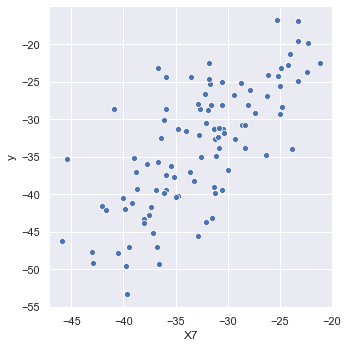

In [8]:
num_ML_models=len(ML_model_list)
z_level_1_learner = pd.DataFrame(y_predictions_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])
y_level_1_learner = y_test_np_array

model_data=z_level_1_learner.copy()
df_y=pd.DataFrame(y_level_1_learner)
df_y.columns=["y"]
model_data["y"]=df_y

display(model_data.head(20))
_ = sns.relplot(x='X7', y='y', data=model_data)


In [9]:
x_train=model_data.drop(["y"],axis=1)

y_tensor = theano.shared(model_data.y.values.astype('float64'))
x_tensor = theano.shared(x_train.values.astype('float64'))
print(x_tensor)


<TensorType(float64, matrix)>


In [10]:
with pm.Model() as model:
    
    # define the priors
    beta1 = pm.Dirichlet('beta1', a=np.array([1]*num_ML_models), shape=num_ML_models)
    sd = pm.HalfNormal('sd', 10)

    # define the likelihood
    mu = pm.math.dot(beta1, x_tensor.T)
    yl = pm.Normal('yl', mu, sd, observed=y_tensor)

In [11]:
# Generate a MCMC chain
with model:
    hmc_trace = pm.sample(draws=5000, tune=1000, cores=6)
    #trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, beta1]
Sampling 6 chains, 0 divergences: 100%|██████████████████████████████████████| 36000/36000 [00:37<00:00, 970.21draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.074,0.065,0.000,0.193,0.000,0.000,32513.0,29045.0,23166.0,13713.0,1.0
beta1[1],0.040,0.034,0.000,0.102,0.000,0.000,36793.0,33111.0,25146.0,14302.0,1.0
beta1[2],0.049,0.044,0.000,0.131,0.000,0.000,35367.0,31018.0,24157.0,12800.0,1.0
beta1[3],0.038,0.036,0.000,0.103,0.000,0.000,33311.0,28967.0,22491.0,12625.0,1.0
beta1[4],0.036,0.033,0.000,0.097,0.000,0.000,34690.0,30236.0,24228.0,13957.0,1.0
beta1[5],0.019,0.016,0.000,0.049,0.000,0.000,36276.0,32176.0,24021.0,13694.0,1.0
beta1[6],0.045,0.039,0.000,0.115,0.000,0.000,36512.0,32067.0,24500.0,12826.0,1.0
beta1[7],0.700,0.096,0.516,0.870,0.001,0.000,30301.0,30301.0,31425.0,22267.0,1.0
sd,6.088,0.456,5.287,6.983,0.003,0.002,27228.0,26783.0,27688.0,21056.0,1.0


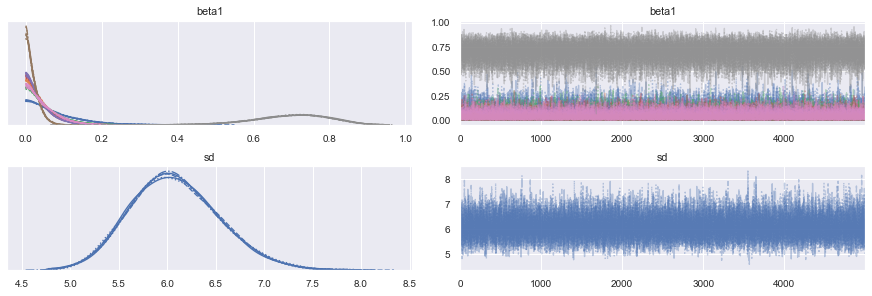

In [12]:
pm.traceplot(hmc_trace)
pm.summary(hmc_trace)

In [13]:
map_tensor_batch = {y_tensor: pm.Minibatch(model_data.y.values.astype('float64'), n_data),
                    x_tensor: pm.Minibatch(x_train.values.astype('float64'), n_data)}
with model:
    advi_fit = pm.fit(method=pm.ADVI(), n=30000,
                      more_replacements=map_tensor_batch)

Average Loss = 332.28: 100%|███████████████████████████████████████████████████| 30000/30000 [00:11<00:00, 2576.56it/s]
Finished [100%]: Average Loss = 332.23


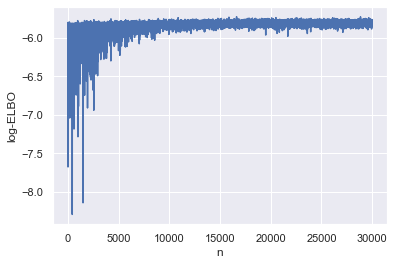

In [14]:
advi_elbo = pd.DataFrame(
    {'log-ELBO': -np.log(advi_fit.hist),
     'n': np.arange(advi_fit.hist.shape[0])})

_ = sns.lineplot(y='log-ELBO', x='n', data=advi_elbo)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.098,0.100,0.002,0.284,0.001,0.001,10178.0,10054.0,9928.0,9971.0,NaN
beta1[1],0.049,0.055,0.001,0.145,0.001,0.000,9860.0,9665.0,10367.0,9537.0,NaN
beta1[2],0.063,0.072,0.001,0.192,0.001,0.001,9926.0,9852.0,9991.0,9836.0,NaN
beta1[3],0.047,0.058,0.000,0.149,0.001,0.000,9595.0,9595.0,9466.0,9708.0,NaN
beta1[4],0.042,0.051,0.000,0.129,0.001,0.000,9979.0,9979.0,10280.0,8984.0,NaN
beta1[5],0.023,0.028,0.000,0.068,0.000,0.000,9690.0,9690.0,9339.0,9884.0,NaN
beta1[6],0.055,0.065,0.001,0.172,0.001,0.000,9712.0,9644.0,9857.0,9639.0,NaN
beta1[7],0.624,0.136,0.374,0.872,0.001,0.001,10050.0,10050.0,10083.0,9913.0,NaN
sd,6.215,0.498,5.276,7.134,0.005,0.004,9923.0,9912.0,9937.0,9877.0,NaN


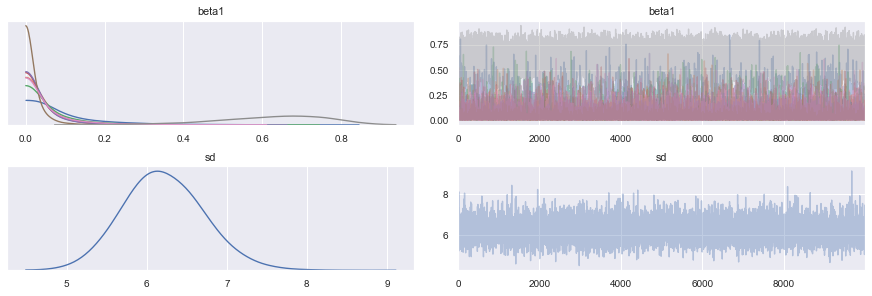

In [15]:
advi_trace = advi_fit.sample(10000)
pm.traceplot(advi_trace)
pm.summary(advi_trace)

In [16]:
y_pred_compare_with_real=[]
for i in range(n_data):
    #print(x_train[i:i+1])
    x_tensor.set_value(x_train[i:i+1].values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']), y_test_np_array[i])
    y_pred_compare_with_real.append(np.mean(hmc_posterior_pred['yl']))

 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-37.72959109894766 -36.971868914085185


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.21it/s]

-37.23644383532047 -37.455243089335724


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-32.748044966345205 -45.548858036810024


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-29.358052321287687 -30.80360590331723


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.48it/s]

-40.17762903515053 -41.562851786616115


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-38.69133842289941 -35.146589316578


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-32.93934559261993 -22.561923416941987


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-35.953808688307554 -46.971487590068556


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.73it/s]

-31.700442013221885 -26.621556133177997


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

-31.036679121543223 -25.23952265699584


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.08it/s]

-25.069551531025798 -22.823920195565634


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-36.911915238610604 -49.27658444530932


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.52it/s]

-39.60770421134433 -41.1445873309166


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-35.30100541653477 -31.29160170248546


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.72it/s]

-43.01502746124185 -47.67975095727268


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.59it/s]

-35.204589001275124 -37.69739448652445


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-32.942088990671444 -30.53710958040417


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.16it/s]

-30.858114344331774 -24.631570359622604


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-32.93834256848719 -40.26462669502585


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.58it/s]

-33.14027877027832 -39.414481548473276


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-24.535573803023794 -16.88106233359602


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.24it/s]

-40.74709668683584 -40.42229327907597


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-32.03621654969331 -43.1237013067612


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.13it/s]

-26.039183232835153 -19.574809518047605


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.71it/s]

-26.27525154668222 -33.98573058775973


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-26.954704307088488 -16.834130657199136


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.42it/s]

-26.264737583920137 -29.277344659495455


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-25.03959240752832 -24.85242449686133


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-31.818835646773906 -34.82274788089912


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-34.27728017409591 -30.08093025571162


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

-29.026918666666724 -33.83905575370067


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.57it/s]

-39.50473107083599 -49.495995157717694


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.08it/s]

-29.091853385348774 -26.102177497456857


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-35.97399916799446 -39.810678714456515


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 99.27it/s]

-32.08496156082476 -38.97690697626596


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.12it/s]

-31.6268670732609 -31.216829248750813


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-36.68066172247074 -24.4143826806047


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.48it/s]

-41.39443881817779 -41.933590831761904


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-35.531679890341145 -28.575451306176735


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.81it/s]

-31.524366230009736 -31.250061413217082


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-38.01733442034825 -36.002400878951704


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-26.373595504669893 -34.7884907057538


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-43.95859873811842 -46.166561664802515


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-26.360128767288813 -28.34920001099401


 42%|██████████████████████████████████                                               | 21/50 [00:00<00:00, 100.99it/s]

-35.31768316078932 -36.25052714569507


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-29.03182462336345 -36.79598156830008


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.27it/s]

-36.24996155654664 -43.24761996329653


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-26.92600719027245 -25.60970790139353


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.97it/s]

-27.521895067811304 -24.1287539186052


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-31.21115566300866 -33.81095749405655


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-38.22664838460562 -47.84294136431146


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-35.74317267792488 -23.15400497954071


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

-32.45042098016124 -31.255315786727433


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-28.155382442269445 -26.70616519215447


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-32.265434182074664 -28.57256512893085


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.25it/s]

-30.312073458872067 -32.655399688289336


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-34.49972327284382 -24.300054647264623


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-25.671984724742686 -23.12706070423745


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.76it/s]

-31.23618885306369 -43.71008008543436


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-39.59942002052443 -53.20761777452378


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

-37.18001056554542 -42.69921689585008


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-32.67466761754635 -32.04982156820391


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.60it/s]

-33.55552690232655 -36.952356956181056


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-31.884021924031583 -39.472271666687064


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-34.896797816284504 -40.28455425358222


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-37.18304516133607 -46.97024738497357


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-36.22571235526301 -41.61883199789717


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.29it/s]

-30.987490508630245 -28.037501653870386


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-27.155321867395443 -25.17955304490054


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-35.4824209433969 -45.07845341733553


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-31.912764781541615 -28.15198969323736


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.41it/s]

-31.03905540753001 -31.157087646607


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-24.092023576730472 -23.711072561078225


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.28it/s]

-29.655787942433783 -31.87796560254292


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-45.06206514455977 -35.26099937285378


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.82it/s]

-32.29147454783285 -25.054202112745266


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.49it/s]

-37.368722557265116 -39.30428388514832


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-31.147208806958865 -39.87902972612099


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.36it/s]

-26.876633583313144 -24.170176555137758


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-32.65378502215921 -28.69982444429825


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-31.45928390508017 -35.00954548553222


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.24it/s]

-33.88177986287491 -38.17861153228586


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-34.940441040268546 -32.46235139540091


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-29.85938768338134 -30.72139792509128


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-36.66127808071796 -39.41083149619093


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-30.231724582985485 -28.110401069294358


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-23.494489293840036 -19.830324951080947


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-38.28077093155623 -43.850367415190775


 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 91.35it/s]

-28.522158688890254 -29.16761764463671


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-24.218603047706903 -22.507404906946164


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.58it/s]

-41.14892984024857 -28.603761308107817


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-25.67275760296633 -21.257823144317655


 34%|███████████████████████████▉                                                      | 17/50 [00:00<00:00, 79.40it/s]

-33.0156470783077 -32.579067809637195


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-34.224891112829454 -31.53722453438785


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-39.923456774080734 -49.19692751031825


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-37.006029486322994 -35.65196173067467


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-31.89978508742838 -27.931240912684114


 24%|███████████████████▋                                                              | 12/50 [00:00<00:00, 99.76it/s]

-30.622278097118304 -32.32733728755943


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.71it/s]

-38.59199618179143 -42.0922805587943


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 93.44it/s]

-27.485407173490977 -26.847895440712


### 3.2 Make Predictions from raw x's ( x >>> z >>> y_hat )

In [17]:
np.random.seed(1)
x_new_np_array=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(1, -1)

def y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    #print(x_new_np_array)
    ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
    y_new_list=[]
    for current_model in ML_model_list:
        y_pred=locals()[current_model].predict(ss1.transform(x_new_np_array))
        y_new_list.append(y_pred[0])
    y_new_nparray=np.array([y_new_list])
    print(y_new_nparray)
    df_y_new=pd.DataFrame(y_new_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])


    #print(df_y_new)
    #y_tensor.set_value(validate_data.y.values)
    x_tensor.set_value(df_y_new.values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']))
    return np.mean(hmc_posterior_pred['yl'])


y_samplings=y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

#hmc_predictions = np.mean(y_samplings)
#hmc_predictions_std = np.std(y_samplings)

print(y_samplings)
#sns.distplot(hmc_posterior_pred['yl'])

 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

[[-37.0001757  -35.869235   -35.87028481 -37.38835839 -31.53702321
  -37.625      -36.95163329 -39.12876511]]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.61it/s]

-38.04451914018462
-38.04451914018462


In [18]:
def BOUND(x,lb_x,ub_x):
    for i in range(len(x)):
        x[i,0]=max(min(ub_x[i,0],x[i,0]),lb_x[i,0])
    return x


In [19]:

def ASA(func_x,lb_x,ub_x,x_0,T0,num_steps,qf, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    N=len(x_0)
    print(N, x_0)
    lk=5*N
    dx=ub_x-lb_x
    #c=2*num_steps**(1.0/N)
    c=2*exp(-qf+0.0/N)
    print ("c",c)
    x_old=x_0
    Tk=T0
    x_list=[]
    y_list=[]
    for k in range(num_steps+1)[1:]:
        for i in range(lk+1)[1:]:
            f_old=-func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            u=np.random.rand(N).reshape(N,1)
            y1=np.sign(u-1.0/2)
            y2=Tk
            y3=(1+1.0/Tk)**abs(2*u-1)-1
            y=y1*y2*y3
            x=x_old+y*dx
            x=BOUND(x,lb_x,ub_x)
            f_new=-func_x(x.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            x_list.append(x.reshape(1, -1))
            y_list.append(-f_new)
            if f_new<f_old:
                x_old=x
            elif exp((f_old-f_new-0.0)/np.linalg.norm(Tk,2))>np.random.rand(1)[0]:
                x_old=x
        #print(x_old)
        #Tk=T0*exp(-c*(num_steps+1-k)**qf)
        Tk=T0*exp(-c*k**(qf+0.0/N))
        
        f_final=func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
        
    return x_old,f_final, x_list, y_list

x_0=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(n_predictors, -1)

lb_x=np.array([-4]*n_predictors).reshape((n_predictors,1))
ub_x=np.array([4]*n_predictors).reshape((n_predictors,1))
T0=np.array([200]*n_predictors).reshape((n_predictors,1))
num_steps=10

x,f,x_list, y_list=ASA(y_hat_from_raw_x,lb_x,ub_x,x_0,T0,num_steps,0.90, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

10 [[-3.2365493 ]
 [ 1.75882673]
 [ 3.32878252]
 [ 2.59504157]
 [ 1.38647243]
 [ 2.21312526]
 [-2.79900704]
 [-3.47589938]
 [ 1.98383984]
 [ 3.8782562 ]]
c 0.8131393194811982
[[-31.97780904 -33.22245178 -32.33031398 -29.58411527 -31.77161773
  -54.         -27.44974049 -36.48062897]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.42it/s]

-35.29540312233676
[[-41.052302   -61.70698339 -35.86158678 -44.425252   -35.20243239
   -5.125      -38.20016493 -42.61370468]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-41.63682704854372
[[-41.052302   -61.70698339 -35.86158678 -44.425252   -35.20243239
   -5.125      -38.20016493 -42.61370468]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-41.79788552222615
[[-39.44888935 -51.44936604 -36.17894675 -49.8559059  -31.2547226
  -55.         -28.68141724 -42.16423798]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.93it/s]

-41.50194112761776
[[-39.44888935 -51.44936604 -36.17894675 -49.8559059  -31.2547226
  -55.         -28.68141724 -42.16423798]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-41.61949891810477
[[-28.76293235 -44.58523491 -29.69202594 -35.63187324 -31.59167211
  -55.375      -30.35717457 -41.15784073]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-38.7483805865142
[[-28.76293235 -44.58523491 -29.69202594 -35.63187324 -31.59167211
  -55.375      -30.35717457 -41.15784073]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-38.90718070760741
[[-28.34426199 -29.98275593 -27.78119563 -22.08649056 -32.54718577
  -43.875      -31.56096589 -35.07904053]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.57it/s]

-33.47201051454722
[[-28.34426199 -29.98275593 -27.78119563 -22.08649056 -32.54718577
  -43.875      -31.56096589 -35.07904053]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-33.4315097131018
[[-29.41552209 -23.29705646 -30.6107355  -24.12677953 -24.4453128
  -44.5        -25.70944107 -32.46663666]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.37it/s]

-31.094574863511788
[[-29.41552209 -23.29705646 -30.6107355  -24.12677953 -24.4453128
  -44.5        -25.70944107 -32.46663666]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-30.98105797393719
[[-31.39228618 -28.43337692 -27.07517138 -22.10431439 -30.9382787
  -38.875      -27.23684234 -40.32468796]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-37.008389415604036
[[-31.39228618 -28.43337692 -27.07517138 -22.10431439 -30.9382787
  -38.875      -27.23684234 -40.32468796]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.24it/s]

-36.916688580969065
[[-37.74476235 -51.91051183 -38.34138005 -43.75905721 -36.53884648
  -35.25       -39.12383385 -38.43460846]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.05it/s]

-38.956273334233025
[[-37.74476235 -51.91051183 -38.34138005 -43.75905721 -36.53884648
  -35.25       -39.12383385 -38.43460846]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.34it/s]

-38.902774607057026
[[-34.08857278 -39.00856927 -37.37317607 -40.20726178 -33.19860947
   -0.75       -37.78238496 -35.29702377]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-34.90331934667163
[[-34.08857278 -39.00856927 -37.37317607 -40.20726178 -33.19860947
   -0.75       -37.78238496 -35.29702377]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.27it/s]

-35.10291397425694
[[-34.98551394 -39.1268272  -33.19962557 -34.2897139  -40.03802913
   -2.75       -37.79070989 -29.3729763 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.28it/s]

-30.803249641562818
[[-34.98551394 -39.1268272  -33.19962557 -34.2897139  -40.03802913
   -2.75       -37.79070989 -29.3729763 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.35it/s]

-30.7164585891924
[[-36.76031252 -52.73746143 -37.07173397 -64.07412305 -41.4819218
  -74.25       -26.29290415 -46.91832733]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-45.90662879578252
[[-36.76031252 -52.73746143 -37.07173397 -64.07412305 -41.4819218
  -74.25       -26.29290415 -46.91832733]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-45.85148357670111
[[-38.08841066 -62.39513089 -36.85023126 -55.87363943 -42.52864607
  -55.875      -37.76175953 -36.37506104]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

-38.88486347810021
[[-38.08841066 -62.39513089 -36.85023126 -55.87363943 -42.52864607
  -55.875      -37.76175953 -36.37506104]]


 24%|███████████████████▋                                                              | 12/50 [00:00<00:00, 99.81it/s]

-38.687724440275716
[[-38.62037928 -65.02001475 -34.72850699 -49.02003497 -36.54533924
  -10.25       -39.42509526 -38.71982956]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.48it/s]

-39.09874104549482
[[-38.62037928 -65.02001475 -34.72850699 -49.02003497 -36.54533924
  -10.25       -39.42509526 -38.71982956]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.55it/s]

-39.23882201781456
[[-37.87795869 -50.96927136 -34.53263379 -38.36213829 -30.22027621
  -41.         -36.93965581 -37.42417908]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.26it/s]

-37.461822222364574
[[-37.87795869 -50.96927136 -34.53263379 -38.36213829 -30.22027621
  -41.         -36.93965581 -37.42417908]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-37.55354449319526
[[-27.36645363 -31.40867842 -27.55311444 -27.7552237  -24.6748648
  -19.         -25.26648689 -30.65748787]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-29.532900849502848
[[-27.36645363 -31.40867842 -27.55311444 -27.7552237  -24.6748648
  -19.         -25.26648689 -30.65748787]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-29.569256238581122
[[-36.01500222 -25.15521237 -31.63764733 -31.25311201 -25.11687758
  -24.75       -23.87051021 -29.99825096]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.54it/s]

-29.87864266663688
[[-36.01500222 -25.15521237 -31.63764733 -31.25311201 -25.11687758
  -24.75       -23.87051021 -29.99825096]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.27it/s]

-29.706177362841565
[[-32.59165687 -33.80840014 -31.55324273 -33.52844798 -25.90055459
  -16.375      -27.84205503 -32.43175507]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-31.841979807103815
[[-32.59165687 -33.80840014 -31.55324273 -33.52844798 -25.90055459
  -16.375      -27.84205503 -32.43175507]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-31.74240958876213
[[-34.76769789 -69.82890433 -32.79562397 -56.73936361 -37.54368729
  -75.25       -34.95898312 -39.12571335]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.24it/s]

-40.60283929357473
[[-34.76769789 -69.82890433 -32.79562397 -56.73936361 -37.54368729
  -75.25       -34.95898312 -39.12571335]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.31it/s]

-40.43060220129201
[[-38.31166572 -36.00076524 -32.05777196 -21.08546311 -31.47834617
   37.25       -41.18954182 -43.305439  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.93it/s]

-39.05294238193414
[[-38.31166572 -36.00076524 -32.05777196 -21.08546311 -31.47834617
   37.25       -41.18954182 -43.305439  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.63it/s]

-39.28909702806198
[[-29.76795448 -43.69758592 -33.29160068 -35.99679836 -27.92890401
  -39.125      -37.70306497 -29.9043541 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-31.180422023787692
[[-29.76795448 -43.69758592 -33.29160068 -35.99679836 -27.92890401
  -39.125      -37.70306497 -29.9043541 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-31.25718290398788
[[-40.3551548  -53.32462479 -32.19317    -46.79378792 -27.78573516
  -78.375      -41.69105226 -34.88661194]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-37.076852162469606
[[-40.3551548  -53.32462479 -32.19317    -46.79378792 -27.78573516
  -78.375      -41.69105226 -34.88661194]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

-37.014775066311714
[[ -37.26534887  -69.07481785  -32.8679983   -54.21262772  -38.13412662
  -116.375       -40.0893112   -39.46082687]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.25it/s]

-41.58648764037572
[[ -37.26534887  -69.07481785  -32.8679983   -54.21262772  -38.13412662
  -116.375       -40.0893112   -39.46082687]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-41.941843710463914
[[-44.3206875  -57.14012907 -33.59218892 -42.34128971 -28.08928774
  -28.         -47.65033967 -40.6593399 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-40.868220369268734
[[-44.3206875  -57.14012907 -33.59218892 -42.34128971 -28.08928774
  -28.         -47.65033967 -40.6593399 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-40.7527173510837
[[-43.81164911 -43.10485065 -35.23482801 -48.54040767 -30.46236774
  -83.375      -38.0654045  -42.13384628]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-42.41849857461241
[[-43.81164911 -43.10485065 -35.23482801 -48.54040767 -30.46236774
  -83.375      -38.0654045  -42.13384628]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-42.431974230097275
[[-38.88791881 -61.06205241 -35.24169333 -50.6308894  -27.14468687
  -37.375      -37.61398188 -41.60264969]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-41.2188542369543
[[-38.88791881 -61.06205241 -35.24169333 -50.6308894  -27.14468687
  -37.375      -37.61398188 -41.60264969]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-41.24778013373373
[[-31.08689271 -37.58991268 -29.82994344 -33.87932973 -32.07823001
   51.125      -33.36141985 -34.81745911]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.16it/s]

-32.528001532664554
[[-31.08689271 -37.58991268 -29.82994344 -33.87932973 -32.07823001
   51.125      -33.36141985 -34.81745911]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-32.73122251287558
[[-34.77470219 -34.7824033  -32.53607533 -18.41513388 -30.08628872
   58.5        -36.94055207 -34.5746994 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-32.188385167120764
[[-34.77470219 -34.7824033  -32.53607533 -18.41513388 -30.08628872
   58.5        -36.94055207 -34.5746994 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-32.25952534438474
[[-32.45048082 -39.54164838 -33.36584465 -25.22794853 -40.77562946
    4.125      -26.6015747  -40.98845291]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

-37.82061466568934
[[-32.45048082 -39.54164838 -33.36584465 -25.22794853 -40.77562946
    4.125      -26.6015747  -40.98845291]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-37.89225135746605
[[-31.96227224 -26.8729843  -29.37002932 -30.71667527 -28.61468731
  -68.5        -29.86524689 -43.30831909]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-40.00593878944984
[[-31.96227224 -26.8729843  -29.37002932 -30.71667527 -28.61468731
  -68.5        -29.86524689 -43.30831909]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-39.960495804815
[[-35.48424839 -38.03021586 -19.34335499 -40.58453624 -25.88018365
  -71.5        -31.94563031 -34.94874573]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

-34.54221630603444
[[-35.48424839 -38.03021586 -19.34335499 -40.58453624 -25.88018365
  -71.5        -31.94563031 -34.94874573]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.53it/s]

-34.64880303503445
[[-34.75596653 -40.0438772  -33.79307089 -36.4611903  -34.10120918
   32.875      -25.78307768 -41.99705887]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-38.47661412345365
[[-34.75596653 -40.0438772  -33.79307089 -36.4611903  -34.10120918
   32.875      -25.78307768 -41.99705887]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-38.40539185766672
[[-35.33723051 -46.77385369 -35.34176509 -42.05733873 -36.97463915
   25.125      -25.82525524 -39.15963364]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.89it/s]

-37.17198130337791
[[-35.33723051 -46.77385369 -35.34176509 -42.05733873 -36.97463915
   25.125      -25.82525524 -39.15963364]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-37.30836188172647
[[-33.84447275 -52.77105623 -36.52075313 -43.37775201 -36.97463915
   29.625      -26.82946537 -40.44786453]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-38.15511698539229
[[-33.84447275 -52.77105623 -36.52075313 -43.37775201 -36.97463915
   29.625      -26.82946537 -40.44786453]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-38.23513810300629
[[-36.47477313 -39.51395479 -30.23365494 -28.51609195 -32.05192101
  -11.75       -32.55287825 -37.96060181]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-36.0134774332182
[[-36.47477313 -39.51395479 -30.23365494 -28.51609195 -32.05192101
  -11.75       -32.55287825 -37.96060181]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-36.204216230942066
[[-37.21216609 -39.96442475 -29.05246516 -31.62173231 -27.44352628
    9.875      -38.47041993 -36.6390152 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-35.05733630766859
[[-37.21216609 -39.96442475 -29.05246516 -31.62173231 -27.44352628
    9.875      -38.47041993 -36.6390152 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-35.10723221040933
[[-37.29773789 -42.51898935 -29.27103717 -34.67196447 -26.95445751
  -14.5        -38.41591779 -37.95937729]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

-36.81596997237141
[[-37.29773789 -42.51898935 -29.27103717 -34.67196447 -26.95445751
  -14.5        -38.41591779 -37.95937729]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.62it/s]

-36.79016776378018
[[-32.47811558 -31.56779979 -28.64572812 -22.2085577  -19.98059568
   -8.375      -24.47357941 -33.55015182]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-31.45630716104574
[[-32.47811558 -31.56779979 -28.64572812 -22.2085577  -19.98059568
   -8.375      -24.47357941 -33.55015182]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-31.243197602717945
[[-28.49213917 -28.41515867 -30.40123288 -25.25859564 -18.20447009
  -46.25       -19.48350527 -30.93065834]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-29.667148415692825
[[-28.49213917 -28.41515867 -30.40123288 -25.25859564 -18.20447009
  -46.25       -19.48350527 -30.93065834]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-29.619080568482534
[[-39.77884718 -42.58916375 -33.53768565 -40.81377815 -32.32663147
  -27.75       -32.32116494 -46.40018845]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-43.45012307804183
[[-39.77884718 -42.58916375 -33.53768565 -40.81377815 -32.32663147
  -27.75       -32.32116494 -46.40018845]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-43.25214033186741
[[-35.84533676 -62.58151898 -34.82482338 -55.12090313 -40.77290836
  -57.625      -36.18463477 -38.85082626]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-39.97161426775746
[[-35.84533676 -62.58151898 -34.82482338 -55.12090313 -40.77290836
  -57.625      -36.18463477 -38.85082626]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-40.17442272460824
[[-34.68451285 -46.8387841  -33.24502467 -38.99064787 -33.09721107
  -48.5        -33.39786236 -28.93216324]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-31.335117948739637
[[-34.68451285 -46.8387841  -33.24502467 -38.99064787 -33.09721107
  -48.5        -33.39786236 -28.93216324]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.82it/s]

-31.3167756132868
[[-37.75125543 -48.33309926 -34.0665784  -45.76720345 -38.78262633
  -97.5        -47.69523002 -39.96227646]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-41.408938575253224
[[-37.75125543 -48.33309926 -34.0665784  -45.76720345 -38.78262633
  -97.5        -47.69523002 -39.96227646]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-41.30691989132757
[[-35.97285765 -28.12152032 -35.87791701 -18.87862818 -31.43604164
   10.25       -50.67069745 -40.18130493]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.98it/s]

-37.65000728885575
[[-35.97285765 -28.12152032 -35.87791701 -18.87862818 -31.43604164
   10.25       -50.67069745 -40.18130493]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-37.59434563076968
[[-39.60995842 -29.92447155 -35.43103484 -30.26769528 -32.95642811
    4.125      -37.80643608 -31.37874794]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-31.889104361922172
[[-39.60995842 -29.92447155 -35.43103484 -30.26769528 -32.95642811
    4.125      -37.80643608 -31.37874794]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-31.85290719376892
[[-28.37637547 -52.84082315 -31.47240348 -35.65728949 -30.56126676
  -93.0625     -22.81225967 -30.52359581]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-32.18475833960101
[[-28.37637547 -52.84082315 -31.47240348 -35.65728949 -30.56126676
  -93.0625     -22.81225967 -30.52359581]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

-32.05651891934942
[[-38.53285887 -62.97269617 -40.48016671 -56.4338923  -45.08974334
  -63.75       -28.51231691 -50.5534935 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.08it/s]

-48.83484553269142
[[-38.53285887 -62.97269617 -40.48016671 -56.4338923  -45.08974334
  -63.75       -28.51231691 -50.5534935 ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.47it/s]

-48.78255140303903
[[-38.29698322 -53.96261063 -35.84361287 -50.20033975 -39.35080889
  -67.125      -49.39371957 -39.37776184]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.95it/s]

-40.98279033936593
[[-38.29698322 -53.96261063 -35.84361287 -50.20033975 -39.35080889
  -67.125      -49.39371957 -39.37776184]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-41.0650486836444
[[-34.82604619 -41.91331102 -32.36517602 -40.22809033 -35.91176288
  -29.625      -26.62584475 -43.45507812]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-40.73362464713616
[[-34.82604619 -41.91331102 -32.36517602 -40.22809033 -35.91176288
  -29.625      -26.62584475 -43.45507812]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-40.73952983372521
[[-31.25812126 -35.45242403 -33.06671441 -45.7097567  -28.36866305
  -63.625      -28.2679664  -41.65488052]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-39.56022044525508
[[-31.25812126 -35.45242403 -33.06671441 -45.7097567  -28.36866305
  -63.625      -28.2679664  -41.65488052]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 98.28it/s]

-39.54180280144971
[[-30.00169988 -38.04577761 -32.7967123  -37.76920447 -36.85904274
  -59.25       -26.39576947 -30.55942726]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-31.787285777344525
[[-30.00169988 -38.04577761 -32.7967123  -37.76920447 -36.85904274
  -59.25       -26.39576947 -30.55942726]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.31it/s]

-31.59864295137934
[[-37.71941902 -43.22206144 -27.87373549 -38.37003719 -28.40482539
  -59.         -32.53033796 -31.64238739]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.22it/s]

-33.07477123343698
[[-37.71941902 -43.22206144 -27.87373549 -38.37003719 -28.40482539
  -59.         -32.53033796 -31.64238739]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-32.88640487205255
[[-37.71941902 -43.22206144 -27.87373549 -38.37003719 -28.40482539
  -59.         -32.53033796 -31.64238739]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-32.98520740449227
[[-35.21735259 -42.14975454 -30.71739273 -34.69994315 -32.63866615
  -36.         -32.75207205 -36.25279617]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-35.79293056323586
[[-35.21735259 -42.14975454 -30.71739273 -34.69994315 -32.63866615
  -36.         -32.75207205 -36.25279617]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-35.5940723680955
[[-41.70715266 -56.35020526 -32.42616367 -54.16763675 -34.65989399
  -93.125      -34.59044829 -38.16412735]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-40.07280210082219
[[-41.70715266 -56.35020526 -32.42616367 -54.16763675 -34.65989399
  -93.125      -34.59044829 -38.16412735]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-40.06759497998079
[[-36.89121921 -58.46046624 -32.2084666  -37.33003639 -32.26668265
  -41.5        -38.69624125 -37.03815842]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.26it/s]

-37.54638016781556
[[-36.89121921 -58.46046624 -32.2084666  -37.33003639 -32.26668265
  -41.5        -38.69624125 -37.03815842]]


 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 91.82it/s]

-37.35222051753837
[[-32.72471316 -61.16163968 -30.96677683 -54.1568404  -41.59117588
  -33.75       -30.09351124 -38.82753754]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-38.97852076726291
[[-32.72471316 -61.16163968 -30.96677683 -54.1568404  -41.59117588
  -33.75       -30.09351124 -38.82753754]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 114.12it/s]

-38.88085740961535
[[-31.10946733 -63.47032466 -30.3982813  -58.00256893 -39.03572323
  -18.5        -30.37925525 -43.37102509]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.24it/s]

-41.961265938960715
[[-31.10946733 -63.47032466 -30.3982813  -58.00256893 -39.03572323
  -18.5        -30.37925525 -43.37102509]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.85it/s]

-41.679733004988975
[[-27.57277749 -38.3663585  -23.93467841 -30.76939453 -20.29606745
  -33.375      -26.9897165  -28.35836411]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-28.16186656515851
[[-27.57277749 -38.3663585  -23.93467841 -30.76939453 -20.29606745
  -33.375      -26.9897165  -28.35836411]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 97.14it/s]

-28.180265179298654
[[-27.38821283 -35.76824058 -26.72203695 -31.41830368 -21.75130923
  -17.25       -31.86067356 -37.31265259]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.36it/s]

-34.58320843779061
[[-27.38821283 -35.76824058 -26.72203695 -31.41830368 -21.75130923
  -17.25       -31.86067356 -37.31265259]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.47it/s]

-34.64838735334756
[[-27.76132752 -37.69768541 -29.35189044 -33.10462208 -34.28125229
  -35.75       -27.35601679 -25.35413742]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.79it/s]

-26.93512342440239
[[-27.76132752 -37.69768541 -29.35189044 -33.10462208 -34.28125229
  -35.75       -27.35601679 -25.35413742]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-26.99112668460398
[[-26.90156181 -37.99423358 -31.30951865 -37.68085091 -30.22027621
  -43.375      -27.65011261 -31.41799927]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 111.95it/s]

-31.464433819762355
[[-26.90156181 -37.99423358 -31.30951865 -37.68085091 -30.22027621
  -43.375      -27.65011261 -31.41799927]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.30it/s]

-31.551844069188647
[[-35.65741303 -48.15993336 -29.82854061 -37.63693919 -30.22027621
  -20.625      -31.80850771 -40.93206406]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-38.94604773240473
[[-35.65741303 -48.15993336 -29.82854061 -37.63693919 -30.22027621
  -20.625      -31.80850771 -40.93206406]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.78it/s]

-38.74773552975091
[[-32.79600887 -51.88101177 -33.89275554 -37.81160634 -31.92627496
   28.625      -25.64985124 -36.67538071]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.22it/s]

-34.947661335512954
[[-32.79600887 -51.88101177 -33.89275554 -37.81160634 -31.92627496
   28.625      -25.64985124 -36.67538071]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.25it/s]

-35.114221139111244
[[-33.52806604 -41.11919973 -27.97294584 -35.89978916 -31.92627496
  -40.625      -31.32964941 -32.37208939]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 113.09it/s]

-32.686419298884424
[[-33.52806604 -41.11919973 -27.97294584 -35.89978916 -31.92627496
  -40.625      -31.32964941 -32.37208939]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.98it/s]

-32.75479644654924
[[-41.11835565 -35.57003473 -34.26894892 -36.17201629 -35.48388318
  -28.125      -42.25128325 -34.08388519]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.20it/s]

-35.05041954335822
[[-41.11835565 -35.57003473 -34.26894892 -36.17201629 -35.48388318
  -28.125      -42.25128325 -34.08388519]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.73it/s]

-35.10649173713999
[[-37.82447146 -39.69194352 -38.59140651 -49.67474168 -36.51127647
  -65.5        -28.50475948 -43.41939163]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.54it/s]

-42.46234605629924
[[-37.82447146 -39.69194352 -38.59140651 -49.67474168 -36.51127647
  -65.5        -28.50475948 -43.41939163]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.03it/s]

-42.34761639156312
[[-36.78997158 -55.47142408 -40.58500531 -49.69552775 -40.116486
  -20.625      -44.93339044 -33.87473679]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-36.517775780450684
[[-36.78997158 -55.47142408 -40.58500531 -49.69552775 -40.116486
  -20.625      -44.93339044 -33.87473679]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.21it/s]

-36.216933332271
[[-39.61841968 -70.0768281  -37.43773934 -56.45689696 -33.99617633
  -40.25       -44.9014584  -47.19839096]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.66it/s]

-46.429767001448866
[[-36.78997158 -55.47142408 -40.58500531 -49.69552775 -40.116486
  -20.625      -44.93339044 -33.87473679]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.78it/s]

-36.24333251755758
[[-36.67577523 -45.90936962 -35.33120901 -37.63371344 -35.91176288
  -18.625      -36.85413861 -40.03977585]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.05it/s]

-38.76603695786849
[[-36.67577523 -45.90936962 -35.33120901 -37.63371344 -35.91176288
  -18.625      -36.85413861 -40.03977585]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.48it/s]

-38.96979234078925
[[-40.37977585 -56.56444437 -35.64963842 -50.79076661 -34.64828851
  -73.125      -36.93735002 -39.4291954 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-40.538076307109876
[[-40.37977585 -56.56444437 -35.64963842 -50.79076661 -34.64828851
  -73.125      -36.93735002 -39.4291954 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.43it/s]

-40.68277392103776
[[-38.63182833 -49.07037574 -34.84746449 -49.29652566 -30.22670845
  -58.25       -41.43998117 -35.22035217]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.59it/s]

-37.009852846464455
[[-38.63182833 -49.07037574 -34.84746449 -49.29652566 -30.22670845
  -58.25       -41.43998117 -35.22035217]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.01it/s]

-36.980683510533545
[[-36.32024657 -39.04633027 -31.62168055 -36.41892173 -28.74383675
  -13.375      -26.29655921 -36.49219513]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.36it/s]

-35.16619799247579
[[-36.32024657 -39.04633027 -31.62168055 -36.41892173 -28.74383675
  -13.375      -26.29655921 -36.49219513]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.11it/s]

-35.03700258340631
[[-27.09611721 -32.29449849 -32.29021819 -33.32633241 -35.91925393
  -17.625      -24.12101154 -29.9249382 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.84it/s]

-29.728222417657328
[[-27.09611721 -32.29449849 -32.29021819 -33.32633241 -35.91925393
  -17.625      -24.12101154 -29.9249382 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.68it/s]

-29.762715164138562
[[-34.77234116 -50.19920942 -32.99527161 -47.42449338 -40.03802913
   11.375      -27.24657427 -33.93936157]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

-34.069616235868395
[[-34.77234116 -50.19920942 -32.99527161 -47.42449338 -40.03802913
   11.375      -27.24657427 -33.93936157]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.68it/s]

-34.271376189547965
[[-33.35017842 -44.60791075 -34.0322176  -43.41119596 -36.97463915
   13.75       -27.8495831  -31.96461487]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.37it/s]

-32.078467803934366
[[-33.35017842 -44.60791075 -34.0322176  -43.41119596 -36.97463915
   13.75       -27.8495831  -31.96461487]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-32.31110764901184
[[-34.76863293 -42.47477102 -33.78331948 -35.66503836 -31.09593981
  -21.625      -27.84488642 -36.9192009 ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.85it/s]

-35.80367624836568
[[-34.76863293 -42.47477102 -33.78331948 -35.66503836 -31.09593981
  -21.625      -27.84488642 -36.9192009 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.31it/s]

-35.72132802907432
[[-40.41562358 -42.64935182 -32.06742863 -35.16883962 -29.71558796
  -10.75       -47.93568856 -41.23173523]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.19it/s]

-39.85795525869471
[[-40.41562358 -42.64935182 -32.06742863 -35.16883962 -29.71558796
  -10.75       -47.93568856 -41.23173523]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.06it/s]

-39.84173554875833
[[-32.48834691 -34.9066656  -31.71503699 -30.33629998 -29.5093044
  -47.125      -27.39916868 -40.45761871]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.22it/s]

-37.845001379205534
[[-32.48834691 -34.9066656  -31.71503699 -30.33629998 -29.5093044
  -47.125      -27.39916868 -40.45761871]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 110.99it/s]

-37.80327484148913
[[-38.15783399 -56.01940615 -34.13081456 -47.12929184 -27.1987787
  -48.5        -35.69186799 -38.30319214]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.97it/s]

-38.46644654538396
[[-38.15783399 -56.01940615 -34.13081456 -47.12929184 -27.1987787
  -48.5        -35.69186799 -38.30319214]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.71it/s]

-38.74036026867764
[[-36.88879815 -56.97889487 -35.14899522 -53.10003426 -33.03640465
  -72.875      -29.16235201 -42.55619431]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.09it/s]

-42.20174968825135
[[-36.88879815 -56.97889487 -35.14899522 -53.10003426 -33.03640465
  -72.875      -29.16235201 -42.55619431]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.88it/s]

-42.251065876996904
[[-38.967025   -43.52949404 -34.27002704 -35.22313941 -30.21625681
  -56.75       -38.6396348  -39.03596497]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.10it/s]

-38.77683850163936
[[-38.967025   -43.52949404 -34.27002704 -35.22313941 -30.21625681
  -56.75       -38.6396348  -39.03596497]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.93it/s]

-38.71425859311521
[[-30.11151909 -29.71039485 -33.59655034 -28.82147536 -30.12965895
  -45.5        -20.87186376 -33.11175537]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.71it/s]

-32.31609210861732
[[-30.11151909 -29.71039485 -33.59655034 -28.82147536 -30.12965895
  -45.5        -20.87186376 -33.11175537]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-32.1348777749024
[[-32.93191476 -33.51564006 -30.36620946 -17.06092127 -26.20220268
   65.875      -44.14762473 -35.50255203]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.30it/s]

-32.573645917066486
[[-32.93191476 -33.51564006 -30.36620946 -17.06092127 -26.20220268
   65.875      -44.14762473 -35.50255203]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.19it/s]

-32.616094438498166
[[-35.91692272 -42.44162405 -30.80655713 -41.92862252 -31.55820021
  -38.3125     -38.03810047 -36.69889832]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.22it/s]

-36.690454953004135
[[-35.91692272 -42.44162405 -30.80655713 -41.92862252 -31.55820021
  -38.3125     -38.03810047 -36.69889832]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.66it/s]

-36.76498075362071
[[-38.08453275 -33.97417872 -28.10197293 -15.62553762 -24.87430842
   56.625      -47.70224172 -36.8693161 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.16it/s]

-33.970157877809335
[[-38.08453275 -33.97417872 -28.10197293 -15.62553762 -24.87430842
   56.625      -47.70224172 -36.8693161 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.42it/s]

-33.93829452304827
[[-37.08332569 -30.09125984 -31.25483537 -13.95354604 -24.87430842
   20.75       -48.03229544 -33.81025314]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.12it/s]

-32.40889250582809
[[-37.08332569 -30.09125984 -31.25483537 -13.95354604 -24.87430842
   20.75       -48.03229544 -33.81025314]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.51it/s]

-32.544813768942596
[[-38.52944411 -45.38912882 -34.56999978 -41.31669888 -32.05536668
   -9.25       -47.67344926 -39.65243149]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.69it/s]

-39.13311724908709
[[-38.52944411 -45.38912882 -34.56999978 -41.31669888 -32.05536668
   -9.25       -47.67344926 -39.65243149]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.57it/s]

-39.02804729766378
[[-31.03922421 -33.75586727 -33.83541084 -39.26935005 -46.54332375
  -38.5        -30.35958014 -30.71071815]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.74it/s]

-32.06026371963236
[[-31.03922421 -33.75586727 -33.83541084 -39.26935005 -46.54332375
  -38.5        -30.35958014 -30.71071815]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-32.07490732608393
[[-30.7569351  -37.95648571 -31.59637298 -38.41006924 -35.56717276
  -43.375      -30.27591314 -39.20235443]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.86it/s]

-37.72548990130513
[[-30.7569351  -37.95648571 -31.59637298 -38.41006924 -35.56717276
  -43.375      -30.27591314 -39.20235443]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-37.861903144232116
[[-36.00674828 -26.36765176 -30.17750236 -25.01811175 -27.44352628
   70.75       -38.48406437 -36.76788712]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.97it/s]

-33.2891521393453
[[-36.00674828 -26.36765176 -30.17750236 -25.01811175 -27.44352628
   70.75       -38.48406437 -36.76788712]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.80it/s]

-33.376207826558755
[[-25.53369125 -24.79865021 -26.96268805 -16.38806915 -21.03030769
  -23.75       -18.91778832 -28.28521347]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.99it/s]

-26.662182641281344
[[-25.53369125 -24.79865021 -26.96268805 -16.38806915 -21.03030769
  -23.75       -18.91778832 -28.28521347]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.90it/s]

-26.61183967326365
[[-34.34788706 -38.33685723 -32.90139709 -33.03261396 -26.60351083
  -29.875      -32.17607272 -33.02364731]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.32it/s]

-33.0038673271226
[[-34.34788706 -38.33685723 -32.90139709 -33.03261396 -26.60351083
  -29.875      -32.17607272 -33.02364731]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.54it/s]

-32.935723709260415
[[-38.52252326 -40.54790416 -37.66965278 -47.94470252 -41.66752546
  -41.         -49.39371957 -49.34799576]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.05it/s]

-47.085114367137884
[[-38.52252326 -40.54790416 -37.66965278 -47.94470252 -41.66752546
  -41.         -49.39371957 -49.34799576]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.98it/s]

-47.18775161108406
[[-41.64896951 -54.91467831 -35.97958955 -42.07890302 -30.06293695
  -12.         -47.70310559 -49.90536499]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.99it/s]

-46.988287416033195
[[-41.64896951 -54.91467831 -35.97958955 -42.07890302 -30.06293695
  -12.         -47.70310559 -49.90536499]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.44it/s]

-46.93298809810757
[[-33.11690051 -44.02256916 -32.70528329 -44.67613308 -34.65989399
  -55.         -30.49237104 -31.77551651]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 108.32it/s]

-33.307728635728566
[[-33.11690051 -44.02256916 -32.70528329 -44.67613308 -34.65989399
  -55.         -30.49237104 -31.77551651]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.61it/s]

-33.32690647536922
[[-38.3140249  -43.64896478 -37.75870028 -44.78672489 -38.69755724
  -59.5        -29.49836628 -41.37639236]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.25it/s]

-40.74093808021378
[[-38.3140249  -43.64896478 -37.75870028 -44.78672489 -38.69755724
  -59.5        -29.49836628 -41.37639236]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.06it/s]

-40.872009714323234
[[-35.64590871 -27.0904274  -33.7723963  -22.75818727 -35.03074232
   17.375      -33.47737046 -31.2557869 ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.62it/s]

-30.698933948684903
[[-35.64590871 -27.0904274  -33.7723963  -22.75818727 -35.03074232
   17.375      -33.47737046 -31.2557869 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-30.602648276203887
[[-33.57369775 -67.96961917 -31.68155977 -40.02500277 -30.11358281
  -53.75       -24.43071022 -40.1340065 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.42it/s]

-39.31089334693261
[[-33.57369775 -67.96961917 -31.68155977 -40.02500277 -30.11358281
  -53.75       -24.43071022 -40.1340065 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.25it/s]

-39.25661561594459
[[-29.98235991 -48.05114002 -33.22898725 -45.37163141 -31.01161612
  -60.125      -36.2922309  -30.49582481]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.64it/s]

-32.474594705307986
[[-29.98235991 -48.05114002 -33.22898725 -45.37163141 -31.01161612
  -60.125      -36.2922309  -30.49582481]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-32.54064170425526
[[-30.29913908 -29.40207199 -33.55775488 -27.71412897 -26.08312779
  -10.25       -44.25464873 -30.49756241]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-30.570604721220338
[[-30.29913908 -29.40207199 -33.55775488 -27.71412897 -26.08312779
  -10.25       -44.25464873 -30.49756241]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.49it/s]

-30.59772367618357
[[-43.70647207 -53.86713452 -35.06546645 -54.08343972 -46.74608601
  -24.875      -50.74729445 -46.63152313]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.00it/s]

-46.1525987307118
[[-43.70647207 -53.86713452 -35.06546645 -54.08343972 -46.74608601
  -24.875      -50.74729445 -46.63152313]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.99it/s]

-46.148512245913196
[[-37.26518146 -44.77439906 -28.52236079 -32.73708684 -33.03666311
  -29.75       -25.07169699 -32.10506058]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.53it/s]

-32.34943873821722
[[-37.26518146 -44.77439906 -28.52236079 -32.73708684 -33.03666311
  -29.75       -25.07169699 -32.10506058]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.11it/s]

-32.49710241532553
[[-37.26518146 -44.77439906 -28.52236079 -32.73708684 -33.03666311
  -29.75       -25.07169699 -32.10506058]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.62it/s]

-32.38573387133319
[[-29.60225799 -39.73086297 -30.74410473 -35.07647444 -26.08312779
  -47.5        -41.18338628 -37.10301971]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.82it/s]

-36.07830163956816
[[-29.60225799 -39.73086297 -30.74410473 -35.07647444 -26.08312779
  -47.5        -41.18338628 -37.10301971]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.28it/s]

-36.08511109062673
[[-30.1078184  -25.69228243 -30.6961997  -20.94239203 -23.81886828
   34.625      -20.78634587 -28.33244514]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.26it/s]

-26.501359122216485
[[-30.1078184  -25.69228243 -30.6961997  -20.94239203 -23.81886828
   34.625      -20.78634587 -28.33244514]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.29it/s]

-26.434851805651054
[[-40.04931556 -60.08949352 -34.78048746 -46.94483911 -38.75383621
  -40.5        -53.08095503 -41.79120255]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.89it/s]

-42.43159505683133
[[-40.04931556 -60.08949352 -34.78048746 -46.94483911 -38.75383621
  -40.5        -53.08095503 -41.79120255]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.28it/s]

-42.524041832594996
[[-34.63665155 -34.16778668 -32.993603   -35.29777914 -33.37714762
  -52.625      -34.39885535 -29.71966553]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.82it/s]

-31.377855294766242
[[-34.63665155 -34.16778668 -32.993603   -35.29777914 -33.37714762
  -52.625      -34.39885535 -29.71966553]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.23it/s]

-31.444965282163203
[[-26.66023425 -35.01958064 -28.51109448 -31.42689033 -22.45928199
  -37.5        -27.93170558 -31.92569351]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-31.015070824293087
[[-26.66023425 -35.01958064 -28.51109448 -31.42689033 -22.45928199
  -37.5        -27.93170558 -31.92569351]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.07it/s]

-31.116144765836083
[[-30.4035601  -26.2903139  -23.34319812 -30.74225893 -22.45928199
  -79.625      -30.75949291 -37.63962555]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.62it/s]

-35.34305427271967
[[-30.4035601  -26.2903139  -23.34319812 -30.74225893 -22.45928199
  -79.625      -30.75949291 -37.63962555]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.58it/s]

-35.53603666658205
[[-32.45048082 -37.5862196  -32.8947001  -35.98472036 -32.97381075
  -19.         -27.17940115 -38.63005447]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.78it/s]

-36.59143703462591
[[-32.45048082 -37.5862196  -32.8947001  -35.98472036 -32.97381075
  -19.         -27.17940115 -38.63005447]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.64it/s]

-36.550210744624096
[[-29.81642312 -47.05726747 -30.95989255 -52.30334798 -35.87042383
  -47.375      -24.30112531 -34.88905716]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.01it/s]

-35.190300850723325
[[-29.81642312 -47.05726747 -30.95989255 -52.30334798 -35.87042383
  -47.375      -24.30112531 -34.88905716]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-35.015191043047636
[[-28.39290754 -34.12331919 -32.25738142 -30.61621518 -20.27260161
  -57.75       -28.11646264 -37.79231644]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.76it/s]

-35.49850168667635
[[-28.39290754 -34.12331919 -32.25738142 -30.61621518 -20.27260161
  -57.75       -28.11646264 -37.79231644]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-35.51381655230826
[[-33.38034995 -50.99524793 -38.39984722 -41.0043804  -43.23393204
  -25.125      -26.42618778 -43.56755066]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.00it/s]

-41.57419138309081
[[-33.38034995 -50.99524793 -38.39984722 -41.0043804  -43.23393204
  -25.125      -26.42618778 -43.56755066]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-41.682702263220015
[[-35.20467832 -50.53501686 -37.44795346 -46.99872336 -36.13436958
  -44.         -25.19725085 -45.53475952]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.87it/s]

-43.36688714871112
[[-35.20467832 -50.53501686 -37.44795346 -46.99872336 -36.13436958
  -44.         -25.19725085 -45.53475952]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.91it/s]

-43.4416909332723
[[-31.66733968 -47.96584187 -36.67898338 -41.28107071 -33.75448925
  -46.75       -22.7072949  -40.38398361]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.10it/s]

-38.811569432583276
[[-31.66733968 -47.96584187 -36.67898338 -41.28107071 -33.75448925
  -46.75       -22.7072949  -40.38398361]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.20it/s]

-38.9394465970194
[[-31.40419269 -55.97534689 -31.89343785 -42.66660179 -22.21361701
  -27.375      -33.9985695  -32.60591507]]


 10%|████████▎                                                                          | 5/50 [00:00<00:01, 26.72it/s]

-33.39035887176548
[[-31.40419269 -55.97534689 -31.89343785 -42.66660179 -22.21361701
  -27.375      -33.9985695  -32.60591507]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 110.89it/s]

-33.37006087848443
[[-36.96352921 -57.70399062 -33.9785658  -52.56925332 -47.40659437
  -58.         -34.23109824 -40.10223389]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-40.95028838253126
[[-36.96352921 -57.70399062 -33.9785658  -52.56925332 -47.40659437
  -58.         -34.23109824 -40.10223389]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.96it/s]

-40.99836589919597
[[-41.45855436 -81.23124539 -32.15078938 -45.30459082 -38.52558882
  -21.875      -45.88444598 -43.89156723]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-43.988472242359016
[[-41.45855436 -81.23124539 -32.15078938 -45.30459082 -38.52558882
  -21.875      -45.88444598 -43.89156723]]


  6%|████▉                                                                              | 3/50 [00:00<00:02, 17.94it/s]

-43.98610769677005
[[-43.64470385 -49.00721446 -34.2025813  -39.2555539  -28.3920768
  -35.125      -48.05175032 -39.90019608]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.29it/s]

-40.066690938094986
[[-43.64470385 -49.00721446 -34.2025813  -39.2555539  -28.3920768
  -35.125      -48.05175032 -39.90019608]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.31it/s]

-39.988243200173386
[[-37.24656256 -39.68873603 -33.8428862  -37.04136554 -35.18274225
  -14.375      -44.88824913 -39.62595749]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.30it/s]

-38.70878364185332
[[-37.24656256 -39.68873603 -33.8428862  -37.04136554 -35.18274225
  -14.375      -44.88824913 -39.62595749]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.81it/s]

-38.67748568069275
[[-42.11321959 -39.62987418 -31.457122   -36.83429984 -35.69231503
  -51.375      -43.09010851 -35.8191185 ]]


  2%|█▋                                                                                 | 1/50 [00:00<00:06,  7.17it/s]

-36.8642941496955
[[-42.11321959 -39.62987418 -31.457122   -36.83429984 -35.69231503
  -51.375      -43.09010851 -35.8191185 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.82it/s]

-36.7655337594287
[[-30.50301463 -52.94679681 -32.48980066 -33.92942317 -23.80806276
  -32.5        -31.20831206 -42.71737671]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.85it/s]

-39.94584915580829
[[-30.50301463 -52.94679681 -32.48980066 -33.92942317 -23.80806276
  -32.5        -31.20831206 -42.71737671]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.46it/s]

-39.904329625356375
[[-36.10302251 -70.29777216 -36.8618745  -39.95036397 -44.45253921
   -2.375      -27.53883626 -46.92818451]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.80it/s]

-44.278843978821676
[[-36.10302251 -70.29777216 -36.8618745  -39.95036397 -44.45253921
   -2.375      -27.53883626 -46.92818451]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.45it/s]

-44.3737198708197
[[-30.68854258 -42.83201444 -33.58544019 -36.10932708 -35.34128008
   -0.625      -27.11984039 -37.93688202]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.82it/s]

-35.95125906800673
[[-30.68854258 -42.83201444 -33.58544019 -36.10932708 -35.34128008
   -0.625      -27.11984039 -37.93688202]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.01it/s]

-36.05244107710344
[[-29.90790931 -47.54570455 -30.64844394 -31.08804198 -25.93153113
  -27.         -38.62313996 -33.79876328]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-33.49678134946624
[[-29.90790931 -47.54570455 -30.64844394 -31.08804198 -25.93153113
  -27.         -38.62313996 -33.79876328]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-33.39528515079997
[[-45.83014149 -48.55859888 -33.82877218 -40.24321544 -44.26716969
  -67.25       -42.48638538 -45.53794098]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.98it/s]

-45.053546255824294
[[-45.83014149 -48.55859888 -33.82877218 -40.24321544 -44.26716969
  -67.25       -42.48638538 -45.53794098]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.68it/s]

-44.87372718351009
[[-34.84505741 -34.82013351 -27.01583999 -41.06654344 -34.65989399
  -99.625      -38.0829762  -33.46844482]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.84it/s]

-34.78877344089283
[[-34.84505741 -34.82013351 -27.01583999 -41.06654344 -34.65989399
  -99.625      -38.0829762  -33.46844482]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-34.86608229293387
[[-35.99818812 -48.42846525 -38.13899935 -45.29003661 -29.20750218
  -21.5        -26.89383669 -44.90463257]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.77it/s]

-42.10896758475376
[[-35.99818812 -48.42846525 -38.13899935 -45.29003661 -29.20750218
  -21.5        -26.89383669 -44.90463257]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.53it/s]

-42.25907452461483
[[-37.69930829 -39.21312118 -36.27995725 -40.77244778 -31.98041191
  -20.375      -26.39598177 -50.3270874 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.85it/s]

-45.4762047519394
[[-37.69930829 -39.21312118 -36.27995725 -40.77244778 -31.98041191
  -20.375      -26.39598177 -50.3270874 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.55it/s]

-45.44832558141648
[[-36.68013717 -45.91462384 -34.86836886 -46.34967074 -35.91176288
  -27.375      -25.57945706 -40.67029953]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-39.283639208916746
[[-36.68013717 -45.91462384 -34.86836886 -46.34967074 -35.91176288
  -27.375      -25.57945706 -40.67029953]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.71it/s]

-39.3891521068373
[[-40.79193234 -59.71771855 -40.39668568 -55.6823008  -31.49210835
  -35.25       -39.13098864 -51.24723053]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.90it/s]

-48.76547536735142
[[-40.79193234 -59.71771855 -40.39668568 -55.6823008  -31.49210835
  -35.25       -39.13098864 -51.24723053]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.92it/s]

-48.82600132738858
[[-40.93772606 -53.130125   -37.64626185 -56.14082296 -35.91176288
  -38.         -42.96157368 -43.93592834]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.15it/s]

-43.760506000878614
[[-40.93772606 -53.130125   -37.64626185 -56.14082296 -35.91176288
  -38.         -42.96157368 -43.93592834]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-43.8051846637331
[[-37.36849702 -49.72779245 -36.90802379 -51.9171917  -34.48222557
  -23.125      -24.61851207 -51.02106094]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.72it/s]

-46.86024466093895
[[-37.36849702 -49.72779245 -36.90802379 -51.9171917  -34.48222557
  -23.125      -24.61851207 -51.02106094]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.64it/s]

-46.92863812538801
[[-34.3055488  -47.2117743  -37.62248465 -30.93058868 -36.05922912
  -15.25       -26.42618778 -48.5920372 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.99it/s]

-44.12507263151882
[[-34.3055488  -47.2117743  -37.62248465 -30.93058868 -36.05922912
  -15.25       -26.42618778 -48.5920372 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.40it/s]

-43.99346161228488
[[ -40.28896868  -57.19873075  -35.60063655  -59.03145979  -46.37180756
  -110.625       -28.70178422  -43.10723877]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.89it/s]

-44.30252586270506
[[ -40.28896868  -57.19873075  -35.60063655  -59.03145979  -46.37180756
  -110.625       -28.70178422  -43.10723877]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.97it/s]

-44.10976869129435
[[-41.57834942 -68.42177659 -40.75679715 -60.09671386 -44.26716969
  -75.25       -42.84911774 -44.89144516]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.46it/s]

-46.17113797183061
[[-41.57834942 -68.42177659 -40.75679715 -60.09671386 -44.26716969
  -75.25       -42.84911774 -44.89144516]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.74it/s]

-46.25264677295105
[[-35.78136776 -39.53390583 -37.40687487 -45.00582288 -41.11624348
  -45.375      -49.39371957 -46.46273041]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.97it/s]

-44.840320434114375
[[-35.78136776 -39.53390583 -37.40687487 -45.00582288 -41.11624348
  -45.375      -49.39371957 -46.46273041]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.90it/s]

-44.857902313683915
[[-36.98968392 -58.47644737 -41.19892249 -54.18105766 -46.92315631
  -69.25       -27.06760991 -43.93509293]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.05it/s]

-43.97150146399135
[[-36.98968392 -58.47644737 -41.19892249 -54.18105766 -46.92315631
  -69.25       -27.06760991 -43.93509293]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 112.04it/s]

-43.93828907386095
[[-29.10847206 -59.27729643 -33.12121857 -57.42706335 -46.60303762
  -72.125      -26.03877112 -43.41994858]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-42.79853515479548
[[-29.10847206 -59.27729643 -33.12121857 -57.42706335 -46.60303762
  -72.125      -26.03877112 -43.41994858]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.94it/s]

-42.68120134424875
[[ -37.1236245   -73.54667583  -36.76156313  -68.69185884  -43.23393204
  -120.25        -28.23507347  -54.56960297]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.78it/s]

-53.054821064796066
[[ -37.1236245   -73.54667583  -36.76156313  -68.69185884  -43.23393204
  -120.25        -28.23507347  -54.56960297]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.76it/s]

-53.042946864904195
[[-39.79312648 -60.01787599 -34.4561903  -51.70996961 -49.1430356
  -45.5        -50.46399071 -41.1528244 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.92it/s]

-42.66948721392397
[[-39.79312648 -60.01787599 -34.4561903  -51.70996961 -49.1430356
  -45.5        -50.46399071 -41.1528244 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-42.508575407459865
[[-36.7275796  -47.34541026 -31.87190527 -39.92461132 -46.54332375
  -34.5        -48.01411838 -33.68192673]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.60it/s]

-35.5900825534434
[[-36.7275796  -47.34541026 -31.87190527 -39.92461132 -46.54332375
  -34.5        -48.01411838 -33.68192673]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.66it/s]

-35.679251979373596
[[-36.63747545 -27.1699654  -31.34051957 -20.27201284 -32.84446155
   18.625      -39.1720719  -35.6678009 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.55it/s]

-33.83100224160716
[[-36.63747545 -27.1699654  -31.34051957 -20.27201284 -32.84446155
   18.625      -39.1720719  -35.6678009 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-33.74144997166918
[[-33.30923083 -54.63535822 -31.70611945 -37.89211938 -31.69909959
  -22.75       -33.39794968 -35.45344925]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.99it/s]

-35.47922657602959
[[-33.30923083 -54.63535822 -31.70611945 -37.89211938 -31.69909959
  -22.75       -33.39794968 -35.45344925]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.95it/s]

-35.395517415844026
[[-37.7892242  -43.3669999  -35.68062429 -47.00521256 -32.32663147
  -41.         -33.08003975 -41.94582748]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.22it/s]

-40.74579655857589
[[-37.7892242  -43.3669999  -35.68062429 -47.00521256 -32.32663147
  -41.         -33.08003975 -41.94582748]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 108.41it/s]

-40.76824984059835
[[-31.34798068 -31.14787591 -34.17126672 -33.63262782 -27.1987787
  -33.25       -23.22326017 -35.1423378 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-33.895190835231425
[[-31.34798068 -31.14787591 -34.17126672 -33.63262782 -27.1987787
  -33.25       -23.22326017 -35.1423378 ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.95it/s]

-33.74948481700245
[[-36.15529601 -47.13846751 -36.02425518 -43.91209525 -32.77221702
  -71.5        -38.50213526 -32.269207  ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.08it/s]

-34.739656160332586
[[-36.15529601 -47.13846751 -36.02425518 -43.91209525 -32.77221702
  -71.5        -38.50213526 -32.269207  ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.72it/s]

-34.70416998077321
[[-33.01394947 -37.77685166 -34.17204444 -29.32038548 -24.04894579
    5.625      -33.07537701 -32.36206055]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.57it/s]

-31.723195343874277
[[-33.01394947 -37.77685166 -34.17204444 -29.32038548 -24.04894579
    5.625      -33.07537701 -32.36206055]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.48it/s]

-31.371059563782048
[[-36.47288186 -37.77769842 -32.2514689  -28.47179506 -28.57284451
  -18.         -32.33589761 -37.60317993]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.57it/s]

-35.83570262464443
[[-36.47288186 -37.77769842 -32.2514689  -28.47179506 -28.57284451
  -18.         -32.33589761 -37.60317993]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.31it/s]

-36.15946323699503
[[-41.86008828 -29.59836656 -31.20169311 -26.81220265 -37.16539328
   45.75       -47.43046608 -34.284832  ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.05it/s]

-33.43232669517622
[[-41.86008828 -29.59836656 -31.20169311 -26.81220265 -37.16539328
   45.75       -47.43046608 -34.284832  ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.92it/s]

-33.55764836543609
[[-41.39777519 -44.11861987 -29.0294561  -39.78556486 -34.57818719
   19.         -49.74149722 -39.25205994]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.94it/s]

-38.278087478498136
[[-41.39777519 -44.11861987 -29.0294561  -39.78556486 -34.57818719
   19.         -49.74149722 -39.25205994]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.28it/s]

-38.29471993026303
[[-37.29224747 -38.775294   -33.34572092 -34.07439071 -25.477301
  -24.125      -37.84260531 -35.53433228]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.10it/s]

-35.10277636876261
[[-37.29224747 -38.775294   -33.34572092 -34.07439071 -25.477301
  -24.125      -37.84260531 -35.53433228]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.38it/s]

-35.21267106764037
[[-27.73317545 -48.40809122 -32.3121006  -39.98068669 -40.77562946
  -47.125      -27.56799778 -33.56893921]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.18it/s]

-34.16612462917566
[[-27.73317545 -48.40809122 -32.3121006  -39.98068669 -40.77562946
  -47.125      -27.56799778 -33.56893921]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.25it/s]

-34.013619916583586
[[-27.73317545 -48.40809122 -32.3121006  -39.98068669 -40.77562946
  -47.125      -27.56799778 -33.56893921]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-34.0806709359103
[[-35.55559866 -36.76833144 -32.9437827  -31.82680267 -24.62809124
  -72.375      -45.86140124 -34.6883049 ]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.12it/s]

-35.359473656880084
[[-35.55559866 -36.76833144 -32.9437827  -31.82680267 -24.62809124
  -72.375      -45.86140124 -34.6883049 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-35.34592936506157
[[-32.57318273 -49.00302141 -31.92567774 -49.7606493  -34.97997999
  -69.5        -44.09112106 -38.77385712]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.00it/s]

-39.380877951063844
[[-32.57318273 -49.00302141 -31.92567774 -49.7606493  -34.97997999
  -69.5        -44.09112106 -38.77385712]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.39it/s]

-39.37210483261936
[[-37.10451414 -30.14189789 -30.94082474 -37.0039267  -28.55639565
  -30.         -35.68321181 -34.11754227]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.99it/s]

-34.02519747504815
[[-37.10451414 -30.14189789 -30.94082474 -37.0039267  -28.55639565
  -30.         -35.68321181 -34.11754227]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.15it/s]

-33.93972471962942
[[-29.12944556 -34.71270634 -30.61128823 -33.14834385 -32.23434183
  -43.375      -26.16645461 -32.90743256]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 110.93it/s]

-32.54347124104421
[[-29.12944556 -34.71270634 -30.61128823 -33.14834385 -32.23434183
  -43.375      -26.16645461 -32.90743256]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.52it/s]

-32.48191943687053
[[-34.66719008 -29.42783235 -31.51179718 -20.29430549 -24.06818906
    5.875      -32.16062186 -46.30015182]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 101.82it/s]

-40.68085310451007
[[-29.12944556 -34.71270634 -30.61128823 -33.14834385 -32.23434183
  -43.375      -26.16645461 -32.90743256]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.99it/s]

-32.37211803734652
[[-27.04921005 -57.14162272 -34.75016683 -54.82148574 -35.91176288
  -80.875      -37.64105071 -30.86754799]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.57it/s]

-34.02001820118772
[[-27.04921005 -57.14162272 -34.75016683 -54.82148574 -35.91176288
  -80.875      -37.64105071 -30.86754799]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.09it/s]

-34.104253868518185
[[-35.78710258 -48.41290664 -34.16309121 -44.18287209 -41.26909143
  -49.75       -26.0398311  -36.27113724]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-36.72261471711035
[[-35.78710258 -48.41290664 -34.16309121 -44.18287209 -41.26909143
  -49.75       -26.0398311  -36.27113724]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.61it/s]

-36.93600473753063
[[-35.42323782 -37.85572963 -30.36542489 -38.75822957 -33.44309141
  -57.75       -39.79063402 -33.58800125]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.91it/s]

-34.56660788862901
[[-35.42323782 -37.85572963 -30.36542489 -38.75822957 -33.44309141
  -57.75       -39.79063402 -33.58800125]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.43it/s]

-34.64534240353525
[[-35.94764651 -52.5355724  -32.0291916  -54.47146622 -27.18541711
  -67.25       -26.7532782  -43.75662613]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.00it/s]

-42.31373260459903
[[-35.94764651 -52.5355724  -32.0291916  -54.47146622 -27.18541711
  -67.25       -26.7532782  -43.75662613]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-42.26680418302873
[[-41.09319997 -49.84198947 -34.20348463 -51.69434217 -39.09415842
  -80.5        -47.99825448 -41.24825668]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.32it/s]

-42.49508220516311
[[-41.09319997 -49.84198947 -34.20348463 -51.69434217 -39.09415842
  -80.5        -47.99825448 -41.24825668]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 78.91it/s]

-42.57764310322831
[[ -38.33540758  -32.00602485  -33.78226423  -40.08250708  -29.82040086
  -100.          -44.89043918  -39.84222794]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-39.97231809744048
[[ -38.33540758  -32.00602485  -33.78226423  -40.08250708  -29.82040086
  -100.          -44.89043918  -39.84222794]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.56it/s]

-40.0655297728947
[[-39.65759463 -49.82235842 -36.31448554 -53.96009207 -35.79840999
  -88.25       -28.64247683 -44.13992691]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 110.55it/s]

-43.79544670411319
[[-39.65759463 -49.82235842 -36.31448554 -53.96009207 -35.79840999
  -88.25       -28.64247683 -44.13992691]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.21it/s]

-43.6578216214821
[[-36.0163076  -60.71961105 -32.69206937 -50.96764286 -33.21909551
  -28.25       -31.12018978 -37.36400223]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.89it/s]

-37.818043055812495
[[-36.0163076  -60.71961105 -32.69206937 -50.96764286 -33.21909551
  -28.25       -31.12018978 -37.36400223]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.25it/s]

-37.689470986382794
[[-32.06467433 -50.89290367 -28.97887833 -42.15079757 -32.35589716
  -23.75       -29.83344363 -31.6219368 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.66it/s]

-32.47283032110189
[[-32.06467433 -50.89290367 -28.97887833 -42.15079757 -32.35589716
  -23.75       -29.83344363 -31.6219368 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-32.33105744737566
[[-33.79155335 -21.58193143 -31.65842069 -22.71609581 -25.85190511
  -23.         -32.9697604  -40.92324448]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.00it/s]

-37.427178430126446
[[-33.79155335 -21.58193143 -31.65842069 -22.71609581 -25.85190511
  -23.         -32.9697604  -40.92324448]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.27it/s]

-37.124032722725104
[[-30.27133011 -46.37866945 -31.26110462 -36.64386736 -29.91971811
  -44.         -34.22508383 -33.57623672]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.83it/s]

-33.94227451742798
[[-30.27133011 -46.37866945 -31.26110462 -36.64386736 -29.91971811
  -44.         -34.22508383 -33.57623672]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.34it/s]

-33.81495183834109
[[-36.31291954 -41.25610437 -30.8603833  -36.78924417 -29.91971811
  -41.25       -32.55922202 -38.95296478]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.37it/s]

-37.684590006107754
[[-36.31291954 -41.25610437 -30.8603833  -36.78924417 -29.91971811
  -41.25       -32.55922202 -38.95296478]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.00it/s]

-37.726351401312286
[[-35.99214948 -72.43724296 -30.62438802 -54.62620041 -32.94443866
  -67.875      -53.08095503 -45.36620712]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-45.40379616168612
[[-35.99214948 -72.43724296 -30.62438802 -54.62620041 -32.94443866
  -67.875      -53.08095503 -45.36620712]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.20it/s]

-45.616584075088184
[[-42.22031411 -69.47270029 -33.43478823 -59.3000354  -34.02611122
  -65.75       -49.71168598 -42.38941956]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-43.94573672454342
[[-42.22031411 -69.47270029 -33.43478823 -59.3000354  -34.02611122
  -65.75       -49.71168598 -42.38941956]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.12it/s]

-43.836203564034946
[[-42.47529221 -77.63318022 -33.87937694 -60.90223752 -42.62871967
  -57.25       -53.08095503 -47.14958572]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.51it/s]

-47.85695774117577
[[-42.47529221 -77.63318022 -33.87937694 -60.90223752 -42.62871967
  -57.25       -53.08095503 -47.14958572]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.37it/s]

-47.855830710555644
[[-36.38945744 -52.35881242 -34.11899664 -37.93345448 -34.984016
  -50.75       -41.414208   -35.41385269]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.56it/s]

-36.602164988049736
[[-36.38945744 -52.35881242 -34.11899664 -37.93345448 -34.984016
  -50.75       -41.414208   -35.41385269]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.76it/s]

-36.441202706867486
[[-39.91358187 -65.39969414 -38.76574066 -60.41521994 -38.78262633
  -96.875      -41.1493749  -46.5545311 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.95it/s]

-47.193094584364275
[[-36.38945744 -52.35881242 -34.11899664 -37.93345448 -34.984016
  -50.75       -41.414208   -35.41385269]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.57it/s]

-36.5699630493973
[[ -39.65759463  -56.59853746  -36.82731519  -50.47479078  -35.09569856
  -106.          -28.15184433  -40.85496902]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.52it/s]

-41.82769297847801
[[ -39.65759463  -56.59853746  -36.82731519  -50.47479078  -35.09569856
  -106.          -28.15184433  -40.85496902]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.59it/s]

-41.785838035048606
[[-36.33034374 -49.55826516 -35.58188926 -38.7965645  -33.66539363
  -16.5        -29.557238   -36.63429642]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.49it/s]

-36.295595466351394
[[-36.33034374 -49.55826516 -35.58188926 -38.7965645  -33.66539363
  -16.5        -29.557238   -36.63429642]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.06it/s]

-36.302843150852105
[[-31.88296465 -30.64204616 -31.16223443 -24.60168469 -26.14326193
   13.25       -26.50415303 -34.33468246]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.59it/s]

-31.98465294639881
[[-31.88296465 -30.64204616 -31.16223443 -24.60168469 -26.14326193
   13.25       -26.50415303 -34.33468246]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.52it/s]

-31.99078256017467
[[-27.57315661 -25.59123027 -25.66104857 -20.87212797 -25.36005904
  -40.375      -33.7189403  -40.11333847]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.95it/s]

-36.254938053823835
[[-27.57315661 -25.59123027 -25.66104857 -20.87212797 -25.36005904
  -40.375      -33.7189403  -40.11333847]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.96it/s]

-36.11497801503388
[[-35.12691872 -38.34044981 -36.88888363 -43.45775187 -37.70095377
  -60.         -36.94671496 -33.67391586]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.04it/s]

-35.17833637670923
[[-35.12691872 -38.34044981 -36.88888363 -43.45775187 -37.70095377
  -60.         -36.94671496 -33.67391586]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.25it/s]

-35.410038084460176
[[-31.33236468 -39.05150076 -34.7349492  -31.72192623 -31.92627496
  -15.         -38.33843683 -36.28977585]]


  2%|█▋                                                                                 | 1/50 [00:00<00:06,  7.16it/s]

-35.21009297383197
[[-31.33236468 -39.05150076 -34.7349492  -31.72192623 -31.92627496
  -15.         -38.33843683 -36.28977585]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-35.331480776392354
[[-32.02530118 -33.54749636 -34.8547184  -27.67477603 -23.91991324
  -16.75       -26.99171573 -41.70397568]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.11it/s]

-37.95130957376166
[[-32.02530118 -33.54749636 -34.8547184  -27.67477603 -23.91991324
  -16.75       -26.99171573 -41.70397568]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.31it/s]

-38.17604883668837
[[-29.70507004 -39.44821948 -31.26902088 -30.86384747 -27.50133713
  -19.625      -31.82378281 -36.75877762]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.58it/s]

-34.925988146666825
[[-29.70507004 -39.44821948 -31.26902088 -30.86384747 -27.50133713
  -19.625      -31.82378281 -36.75877762]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-34.731821010101946
[[-29.64825503 -42.90282148 -34.90419944 -34.74461119 -33.01777608
   -7.875      -28.75744511 -36.19927216]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.87it/s]

-34.78178369698123
[[-29.64825503 -42.90282148 -34.90419944 -34.74461119 -33.01777608
   -7.875      -28.75744511 -36.19927216]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.03it/s]

-34.89630919560857
[[-32.09223346 -41.66362978 -32.95326667 -34.31906505 -28.636102
  -57.         -35.85586049 -38.34608841]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.75it/s]

-37.468697858036634
[[-32.09223346 -41.66362978 -32.95326667 -34.31906505 -28.636102
  -57.         -35.85586049 -38.34608841]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.56it/s]

-37.41494589323997
[[-39.28328369 -43.42031692 -34.66030265 -34.39286331 -43.42463856
  -26.         -50.62355326 -40.54286575]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-40.3703345727541
[[-39.28328369 -43.42031692 -34.66030265 -34.39286331 -43.42463856
  -26.         -50.62355326 -40.54286575]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.94it/s]

-40.38607573629346
[[-36.02462219 -32.9447667  -34.24248838 -32.82774056 -27.77505803
   13.375      -40.91237129 -36.94699478]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-35.51447210477599
[[-36.02462219 -32.9447667  -34.24248838 -32.82774056 -27.77505803
   13.375      -40.91237129 -36.94699478]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.10it/s]

-35.39753641883083
[[-38.53358794 -60.02033838 -43.06710407 -58.03806524 -38.6970811
  -48.625      -29.43883361 -51.87622452]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-49.24116722173243
[[-38.53358794 -60.02033838 -43.06710407 -58.03806524 -38.6970811
  -48.625      -29.43883361 -51.87622452]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.92it/s]

-49.43346753002598
[[-31.65173913 -29.60091036 -32.07360512 -34.04911515 -42.00561184
   -2.5        -27.65059655 -33.10910416]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.37it/s]

-32.4967397912561
[[-31.65173913 -29.60091036 -32.07360512 -34.04911515 -42.00561184
   -2.5        -27.65059655 -33.10910416]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.66it/s]

-32.425840886656054
[[-38.18204415 -38.37954952 -33.23673339 -42.20636572 -29.91971811
  -26.         -33.65708845 -49.58771896]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.63it/s]

-45.16189875063585
[[-38.18204415 -38.37954952 -33.23673339 -42.20636572 -29.91971811
  -26.         -33.65708845 -49.58771896]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.26it/s]

-45.270327466886094
[[-38.6329676  -53.73562331 -37.89658933 -46.250517   -44.80667089
  -53.         -28.01412698 -43.83127594]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.97it/s]

-43.20773872241132
[[-38.6329676  -53.73562331 -37.89658933 -46.250517   -44.80667089
  -53.         -28.01412698 -43.83127594]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-43.30385265863362
[[-43.37861666 -56.16906012 -40.68925963 -55.81873073 -42.32580994
  -25.         -44.9112593  -54.41179276]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.81it/s]

-51.565631870352334
[[-43.37861666 -56.16906012 -40.68925963 -55.81873073 -42.32580994
  -25.         -44.9112593  -54.41179276]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-51.6912432169859
[[-41.01189121 -75.73985336 -47.08907616 -62.89069396 -44.05102212
  -54.375      -28.18871912 -47.31671524]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.18it/s]

-47.483980937354374
[[-41.01189121 -75.73985336 -47.08907616 -62.89069396 -44.05102212
  -54.375      -28.18871912 -47.31671524]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.02it/s]

-47.46856686914381
[[-35.83367292 -41.82135364 -43.65876143 -50.49710296 -46.92315631
  -47.5        -28.09735612 -52.81868744]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.57it/s]

-49.204628370409374
[[-35.83367292 -41.82135364 -43.65876143 -50.49710296 -46.92315631
  -47.5        -28.09735612 -52.81868744]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.17it/s]

-49.20121311828897
[[-37.57127283 -47.1571961  -36.3793971  -41.7594982  -33.37714762
  -57.75       -44.97099907 -41.17079926]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.88it/s]

-41.06862377136056
[[-37.57127283 -47.1571961  -36.3793971  -41.7594982  -33.37714762
  -57.75       -44.97099907 -41.17079926]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.98it/s]

-41.0362305810432
[[-40.85410415 -62.5430953  -43.97262115 -49.46530966 -44.80667089
  -68.         -28.01412698 -49.96406555]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-48.437956962759095
[[-40.85410415 -62.5430953  -43.97262115 -49.46530966 -44.80667089
  -68.         -28.01412698 -49.96406555]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.62it/s]

-48.44070946783224
[[-39.45324721 -76.27201483 -38.39186073 -62.72432939 -41.84107592
  -56.375      -27.89972015 -53.15320206]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.29it/s]

-51.070713098356904
[[-39.45324721 -76.27201483 -38.39186073 -62.72432939 -41.84107592
  -56.375      -27.89972015 -53.15320206]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.24it/s]

-50.88254929515913
[[-39.14584153 -58.1169351  -37.84691461 -44.17199328 -42.32580994
   26.75       -26.98495898 -50.38842392]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.50it/s]

-46.19310186261039
[[-39.14584153 -58.1169351  -37.84691461 -44.17199328 -42.32580994
   26.75       -26.98495898 -50.38842392]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.03it/s]

-46.2406348227768
[[-36.62343983 -37.55462158 -38.1745173  -46.45646689 -41.11624348
  -67.5        -26.89383669 -45.20479584]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.97it/s]

-43.36724542777588
[[-36.62343983 -37.55462158 -38.1745173  -46.45646689 -41.11624348
  -67.5        -26.89383669 -45.20479584]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

-43.55253504838216
[[-36.17950501 -47.55141868 -32.87349101 -49.3486244  -33.43204253
  -98.25       -25.68989532 -37.87611008]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.09it/s]

-38.60411137047778
[[-36.17950501 -47.55141868 -32.87349101 -49.3486244  -33.43204253
  -98.25       -25.68989532 -37.87611008]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.24it/s]

-38.5458185106308
[[-35.41540967 -45.48557364 -30.48122417 -49.66011055 -37.25684299
  -41.125      -40.08487589 -37.92790985]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.41it/s]

-38.14274791448463
[[-35.41540967 -45.48557364 -30.48122417 -49.66011055 -37.25684299
  -41.125      -40.08487589 -37.92790985]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 86.83it/s]

-38.050861100927136
[[-31.20421327 -40.99417436 -33.95846959 -40.5031321  -31.54739743
  -53.375      -29.95400286 -39.3261528 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 87.68it/s]

-37.886010341760915
[[-31.20421327 -40.99417436 -33.95846959 -40.5031321  -31.54739743
  -53.375      -29.95400286 -39.3261528 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-38.11010791479261
[[-36.49194046 -46.76365267 -30.35683986 -40.54681365 -28.41326858
  -28.5        -47.74518055 -43.3591423 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.33it/s]

-41.49733623703505
[[-36.49194046 -46.76365267 -30.35683986 -40.54681365 -28.41326858
  -28.5        -47.74518055 -43.3591423 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-41.50561980370551
[[-36.49194046 -46.76365267 -30.35683986 -40.54681365 -28.41326858
  -28.5        -47.74518055 -43.3591423 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.45it/s]

-41.570389282433915
[[-33.11662431 -29.2080872  -31.86598694 -32.06321357 -34.12712582
   37.         -38.78945118 -37.39116287]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.57it/s]

-34.91752174983745
[[-33.11662431 -29.2080872  -31.86598694 -32.06321357 -34.12712582
   37.         -38.78945118 -37.39116287]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.47it/s]

-34.88945984136126
[[-28.86702129 -52.59655929 -30.90982924 -45.38027227 -40.39379843
  -20.375      -32.6696905  -32.36943054]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.63it/s]

-33.44543690881434
[[-28.86702129 -52.59655929 -30.90982924 -45.38027227 -40.39379843
  -20.375      -32.6696905  -32.36943054]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.24it/s]

-33.37728350593256
[[-38.62790508 -44.44719442 -30.61770306 -35.88287123 -31.54427345
  -55.625      -32.00340015 -38.71902847]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.72it/s]

-38.076770556223174
[[-38.62790508 -44.44719442 -30.61770306 -35.88287123 -31.54427345
  -55.625      -32.00340015 -38.71902847]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.41it/s]

-38.0935934247177
[[-35.83185137 -31.43809243 -34.90863302 -36.33930269 -28.08901012
  -44.125      -41.54301249 -30.71835136]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.91it/s]

-32.34371827280414
[[-35.83185137 -31.43809243 -34.90863302 -36.33930269 -28.08901012
  -44.125      -41.54301249 -30.71835136]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-32.210524566982905
[[-38.16040633 -29.81093404 -29.19004012 -20.73221885 -23.71355768
   32.625      -47.70475729 -41.58424759]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.21it/s]

-37.61118104944252
[[-35.83185137 -31.43809243 -34.90863302 -36.33930269 -28.08901012
  -44.125      -41.54301249 -30.71835136]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.01it/s]

-32.112088827199244
[[-33.45807005 -41.91481706 -33.98670361 -32.40489494 -28.42590707
  -40.         -40.3536835  -32.15773392]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

-32.95877030649002
[[-33.45807005 -41.91481706 -33.98670361 -32.40489494 -28.42590707
  -40.         -40.3536835  -32.15773392]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.75it/s]

-32.9968364231164
[[-33.43257128 -60.0893654  -34.40036747 -55.32184288 -36.32500007
  -44.875      -26.06304117 -37.93748093]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-38.302282949768404
[[-33.43257128 -60.0893654  -34.40036747 -55.32184288 -36.32500007
  -44.875      -26.06304117 -37.93748093]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.73it/s]

-38.21449520054621
[[-42.12816295 -65.49238227 -33.97919163 -47.25608229 -34.66028332
  -60.25       -45.85011672 -48.61169434]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-47.45938101963571
[[-42.12816295 -65.49238227 -33.97919163 -47.25608229 -34.66028332
  -60.25       -45.85011672 -48.61169434]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.27it/s]

-47.26194793338483
[[ -34.22647926  -46.16384307  -33.40737752  -44.14370851  -34.66028332
  -104.875       -26.12057713  -46.39283752]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.91it/s]

-44.27093404424484
[[ -34.22647926  -46.16384307  -33.40737752  -44.14370851  -34.66028332
  -104.875       -26.12057713  -46.39283752]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.55it/s]

-44.46557682324621
[[ -33.08555171  -61.32216539  -32.14317404  -53.50260319  -42.71394388
  -119.375       -26.86956664  -45.92370224]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.25it/s]

-45.28873618492519
[[ -33.08555171  -61.32216539  -32.14317404  -53.50260319  -42.71394388
  -119.375       -26.86956664  -45.92370224]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-45.24202175833921
[[-37.00041287 -43.95775808 -33.57837114 -37.21028589 -25.477301
  -23.25       -45.94976932 -41.91890717]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.34it/s]

-40.208295618305726
[[-37.00041287 -43.95775808 -33.57837114 -37.21028589 -25.477301
  -23.25       -45.94976932 -41.91890717]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-40.2587149095141
[[-35.71748783 -50.06972612 -32.2258117  -42.33650417 -27.18541711
  -54.875      -25.91331833 -44.7978096 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.96it/s]

-42.33956100315759
[[-35.71748783 -50.06972612 -32.2258117  -42.33650417 -27.18541711
  -54.875      -25.91331833 -44.7978096 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-42.1318275819822
[[-31.64570844 -55.70893417 -32.16618064 -50.06946845 -36.95802307
  -45.125      -27.33201698 -40.15662003]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.58it/s]

-39.45390185257328
[[-31.64570844 -55.70893417 -32.16618064 -50.06946845 -36.95802307
  -45.125      -27.33201698 -40.15662003]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.88it/s]

-39.41014330398505
[[-40.42153197 -37.40705898 -35.9662542  -37.30687353 -35.26055657
  -26.375      -46.57284848 -40.75085068]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-40.11853966115541
[[-40.42153197 -37.40705898 -35.9662542  -37.30687353 -35.26055657
  -26.375      -46.57284848 -40.75085068]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.86it/s]

-39.995970962434455
[[-36.87884181 -49.25674385 -34.38113794 -41.22138466 -42.32129224
  -11.75       -26.09324718 -39.22549057]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-38.34664327003766
[[-36.87884181 -49.25674385 -34.38113794 -41.22138466 -42.32129224
  -11.75       -26.09324718 -39.22549057]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.88it/s]

-38.37097328062706
[[-32.34842793 -60.88741255 -37.14538694 -52.42818872 -42.15902445
  -20.         -27.81649101 -40.1570282 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.18it/s]

-39.81284313825727
[[-32.34842793 -60.88741255 -37.14538694 -52.42818872 -42.15902445
  -20.         -27.81649101 -40.1570282 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.45it/s]

-39.72673282327942
[[-32.11617794 -59.87974385 -30.37854092 -45.18508935 -27.18541711
  -42.625      -26.54132272 -42.6848259 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.30it/s]

-40.7376722849714
[[-32.11617794 -59.87974385 -30.37854092 -45.18508935 -27.18541711
  -42.625      -26.54132272 -42.6848259 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.53it/s]

-40.51768614309116
[[-31.08120281 -47.46386473 -23.92598008 -35.47446919 -25.11687758
  -35.375      -37.19342897 -35.62421799]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.69it/s]

-34.678731988693194
[[-31.08120281 -47.46386473 -23.92598008 -35.47446919 -25.11687758
  -35.375      -37.19342897 -35.62421799]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-34.65921727812952
[[-30.17107312 -33.33702051 -31.54798665 -34.8821     -30.72215201
  -33.         -26.78250624 -31.87924957]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.87it/s]

-31.672998609354142
[[-30.17107312 -33.33702051 -31.54798665 -34.8821     -30.72215201
  -33.         -26.78250624 -31.87924957]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.13it/s]

-31.6010699317685
[[-29.27595425 -30.45714921 -28.85729738 -22.42615084 -29.24978163
  -63.375      -33.89009369 -37.69436264]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.69it/s]

-35.72299370383057
[[-29.27595425 -30.45714921 -28.85729738 -22.42615084 -29.24978163
  -63.375      -33.89009369 -37.69436264]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.05it/s]

-35.74718579906679
[[-28.17073425 -28.92236689 -32.04423993 -30.36330892 -31.2694401
  -61.625      -19.30045537 -32.93328476]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.49it/s]

-31.938455976459792
[[-28.17073425 -28.92236689 -32.04423993 -30.36330892 -31.2694401
  -61.625      -19.30045537 -32.93328476]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.58it/s]

-32.07306642073541
[[-29.52518871 -44.72895958 -35.20842374 -36.18995238 -38.43991569
   -4.5        -28.18972954 -37.722332  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-36.14577947455574
[[-29.52518871 -44.72895958 -35.20842374 -36.18995238 -38.43991569
   -4.5        -28.18972954 -37.722332  ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.49it/s]

-36.18647430542396
[[-33.19852335 -39.85508135 -33.58667905 -34.93271639 -32.66495228
  -17.25       -27.05888885 -41.72178268]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-38.92537553847964
[[-33.19852335 -39.85508135 -33.58667905 -34.93271639 -32.66495228
  -17.25       -27.05888885 -41.72178268]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.27it/s]

-38.7170096500586
[[-30.07155565 -40.44991358 -32.8798187  -31.22378489 -23.13649799
  -34.125      -28.45694297 -32.21621323]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.35it/s]

-31.80671719299741
[[-30.07155565 -40.44991358 -32.8798187  -31.22378489 -23.13649799
  -34.125      -28.45694297 -32.21621323]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.74it/s]

-31.90970461620693
[[-29.84566787 -32.10416478 -31.22526592 -22.01363128 -23.91991324
  -52.5        -27.29175489 -39.25111389]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.03it/s]

-36.3361732014274
[[-29.84566787 -32.10416478 -31.22526592 -22.01363128 -23.91991324
  -52.5        -27.29175489 -39.25111389]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-36.34132988673345
[[-34.5792669  -46.62709339 -34.57096529 -40.82742679 -36.97463915
  -37.25       -26.15819584 -38.03149796]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.95it/s]

-37.30311098634616
[[-34.5792669  -46.62709339 -34.57096529 -40.82742679 -36.97463915
  -37.25       -26.15819584 -38.03149796]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.22it/s]

-37.40166667620599
[[-33.83759372 -53.97096695 -38.80985891 -55.78603195 -43.23393204
  -61.375      -25.45294429 -47.46624756]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.71it/s]

-45.636975497850365
[[-33.83759372 -53.97096695 -38.80985891 -55.78603195 -43.23393204
  -61.375      -25.45294429 -47.46624756]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.70it/s]

-45.41754081006668
[[-37.08302927 -60.46483685 -37.61729096 -49.42105635 -43.23393204
  -27.         -25.9328917  -50.29055023]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.19it/s]

-47.32723652811204
[[-37.08302927 -60.46483685 -37.61729096 -49.42105635 -43.23393204
  -27.         -25.9328917  -50.29055023]]


  2%|█▋                                                                                 | 1/50 [00:00<00:07,  6.56it/s]

-47.048950379851696
[[-33.74515129 -51.04066947 -30.01178026 -38.01788376 -29.4777978
  -75.375      -42.10363227 -46.08789062]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-43.95034938705986
[[-33.74515129 -51.04066947 -30.01178026 -38.01788376 -29.4777978
  -75.375      -42.10363227 -46.08789062]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.18it/s]

-43.85864613138388
[[-31.42975365 -43.07553553 -34.15285678 -30.7383892  -35.41083192
  -78.875      -26.98701904 -43.92841339]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.89it/s]

-41.408218303695755
[[-31.42975365 -43.07553553 -34.15285678 -30.7383892  -35.41083192
  -78.875      -26.98701904 -43.92841339]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.23it/s]

-41.54631694308392
[[-34.09996687 -29.08899414 -35.06551124 -28.90994635 -31.53702321
  -29.         -33.16881287 -36.9510994 ]]


 26%|█████████████████████                                                            | 13/50 [00:00<00:00, 112.86it/s]

-35.53755007343184
[[-34.09996687 -29.08899414 -35.06551124 -28.90994635 -31.53702321
  -29.         -33.16881287 -36.9510994 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-35.52894254746831
[[-34.46836014 -42.60390646 -34.21031946 -39.11470134 -39.09415842
   -7.75       -37.76926234 -36.81917191]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-36.42647953249918
[[-34.46836014 -42.60390646 -34.21031946 -39.11470134 -39.09415842
   -7.75       -37.76926234 -36.81917191]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

-36.402711960916676
[[-33.21671134 -35.80921616 -31.37962584 -24.38578626 -35.55114021
  -56.5        -33.68280817 -31.45699883]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.25it/s]

-32.08827368003888
[[-33.21671134 -35.80921616 -31.37962584 -24.38578626 -35.55114021
  -56.5        -33.68280817 -31.45699883]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.45it/s]

-31.968572136759438
[[-36.02163018 -51.29215663 -34.27152238 -34.12463554 -28.67611946
   -0.875      -29.65298451 -37.54203796]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.19it/s]

-36.26420297081065
[[-36.02163018 -51.29215663 -34.27152238 -34.12463554 -28.67611946
   -0.875      -29.65298451 -37.54203796]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.19it/s]

-36.31864955608899
[[-37.99636518 -44.72666659 -36.12537825 -35.15928674 -42.13414432
   17.625      -36.94115993 -33.43438339]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-34.03187528767614
[[-37.99636518 -44.72666659 -36.12537825 -35.15928674 -42.13414432
   17.625      -36.94115993 -33.43438339]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.73it/s]

-34.02140951111415
[[-33.47340163 -41.47046242 -35.44361176 -39.11887659 -27.2020332
   -4.625      -27.99050495 -35.72964096]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.78it/s]

-34.43938105239484
[[-33.47340163 -41.47046242 -35.44361176 -39.11887659 -27.2020332
   -4.625      -27.99050495 -35.72964096]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 112.12it/s]

-34.70144141202723
[[-29.28460506 -38.21236008 -32.912788   -36.2501725  -33.19860947
  -68.625      -25.23032399 -28.39938927]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.76it/s]

-30.06149754737186
[[-29.28460506 -38.21236008 -32.912788   -36.2501725  -33.19860947
  -68.625      -25.23032399 -28.39938927]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.25it/s]

-30.108139750030077
[[-32.02530118 -38.09971316 -36.8538538  -38.59312496 -33.19860947
  -35.5        -27.15005281 -45.49459839]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.97it/s]

-42.00388201388328
[[-32.02530118 -38.09971316 -36.8538538  -38.59312496 -33.19860947
  -35.5        -27.15005281 -45.49459839]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.80it/s]

-42.00231992335783
[[-30.03003677 -28.98185065 -30.05151055 -28.94986394 -20.29606745
  -65.875      -27.95082437 -28.15320015]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.72it/s]

-28.728455844455283
[[-30.03003677 -28.98185065 -30.05151055 -28.94986394 -20.29606745
  -65.875      -27.95082437 -28.15320015]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-28.64271960548414
[[-33.75934807 -70.2080044  -33.54369001 -53.09677395 -41.98735339
  -25.75       -32.38717202 -42.15500259]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.11it/s]

-41.86365862706735
[[-30.03003677 -28.98185065 -30.05151055 -28.94986394 -20.29606745
  -65.875      -27.95082437 -28.15320015]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-28.71259456972636
[[-37.91795845 -47.15926125 -33.44340418 -45.10442522 -30.72215201
  -12.625      -32.68681073 -40.4689827 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.62it/s]

-38.988666830740016
[[-37.91795845 -47.15926125 -33.44340418 -45.10442522 -30.72215201
  -12.625      -32.68681073 -40.4689827 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.04it/s]

-39.12564094541272
[[-36.79328614 -55.9299969  -31.71176824 -31.45020264 -26.60351083
  -25.5        -35.61125728 -44.14553452]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.85it/s]

-41.28203826460518
[[-37.91795845 -47.15926125 -33.44340418 -45.10442522 -30.72215201
  -12.625      -32.68681073 -40.4689827 ]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.98it/s]

-38.98259358314557
[[-34.23447331 -50.03603451 -32.74279642 -37.94494352 -32.26668265
  -37.125      -31.78353211 -36.63519287]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.79it/s]

-36.1656590846186
[[-34.23447331 -50.03603451 -32.74279642 -37.94494352 -32.26668265
  -37.125      -31.78353211 -36.63519287]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.10it/s]

-36.44787752494923
[[-33.40434397 -54.1850143  -37.92497294 -34.32423254 -37.2254366
   40.375      -28.11757504 -41.60697556]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-38.74949087094372
[[-34.23447331 -50.03603451 -32.74279642 -37.94494352 -32.26668265
  -37.125      -31.78353211 -36.63519287]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.05it/s]

-36.348963921462236
[[-34.27595854 -42.48227637 -32.22256877 -42.83988162 -30.72215201
  -53.25       -20.34822058 -36.46709061]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.17it/s]

-35.92508572473676
[[-34.27595854 -42.48227637 -32.22256877 -42.83988162 -30.72215201
  -53.25       -20.34822058 -36.46709061]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.57it/s]

-35.80728753125836
[[-29.56096868 -35.85220997 -33.01579154 -29.74879724 -22.83849351
   -0.75       -32.48317185 -29.19811821]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.75it/s]

-29.0662938225429
[[-29.56096868 -35.85220997 -33.01579154 -29.74879724 -22.83849351
   -0.75       -32.48317185 -29.19811821]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-29.234654696054506
[[-33.07879293 -44.18543885 -28.94861604 -40.98128101 -23.83817235
  -52.25       -39.69565781 -40.62722778]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.77it/s]

-39.01828227425939
[[-29.56096868 -35.85220997 -33.01579154 -29.74879724 -22.83849351
   -0.75       -32.48317185 -29.19811821]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-29.093834173915848
[[-32.7638759  -41.26153257 -31.77685918 -35.15001861 -32.32663147
  -39.375      -34.99569077 -43.38476181]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.09it/s]

-40.850274090917495
[[-32.7638759  -41.26153257 -31.77685918 -35.15001861 -32.32663147
  -39.375      -34.99569077 -43.38476181]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-40.77932129385998
[[-34.6141885  -50.18553852 -30.25901876 -39.73272332 -28.40482539
  -45.625      -35.13725369 -38.16771698]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.55it/s]

-37.63726132610301
[[-34.6141885  -50.18553852 -30.25901876 -39.73272332 -28.40482539
  -45.625      -35.13725369 -38.16771698]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.37it/s]

-37.607156699942735
[[-31.9457999  -28.52109559 -33.06063349 -30.4900477  -27.1987787
  -27.375      -24.38237709 -36.78227997]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.95it/s]

-34.46508609167468
[[-31.9457999  -28.52109559 -33.06063349 -30.4900477  -27.1987787
  -27.375      -24.38237709 -36.78227997]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.28it/s]

-34.66193170963409
[[-31.9457999  -28.52109559 -33.06063349 -30.4900477  -27.1987787
  -27.375      -24.38237709 -36.78227997]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-34.657477826726236
[[-32.70398561 -34.57512657 -32.17262233 -28.82535827 -24.70484961
  -49.25       -27.7777133  -40.14512634]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.42it/s]

-37.50304634245914
[[-32.70398561 -34.57512657 -32.17262233 -28.82535827 -24.70484961
  -49.25       -27.7777133  -40.14512634]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-37.60394220974062
[[-29.0820696  -30.95575471 -33.30102431 -33.74053365 -37.70095377
  -14.625      -30.49645191 -35.24058914]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.83it/s]

-33.92418183169982
[[-29.0820696  -30.95575471 -33.30102431 -33.74053365 -37.70095377
  -14.625      -30.49645191 -35.24058914]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.25it/s]

-34.02111090481813
[[-33.45498787 -36.60464828 -34.28960993 -33.53788534 -32.48402257
   -8.375      -41.32180318 -29.63379288]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.56it/s]

-30.6165848515523
[[-33.45498787 -36.60464828 -34.28960993 -33.53788534 -32.48402257
   -8.375      -41.32180318 -29.63379288]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.92it/s]

-30.825079575233563
[[-41.07766558 -47.86487209 -32.66450936 -36.36234153 -27.78573516
  -34.5        -38.74634861 -31.30843544]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-33.12918515305521
[[-33.45498787 -36.60464828 -34.28960993 -33.53788534 -32.48402257
   -8.375      -41.32180318 -29.63379288]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.26it/s]

-30.82124992579609
[[-41.01646255 -37.19867077 -34.73824082 -34.46982826 -38.78262633
   -1.         -44.89863475 -45.79858398]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-43.12450756162732
[[-41.01646255 -37.19867077 -34.73824082 -34.46982826 -38.78262633
   -1.         -44.89863475 -45.79858398]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.07it/s]

-43.05789308648651
[[-38.81451773 -56.21253246 -36.17543419 -45.57689208 -41.77621141
  -27.75       -37.73789005 -37.11135864]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.16it/s]

-38.105049270793245
[[-38.81451773 -56.21253246 -36.17543419 -45.57689208 -41.77621141
  -27.75       -37.73789005 -37.11135864]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.84it/s]

-38.249988951799246
[[-37.69930829 -38.65884409 -36.51977709 -36.67217632 -31.98041191
    0.5        -24.78876281 -50.22312546]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.01it/s]

-44.77763999208533
[[-37.69930829 -38.65884409 -36.51977709 -36.67217632 -31.98041191
    0.5        -24.78876281 -50.22312546]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-45.065220610068415
[[-39.25959607 -52.05289711 -38.15509926 -49.62126124 -32.5619293
  -81.625      -37.74656645 -37.70324707]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.73it/s]

-39.459264345691324
[[-39.25959607 -52.05289711 -38.15509926 -49.62126124 -32.5619293
  -81.625      -37.74656645 -37.70324707]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.87it/s]

-39.453313347593564
[[-40.41086995 -62.79562166 -34.24456954 -47.6834038  -35.18274225
  -75.         -44.97020887 -38.88487625]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.58it/s]

-40.68913197409846
[[-40.41086995 -62.79562166 -34.24456954 -47.6834038  -35.18274225
  -75.         -44.97020887 -38.88487625]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.79it/s]

-40.63222099458285
[[-34.62513493 -44.19298168 -36.03613586 -48.85850082 -41.27595192
  -39.625      -30.51520462 -30.91299057]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

-33.18601604599427
[[-34.62513493 -44.19298168 -36.03613586 -48.85850082 -41.27595192
  -39.625      -30.51520462 -30.91299057]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.14it/s]

-33.107094967191486
[[-41.6322828  -38.10291148 -31.22853444 -35.40938342 -35.58531571
  -57.5        -32.80824026 -34.10720825]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-35.09768022285571
[[-41.6322828  -38.10291148 -31.22853444 -35.40938342 -35.58531571
  -57.5        -32.80824026 -34.10720825]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.88it/s]

-35.18745404734608
[[-33.33716201 -37.54369893 -34.34844698 -34.51514834 -32.53050945
  -64.875      -32.02202368 -25.70711136]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.26it/s]

-28.593204177173355
[[-33.33716201 -37.54369893 -34.34844698 -34.51514834 -32.53050945
  -64.875      -32.02202368 -25.70711136]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.43it/s]

-28.634447505995986
[[-31.88296447 -35.59156106 -31.58752504 -27.80970227 -32.84446155
   -6.25       -38.69875358 -32.02972031]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.66it/s]

-31.76362628656997
[[-31.88296447 -35.59156106 -31.58752504 -27.80970227 -32.84446155
   -6.25       -38.69875358 -32.02972031]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-31.889404283556615
[[-32.12155223 -49.02989976 -27.51788331 -46.59490892 -37.50084089
   -4.25       -30.36619625 -37.31851959]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.54it/s]

-36.33746337185184
[[-32.12155223 -49.02989976 -27.51788331 -46.59490892 -37.50084089
   -4.25       -30.36619625 -37.31851959]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-36.34890632862106
[[-32.66365754 -73.35633059 -31.61564241 -63.33581842 -39.03572323
  -65.125      -32.91644214 -39.68375778]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.68it/s]

-40.86233206876584
[[-32.66365754 -73.35633059 -31.61564241 -63.33581842 -39.03572323
  -65.125      -32.91644214 -39.68375778]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.51it/s]

-41.11307436225766
[[-36.28370667 -63.65406411 -36.39928035 -37.18819408 -31.41327506
   31.375      -25.62103552 -39.76406479]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-37.845776041902255
[[-36.28370667 -63.65406411 -36.39928035 -37.18819408 -31.41327506
   31.375      -25.62103552 -39.76406479]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.57it/s]

-37.78412629033702
[[-40.12637454 -33.82320033 -35.00772695 -32.2157695  -31.92627496
  -37.625      -38.73351278 -30.75358772]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-32.408760549803766
[[-40.12637454 -33.82320033 -35.00772695 -32.2157695  -31.92627496
  -37.625      -38.73351278 -30.75358772]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.32it/s]

-32.521530569895496
[[-38.25325083 -28.61946485 -32.62992695 -31.48276368 -28.05387014
  -35.625      -32.64553204 -41.70957565]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-38.866125562393144
[[-38.25325083 -28.61946485 -32.62992695 -31.48276368 -28.05387014
  -35.625      -32.64553204 -41.70957565]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.87it/s]

-39.046027059946
[[-39.87772911 -42.18855698 -30.68971215 -35.55445687 -32.5585256
  -49.625      -32.07832287 -38.69134903]]


 26%|█████████████████████                                                            | 13/50 [00:00<00:00, 112.71it/s]

-38.03312452771408
[[-39.87772911 -42.18855698 -30.68971215 -35.55445687 -32.5585256
  -49.625      -32.07832287 -38.69134903]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.01it/s]

-37.85633399965825
[[-30.4035601  -33.41131829 -27.2946271  -37.64396231 -22.45928199
  -61.125      -30.81210714 -30.73114967]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.82it/s]

-31.092587438346083
[[-30.4035601  -33.41131829 -27.2946271  -37.64396231 -22.45928199
  -61.125      -30.81210714 -30.73114967]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-31.160714581291984
[[-32.0043659  -51.09918785 -34.10829877 -40.80580712 -37.72894388
  -27.75       -32.54373092 -32.09876633]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.41it/s]

-33.440143740270194
[[-32.0043659  -51.09918785 -34.10829877 -40.80580712 -37.72894388
  -27.75       -32.54373092 -32.09876633]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-33.260452727052574
[[-42.04724824 -84.29162655 -36.16612386 -55.39427626 -36.15722413
    1.375      -50.87672353 -49.59385681]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.74it/s]

-48.4504344026635
[[-42.04724824 -84.29162655 -36.16612386 -55.39427626 -36.15722413
    1.375      -50.87672353 -49.59385681]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.17it/s]

-48.45217185033714
[[-35.94065773 -53.54434286 -33.86918079 -41.08417299 -37.99746553
  -57.375      -42.12445766 -32.99169159]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.66it/s]

-35.34579752323324
[[-35.94065773 -53.54434286 -33.86918079 -41.08417299 -37.99746553
  -57.375      -42.12445766 -32.99169159]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.51it/s]

-35.352922497852056
[[-38.64891855 -44.90797902 -38.33151622 -48.89166475 -39.47487202
  -30.875      -42.81040231 -42.94492722]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-42.305638041417616
[[-35.94065773 -53.54434286 -33.86918079 -41.08417299 -37.99746553
  -57.375      -42.12445766 -32.99169159]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.35it/s]

-35.27657940480836
[[-40.40071043 -35.72548418 -36.90469166 -39.5545127  -32.72232099
  -24.         -47.6805591  -47.91232681]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.33it/s]

-45.113939804421584
[[-35.94065773 -53.54434286 -33.86918079 -41.08417299 -37.99746553
  -57.375      -42.12445766 -32.99169159]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.00it/s]

-35.20551126989479
[[-28.65532059 -53.86316108 -32.47348889 -44.34267952 -37.8077815
  -62.75       -25.62608394 -36.29722595]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-36.451893028998434
[[-28.65532059 -53.86316108 -32.47348889 -44.34267952 -37.8077815
  -62.75       -25.62608394 -36.29722595]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.00it/s]

-36.34725623337998
[[-28.41945977 -47.4463908  -34.93105324 -33.79927505 -26.5495165
  -35.375      -23.12509844 -32.07194901]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.07it/s]

-31.964186642471713
[[-28.41945977 -47.4463908  -34.93105324 -33.79927505 -26.5495165
  -35.375      -23.12509844 -32.07194901]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.52it/s]

-32.03653978707184
[[-36.09832481 -50.09356484 -36.55326046 -31.57319139 -37.2254366
   48.125      -30.73068363 -40.74113464]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.61it/s]

-38.097928959775345
[[-36.09832481 -50.09356484 -36.55326046 -31.57319139 -37.2254366
   48.125      -30.73068363 -40.74113464]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.93it/s]

-37.91702906821169
[[-30.90589666 -47.75810189 -31.3180068  -37.03138282 -29.6895286
  -41.125      -33.05347503 -33.64219666]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 105.14it/s]

-33.93356247192442
[[-30.90589666 -47.75810189 -31.3180068  -37.03138282 -29.6895286
  -41.125      -33.05347503 -33.64219666]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

-33.85604354584763
[[-34.12168779 -43.12676806 -30.93479531 -38.1387494  -24.07513041
  -37.         -32.64271967 -38.55158615]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.35it/s]

-37.09480514618492
[[-34.12168779 -43.12676806 -30.93479531 -38.1387494  -24.07513041
  -37.         -32.64271967 -38.55158615]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.27it/s]

-37.10664724731294
[[-32.72996662 -40.38363367 -26.79071133 -33.74190688 -34.65989399
  -27.25       -32.16720753 -36.80519104]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.71it/s]

-35.47089431367903
[[-32.72996662 -40.38363367 -26.79071133 -33.74190688 -34.65989399
  -27.25       -32.16720753 -36.80519104]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 104.27it/s]

-35.56209006099846
[[-39.40366055 -66.46853574 -29.42207801 -48.58625273 -22.21361701
  -66.25       -32.9088318  -45.44178391]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-43.779545991434375
[[-32.72996662 -40.38363367 -26.79071133 -33.74190688 -34.65989399
  -27.25       -32.16720753 -36.80519104]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.44it/s]

-35.454497001797954
[[-38.73848239 -58.64722326 -34.1992692  -53.5504166  -46.54332375
  -57.125      -26.01678927 -37.29203415]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.57it/s]

-38.87664791696776
[[-38.73848239 -58.64722326 -34.1992692  -53.5504166  -46.54332375
  -57.125      -26.01678927 -37.29203415]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.95it/s]

-38.82781276308668
[[-37.95269321 -63.97718947 -31.27485487 -48.25482488 -27.0925796
  -47.625      -27.71429347 -45.53438187]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.23it/s]

-43.433688154766095
[[-37.95269321 -63.97718947 -31.27485487 -48.25482488 -27.0925796
  -47.625      -27.71429347 -45.53438187]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.65it/s]

-43.384414790384334
[[-32.53415628 -27.68738559 -32.35991048 -32.11052789 -34.12712582
   30.875      -38.70110114 -34.01789093]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.56it/s]

-32.45982951817851
[[-32.53415628 -27.68738559 -32.35991048 -32.11052789 -34.12712582
   30.875      -38.70110114 -34.01789093]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-32.83406684946695
[[-25.34895322 -29.46801577 -28.57753435 -27.50432621 -27.92898465
   12.25       -27.35299877 -24.05565453]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.29it/s]

-24.403916297180462
[[-25.34895322 -29.46801577 -28.57753435 -27.50432621 -27.92898465
   12.25       -27.35299877 -24.05565453]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.11it/s]

-24.41441008819186
[[-31.35727157 -42.93914652 -28.77162071 -32.72578649 -24.6748648
    3.25       -27.79041036 -34.15392685]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.12it/s]

-32.60622659780338
[[-31.35727157 -42.93914652 -28.77162071 -32.72578649 -24.6748648
    3.25       -27.79041036 -34.15392685]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.67it/s]

-32.52204093961711
[[-26.75517155 -37.70705461 -21.55307255 -27.20195932 -21.03030769
   13.625      -24.20386437 -31.98497391]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-29.602338271992835
[[-26.75517155 -37.70705461 -21.55307255 -27.20195932 -21.03030769
   13.625      -24.20386437 -31.98497391]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.94it/s]

-29.42189687723634
[[-35.35669459 -42.87406699 -34.82771737 -41.4172192  -35.38165723
  -43.875      -40.94435822 -36.48012924]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.28it/s]

-36.91569916548425
[[-35.35669459 -42.87406699 -34.82771737 -41.4172192  -35.38165723
  -43.875      -40.94435822 -36.48012924]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.59it/s]

-37.07670893878518
[[-37.03933658 -53.01642672 -33.79117065 -48.61109858 -40.03802913
  -41.5        -47.94078368 -39.21238708]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.94it/s]

-40.24747690157137
[[-37.03933658 -53.01642672 -33.79117065 -48.61109858 -40.03802913
  -41.5        -47.94078368 -39.21238708]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.62it/s]

-40.21462503300627
[[-34.32623659 -39.42077405 -32.81504417 -27.3300793  -20.27260161
  -24.75       -25.99550597 -43.72369003]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.09it/s]

-39.59607739069808
[[-34.32623659 -39.42077405 -32.81504417 -27.3300793  -20.27260161
  -24.75       -25.99550597 -43.72369003]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.48it/s]

-39.62040215415215
[[-36.12365133 -35.15830423 -31.42421846 -23.17747527 -29.76667378
   -5.125      -27.3470315  -40.86796951]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-37.56710898954092
[[-36.12365133 -35.15830423 -31.42421846 -23.17747527 -29.76667378
   -5.125      -27.3470315  -40.86796951]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.59it/s]

-37.64108913779179
[[-38.87223946 -57.68822153 -36.99323038 -54.99043838 -35.91176288
  -47.5        -25.57945706 -46.16630554]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.45it/s]

-44.48236273014408
[[-36.12365133 -35.15830423 -31.42421846 -23.17747527 -29.76667378
   -5.125      -27.3470315  -40.86796951]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 94.15it/s]

-37.40092262407168
[[-42.07917614 -45.92374817 -33.25262118 -43.87301221 -32.79923155
  -32.375      -45.51654022 -41.1952095 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-40.86287670615155
[[-42.07917614 -45.92374817 -33.25262118 -43.87301221 -32.79923155
  -32.375      -45.51654022 -41.1952095 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.70it/s]

-40.851178235845865
[[-41.95404982 -50.88744055 -32.75384814 -50.18329804 -32.07823001
  -24.125      -38.00026149 -38.71585846]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.22it/s]

-39.20302718280145
[[-41.95404982 -50.88744055 -32.75384814 -50.18329804 -32.07823001
  -24.125      -38.00026149 -38.71585846]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-38.794448178848846
[[-40.20391181 -56.88582121 -33.67079406 -46.84183182 -34.31685269
  -78.25       -33.40034114 -41.0921402 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 77.99it/s]

-41.30520464808806
[[-40.20391181 -56.88582121 -33.67079406 -46.84183182 -34.31685269
  -78.25       -33.40034114 -41.0921402 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 78.17it/s]

-41.35122029329334
[[-38.71824116 -51.05973837 -36.27323171 -53.18872564 -37.71489475
  -80.5        -28.01488883 -44.75192261]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-44.06414996386148
[[-38.71824116 -51.05973837 -36.27323171 -53.18872564 -37.71489475
  -80.5        -28.01488883 -44.75192261]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.05it/s]

-43.86921843488886
[[-37.97724708 -59.63797868 -34.65221448 -37.86809293 -33.24722772
  -62.375      -32.89960215 -37.03094101]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.81it/s]

-37.80288312922544
[[-37.97724708 -59.63797868 -34.65221448 -37.86809293 -33.24722772
  -62.375      -32.89960215 -37.03094101]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.77it/s]

-37.78278181549813
[[-37.13352346 -49.82142966 -39.95419552 -38.10415955 -44.05102212
  -76.375      -27.8835314  -44.75578308]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 85.77it/s]

-43.639972162324085
[[-37.13352346 -49.82142966 -39.95419552 -38.10415955 -44.05102212
  -76.375      -27.8835314  -44.75578308]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.78it/s]

-43.43896851742453
[[-34.54111987 -26.70793291 -29.81380066 -21.13447594 -28.14617414
   34.375      -24.43805598 -29.16757202]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-27.853425248418787
[[-34.54111987 -26.70793291 -29.81380066 -21.13447594 -28.14617414
   34.375      -24.43805598 -29.16757202]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 78.70it/s]

-27.832484168750735
[[-34.54111987 -26.70793291 -29.81380066 -21.13447594 -28.14617414
   34.375      -24.43805598 -29.16757202]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-27.940895576441545
[[ -31.65122869  -53.01448758  -29.32039644  -47.38402923  -37.13038119
  -128.          -31.27540877  -33.0634613 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-35.69151534769361
[[-34.54111987 -26.70793291 -29.81380066 -21.13447594 -28.14617414
   34.375      -24.43805598 -29.16757202]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.60it/s]

-27.841835866787434
[[-29.7966982  -41.76654623 -33.0055464  -45.41965345 -32.84281236
  -83.625      -23.81529246 -31.78253937]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-33.21072072714015
[[-29.7966982  -41.76654623 -33.0055464  -45.41965345 -32.84281236
  -83.625      -23.81529246 -31.78253937]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.79it/s]

-33.209226347962115
[[-30.38108421 -57.90083973 -30.57432969 -40.77167462 -38.95609601
  -41.5        -28.52476815 -22.93079185]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-27.04119082487648
[[-30.38108421 -57.90083973 -30.57432969 -40.77167462 -38.95609601
  -41.5        -28.52476815 -22.93079185]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.96it/s]

-26.9320204689244
[[-34.01696517 -58.97084508 -28.85762206 -39.90579619 -25.87428711
  -42.25       -26.43797251 -36.13502884]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.19it/s]

-35.82114082562068
[[-30.38108421 -57.90083973 -30.57432969 -40.77167462 -38.95609601
  -41.5        -28.52476815 -22.93079185]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

-26.957495020217856
[[-38.13770643 -49.97050971 -30.20301722 -48.78452348 -30.60518212
  -82.875      -46.75595228 -36.92138672]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 103.18it/s]

-38.55094620947548
[[-30.38108421 -57.90083973 -30.57432969 -40.77167462 -38.95609601
  -41.5        -28.52476815 -22.93079185]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.03it/s]

-26.97979953916415
[[-39.63487221 -66.48150325 -35.70868424 -59.59890511 -40.03802913
  -60.375      -46.22554585 -36.54899216]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-39.69122806977651
[[-30.38108421 -57.90083973 -30.57432969 -40.77167462 -38.95609601
  -41.5        -28.52476815 -22.93079185]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.66it/s]

-26.973249960047117
[[-37.48196746 -41.04818712 -28.95616382 -29.7020261  -29.96152114
  -32.875      -38.32492694 -31.65720367]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.83it/s]

-32.31322936424561
[[-37.48196746 -41.04818712 -28.95616382 -29.7020261  -29.96152114
  -32.875      -38.32492694 -31.65720367]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.47it/s]

-32.28165809192911
[[-40.11539504 -33.20566295 -29.0545456  -16.76035442 -26.20220268
  100.4375     -49.88687224 -40.69203949]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 68.49it/s]

-36.249856834697155
[[-40.11539504 -33.20566295 -29.0545456  -16.76035442 -26.20220268
  100.4375     -49.88687224 -40.69203949]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.77it/s]

-36.39679558381263
[[-41.98383268 -49.02192209 -34.70043822 -48.84956261 -36.78831955
  -32.875      -48.37611628 -44.95151138]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.24it/s]

-44.22395325302809
[[-40.11539504 -33.20566295 -29.0545456  -16.76035442 -26.20220268
  100.4375     -49.88687224 -40.69203949]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 87.44it/s]

-36.19779964312447
[[-40.07506723 -49.70601977 -35.67277792 -40.25196275 -39.50904744
  -40.375      -39.44711039 -42.37715912]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.89it/s]

-41.56729310715353
[[-40.07506723 -49.70601977 -35.67277792 -40.25196275 -39.50904744
  -40.375      -39.44711039 -42.37715912]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.37it/s]

-41.765984385325105
[[-34.58721672 -63.52916924 -37.09273238 -51.15642137 -43.23393204
  -46.875      -27.68513358 -43.96254349]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.02it/s]

-43.137382592205235
[[-34.58721672 -63.52916924 -37.09273238 -51.15642137 -43.23393204
  -46.875      -27.68513358 -43.96254349]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 86.42it/s]

-43.08804336328059
[[-34.57690953 -40.32027283 -33.86096431 -28.67404674 -31.50304522
  -40.375      -50.59668256 -39.50662613]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.59it/s]

-38.54245627246086
[[-34.57690953 -40.32027283 -33.86096431 -28.67404674 -31.50304522
  -40.375      -50.59668256 -39.50662613]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-38.57763519528882
[[-30.88954341 -49.51954943 -30.58966859 -54.418634   -34.40423923
  -75.5        -35.07571033 -38.82501221]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.82it/s]

-39.05801299982673
[[-30.88954341 -49.51954943 -30.58966859 -54.418634   -34.40423923
  -75.5        -35.07571033 -38.82501221]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.06it/s]

-38.87701260691825
[[-42.1895853  -78.48720872 -33.25354053 -53.49626517 -32.94443866
  -43.125      -44.15239255 -47.2528038 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.16it/s]

-46.758448920357615
[[-30.88954341 -49.51954943 -30.58966859 -54.418634   -34.40423923
  -75.5        -35.07571033 -38.82501221]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.50it/s]

-39.01871483247959
[[-31.40382321 -38.23493536 -31.62933507 -29.01749701 -21.93743208
  -38.5        -34.99315148 -27.98786545]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-29.161221813480235
[[-31.40382321 -38.23493536 -31.62933507 -29.01749701 -21.93743208
  -38.5        -34.99315148 -27.98786545]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.55it/s]

-29.175644596730802
[[-35.71899395 -52.88787869 -35.79977423 -61.17208665 -41.694164
  -44.625      -26.24272621 -41.83453369]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-41.43288264283099
[[-35.71899395 -52.88787869 -35.79977423 -61.17208665 -41.694164
  -44.625      -26.24272621 -41.83453369]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.56it/s]

-41.520057996492376
[[-32.91784778 -44.00917653 -38.01430367 -45.10449262 -34.47372795
  -59.875      -36.06231068 -34.31412888]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.91it/s]

-35.696510544828975
[[-32.91784778 -44.00917653 -38.01430367 -45.10449262 -34.47372795
  -59.875      -36.06231068 -34.31412888]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.70it/s]

-35.707323672024636
[[-34.05568745 -39.6000822  -33.49465936 -29.40773151 -35.91176288
  -13.125      -26.20746145 -27.69119835]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.65it/s]

-28.831806027873313
[[-34.05568745 -39.6000822  -33.49465936 -29.40773151 -35.91176288
  -13.125      -26.20746145 -27.69119835]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-29.045609460440826
[[-41.46831141 -57.35004283 -34.55816311 -42.24975303 -32.617896
  -10.25       -42.82690387 -41.390625  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.63it/s]

-40.708691017259596
[[-41.46831141 -57.35004283 -34.55816311 -42.24975303 -32.617896
  -10.25       -42.82690387 -41.390625  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.60it/s]

-40.811023294499705
[[-35.42760949 -53.67405577 -32.54319669 -40.74707343 -34.22724052
  -24.875      -32.84039592 -36.80963898]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-36.668886650365856
[[-35.42760949 -53.67405577 -32.54319669 -40.74707343 -34.22724052
  -24.875      -32.84039592 -36.80963898]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.48it/s]

-36.628674884397476
[[-44.50860412 -74.95195461 -33.8874823  -55.17451367 -43.52333676
  -34.875      -50.88294055 -45.26261139]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.94it/s]

-46.05621051420933
[[-35.42760949 -53.67405577 -32.54319669 -40.74707343 -34.22724052
  -24.875      -32.84039592 -36.80963898]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.54it/s]

-36.73889389520063
[[-32.72471316 -62.14115099 -28.00732738 -61.47340719 -35.58531571
  -56.375      -30.67014447 -41.63514709]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.52it/s]

-41.29305824223935
[[-32.72471316 -62.14115099 -28.00732738 -61.47340719 -35.58531571
  -56.375      -30.67014447 -41.63514709]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-41.30559000940451
[[-30.56190871 -32.25177128 -32.72130193 -26.89066002 -28.14617414
  -23.875      -32.08389715 -26.61580276]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.42it/s]

-27.60077592756938
[[-30.56190871 -32.25177128 -32.72130193 -26.89066002 -28.14617414
  -23.875      -32.08389715 -26.61580276]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 67.40it/s]

-27.745900528264663
[[-31.77253057 -47.65579583 -26.91992398 -37.83546733 -33.71057632
  -31.875      -28.28782954 -28.58547211]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.72it/s]

-30.04427353319279
[[-31.77253057 -47.65579583 -26.91992398 -37.83546733 -33.71057632
  -31.875      -28.28782954 -28.58547211]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.54it/s]

-30.021623691044432
[[-37.41014073 -44.79324995 -31.71484822 -38.72579474 -42.00561184
  -29.625      -53.08095503 -41.05493164]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.89it/s]

-40.81503783585605
[[-31.77253057 -47.65579583 -26.91992398 -37.83546733 -33.71057632
  -31.875      -28.28782954 -28.58547211]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.18it/s]

-29.8274385234206
[[-28.68978147 -33.93204718 -32.56508096 -31.31315293 -26.77612447
  -28.25       -26.6015747  -31.30045891]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-30.764162816991337
[[-28.68978147 -33.93204718 -32.56508096 -31.31315293 -26.77612447
  -28.25       -26.6015747  -31.30045891]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.79it/s]

-30.87406552907069
[[-29.31707573 -31.20488627 -35.33557412 -25.38504257 -20.84327758
   22.375      -25.55518701 -32.00582886]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.72it/s]

-30.10598313663582
[[-29.31707573 -31.20488627 -35.33557412 -25.38504257 -20.84327758
   22.375      -25.55518701 -32.00582886]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-30.067713160686615
[[-33.84447275 -54.99794048 -33.62032254 -54.66397394 -38.76098239
  -63.         -27.9350258  -41.13637924]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.66it/s]

-40.94789168978588
[[-29.31707573 -31.20488627 -35.33557412 -25.38504257 -20.84327758
   22.375      -25.55518701 -32.00582886]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.54it/s]

-30.12315258100346
[[-32.2539051  -39.50517517 -31.36845407 -42.48846433 -35.56717276
  -69.75       -30.39488747 -37.65639496]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.77it/s]

-37.513170777585664
[[-29.31707573 -31.20488627 -35.33557412 -25.38504257 -20.84327758
   22.375      -25.55518701 -32.00582886]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.35it/s]

-30.000685656593856
[[-32.42987777 -42.0987091  -31.87389152 -39.67937189 -34.15162718
  -27.625      -28.41041437 -24.89159393]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.19it/s]

-27.545513452215516
[[-32.42987777 -42.0987091  -31.87389152 -39.67937189 -34.15162718
  -27.625      -28.41041437 -24.89159393]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.72it/s]

-27.60957611919027
[[-30.57750931 -49.09600123 -33.51791182 -41.04256442 -37.8077815
  -42.375      -25.47703176 -35.44587326]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-35.457190521387375
[[-30.57750931 -49.09600123 -33.51791182 -41.04256442 -37.8077815
  -42.375      -25.47703176 -35.44587326]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 94.92it/s]

-35.43140172877658
[[-32.96952818 -51.79234702 -35.25776271 -42.48153973 -38.12832042
  -17.125      -26.78620023 -37.41034698]]


  2%|█▋                                                                                 | 1/50 [00:00<00:07,  6.51it/s]

-36.813752774545584
[[-32.96952818 -51.79234702 -35.25776271 -42.48153973 -38.12832042
  -17.125      -26.78620023 -37.41034698]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.66it/s]

-36.73961707894187
[[-41.40781746 -62.24719523 -38.61228696 -52.17961174 -39.86328858
  -53.5        -44.95288461 -41.21369171]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-42.52583821692437
[[-41.40781746 -62.24719523 -38.61228696 -52.17961174 -39.86328858
  -53.5        -44.95288461 -41.21369171]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-42.547627024492414
[[-34.75395061 -32.99868582 -34.29448757 -27.24685335 -38.86692655
   -2.125      -32.80740076 -38.47762299]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-36.335238456105344
[[-34.75395061 -32.99868582 -34.29448757 -27.24685335 -38.86692655
   -2.125      -32.80740076 -38.47762299]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.03it/s]

-36.5450524930905
[[-32.04133512 -34.00206841 -33.05814973 -31.47343017 -24.04894579
  -28.75       -29.88748386 -40.09420395]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.19it/s]

-37.28452342967476
[[-32.04133512 -34.00206841 -33.05814973 -31.47343017 -24.04894579
  -28.75       -29.88748386 -40.09420395]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.19it/s]

-37.33568847015366
[[-30.74237062 -44.26393097 -35.09400349 -39.14728405 -31.92627496
  -40.125      -29.32665259 -41.81483459]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.45it/s]

-39.576981800101066
[[-30.74237062 -44.26393097 -35.09400349 -39.14728405 -31.92627496
  -40.125      -29.32665259 -41.81483459]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.19it/s]

-39.59337333830484
[[-31.01564772 -54.5646745  -32.7411693  -47.46947222 -30.72215201
  -69.25       -35.20155641 -42.12194824]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.80it/s]

-41.25393166239112
[[-31.01564772 -54.5646745  -32.7411693  -47.46947222 -30.72215201
  -69.25       -35.20155641 -42.12194824]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-41.08489863528657
[[-39.54072657 -62.94489627 -34.03349643 -35.91555139 -31.959993
  -24.625      -46.3382375  -45.40185165]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.98it/s]

-43.68886442442795
[[-31.01564772 -54.5646745  -32.7411693  -47.46947222 -30.72215201
  -69.25       -35.20155641 -42.12194824]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

-41.01047942153465
[[-34.75301882 -48.89812641 -35.12220188 -49.52229177 -30.72215201
  -70.         -36.90070051 -34.7276001 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.71it/s]

-36.3553740908552
[[-34.75301882 -48.89812641 -35.12220188 -49.52229177 -30.72215201
  -70.         -36.90070051 -34.7276001 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.25it/s]

-36.26875759608245
[[-27.88879064 -34.35354234 -31.34794952 -30.8039202  -23.99560915
  -21.125      -33.26030318 -28.20731354]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.24it/s]

-28.506449245826005
[[-27.88879064 -34.35354234 -31.34794952 -30.8039202  -23.99560915
  -21.125      -33.26030318 -28.20731354]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.87it/s]

-28.5678986326138
[[-34.00354586 -43.51084864 -29.12710639 -35.97573171 -31.75107338
  -33.75       -24.44503604 -32.48809814]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.87it/s]

-32.64464980026546
[[-34.00354586 -43.51084864 -29.12710639 -35.97573171 -31.75107338
  -33.75       -24.44503604 -32.48809814]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 119.62it/s]

-32.57311563291996
[[-35.81197068 -45.71989402 -33.59952568 -39.30359368 -40.08179199
  -58.75       -36.95134221 -41.17485428]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.36it/s]

-40.50307241893894
[[-35.81197068 -45.71989402 -33.59952568 -39.30359368 -40.08179199
  -58.75       -36.95134221 -41.17485428]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.99it/s]

-40.59602066301516
[[-33.39281055 -61.16125334 -32.33240209 -35.67986679 -30.56126676
  -88.5        -26.03513442 -37.05328369]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.05it/s]

-37.38469039188267
[[-33.39281055 -61.16125334 -32.33240209 -35.67986679 -30.56126676
  -88.5        -26.03513442 -37.05328369]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.77it/s]

-37.538395439784345
[[-26.38301021 -40.91756271 -28.62228804 -28.36461989 -24.70484961
    0.875      -22.14533607 -37.31335068]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.05it/s]

-33.8091591312972
[[-26.38301021 -40.91756271 -28.62228804 -28.36461989 -24.70484961
    0.875      -22.14533607 -37.31335068]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.45it/s]

-33.95194758039433
[[-28.64702189 -21.64808199 -28.42044536 -36.3369558  -27.99175493
  -36.125      -30.2278887  -27.39141464]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.24it/s]

-27.793253415479395
[[-28.64702189 -21.64808199 -28.42044536 -36.3369558  -27.99175493
  -36.125      -30.2278887  -27.39141464]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.73it/s]

-27.910643527595898
[[-35.46654553 -57.54018718 -29.86340254 -55.40695757 -35.56717276
  -49.375      -26.48402281 -40.0980072 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.34it/s]

-39.761665302955315
[[-28.64702189 -21.64808199 -28.42044536 -36.3369558  -27.99175493
  -36.125      -30.2278887  -27.39141464]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.64it/s]

-27.992616763762356
[[-36.38090379 -41.94392597 -29.03468519 -28.88978643 -24.88994223
    1.25       -37.9208578  -36.84350967]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.17it/s]

-35.25791733979515
[[-36.38090379 -41.94392597 -29.03468519 -28.88978643 -24.88994223
    1.25       -37.9208578  -36.84350967]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-35.10585904791484
[[-35.82385321 -47.61378878 -29.17135952 -45.45778747 -26.72376061
  -93.125      -45.94934604 -45.24702835]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.34it/s]

-43.84511587269991
[[-36.38090379 -41.94392597 -29.03468519 -28.88978643 -24.88994223
    1.25       -37.9208578  -36.84350967]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.19it/s]

-35.116742160105225
[[-36.79949674 -41.7147565  -32.6159248  -40.25200821 -30.56126676
    8.         -42.57814215 -38.9280777 ]]


 44%|███████████████████████████████████▋                                             | 22/50 [00:00<00:00, 108.64it/s]

-37.65484364376274
[[-36.38090379 -41.94392597 -29.03468519 -28.88978643 -24.88994223
    1.25       -37.9208578  -36.84350967]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-35.19767625489686
[[-36.36942222 -53.59814302 -31.29587463 -47.13880166 -33.0400462
  -15.         -30.66523032 -40.71617889]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.70it/s]

-39.318820150430355
[[-36.38090379 -41.94392597 -29.03468519 -28.88978643 -24.88994223
    1.25       -37.9208578  -36.84350967]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-35.19037561939602
[[-36.38090379 -41.94392597 -29.03468519 -28.88978643 -24.88994223
    1.25       -37.9208578  -36.84350967]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.00it/s]

-35.206547485047366
[[-31.83857904 -49.52263078 -31.833821   -30.88982517 -24.70484961
  -39.625      -27.21688203 -42.52209473]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.02it/s]

-39.53364950729572
[[-31.83857904 -49.52263078 -31.833821   -30.88982517 -24.70484961
  -39.625      -27.21688203 -42.52209473]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.74it/s]

-39.61146789613043
[[-42.43024224 -65.47017852 -37.04009441 -62.37359859 -46.74608601
  -59.125      -44.98212241 -47.74090195]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.74it/s]

-48.15496370782146
[[-42.43024224 -65.47017852 -37.04009441 -62.37359859 -46.74608601
  -59.125      -44.98212241 -47.74090195]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.31it/s]

-47.953522492687995
[[-39.19380357 -65.78387666 -42.98639704 -63.77857642 -46.92315631
  -63.75       -28.17620175 -55.20609283]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.30it/s]

-52.771077895984426
[[-39.19380357 -65.78387666 -42.98639704 -63.77857642 -46.92315631
  -63.75       -28.17620175 -55.20609283]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.62it/s]

-52.6750295075051
[[-40.11749626 -70.94203105 -45.41219564 -64.25503323 -42.32580994
  -62.5        -27.62626186 -47.38721085]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 111.52it/s]

-47.45233983694201
[[-40.11749626 -70.94203105 -45.41219564 -64.25503323 -42.32580994
  -62.5        -27.62626186 -47.38721085]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.35it/s]

-47.35419994111869
[[-39.559822   -44.00607314 -37.75555674 -33.04987976 -41.56921529
   -1.75       -47.84966209 -51.67586899]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.87it/s]

-47.54944372908204
[[-39.559822   -44.00607314 -37.75555674 -33.04987976 -41.56921529
   -1.75       -47.84966209 -51.67586899]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-47.59406618713706
[[-37.28524495 -34.2419132  -32.56539377 -22.74128885 -30.89621268
   25.75       -39.07553531 -44.64860916]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.70it/s]

-40.2662088297462
[[-37.28524495 -34.2419132  -32.56539377 -22.74128885 -30.89621268
   25.75       -39.07553531 -44.64860916]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-40.18450541277837
[[-31.09480352 -34.4120792  -31.79014553 -35.97931951 -28.05387014
  -67.         -30.66962621 -30.63294029]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.77it/s]

-31.469107062445197
[[-31.09480352 -34.4120792  -31.79014553 -35.97931951 -28.05387014
  -67.         -30.66962621 -30.63294029]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.77it/s]

-31.578562062925403
[[-40.63841033 -65.88580898 -32.54564502 -53.76080357 -30.89621268
  -70.875      -46.57680614 -48.92822266]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.82it/s]

-47.824524372984584
[[-31.09480352 -34.4120792  -31.79014553 -35.97931951 -28.05387014
  -67.         -30.66962621 -30.63294029]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 96.66it/s]

-31.608648726756126
[[-33.38474664 -40.10598626 -33.15766873 -32.43755549 -25.8559427
  -56.375      -36.94394405 -35.19000626]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.70it/s]

-34.971470747151095
[[-31.09480352 -34.4120792  -31.79014553 -35.97931951 -28.05387014
  -67.         -30.66962621 -30.63294029]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.54it/s]

-31.649391497015138
[[-33.69170989 -32.15072104 -34.14598976 -27.84669403 -29.61846701
  -46.75       -24.29840788 -40.13280869]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.28it/s]

-37.7388181167037
[[-33.69170989 -32.15072104 -34.14598976 -27.84669403 -29.61846701
  -46.75       -24.29840788 -40.13280869]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-37.67541595694517
[[-40.77589409 -35.10836102 -39.42149732 -42.73925173 -33.07753377
    2.5        -39.21657841 -46.32276154]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.41it/s]

-43.442956409511844
[[-40.77589409 -35.10836102 -39.42149732 -42.73925173 -33.07753377
    2.5        -39.21657841 -46.32276154]]


 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 92.52it/s]

-43.47863703923375
[[-39.07621398 -49.77484052 -34.99533985 -38.357686   -32.20665409
   12.5        -40.95327825 -44.9809494 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.19it/s]

-42.18896398454126
[[-39.07621398 -49.77484052 -34.99533985 -38.357686   -32.20665409
   12.5        -40.95327825 -44.9809494 ]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-42.2364570522844
[[-38.20365651 -31.10120049 -33.23217745 -19.12373493 -23.99560915
   63.625      -39.21771742 -42.92845917]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-37.832492801515095
[[-38.20365651 -31.10120049 -33.23217745 -19.12373493 -23.99560915
   63.625      -39.21771742 -42.92845917]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.32it/s]

-38.04313128098508
[[-40.58910611 -34.17222235 -34.32238903 -28.48437037 -38.98010813
  -17.75       -42.74261196 -42.62231064]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 97.46it/s]

-40.652345002059846
[[-40.58910611 -34.17222235 -34.32238903 -28.48437037 -38.98010813
  -17.75       -42.74261196 -42.62231064]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.99it/s]

-40.582490500050575
[[-33.68840238 -36.96069892 -35.20692073 -39.48545301 -30.22027621
  -43.5        -27.83258792 -36.7478447 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.87it/s]

-35.89911987821246
[[-33.68840238 -36.96069892 -35.20692073 -39.48545301 -30.22027621
  -43.5        -27.83258792 -36.7478447 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-35.99992436480578
[[-35.33195002 -42.8205801  -34.73460171 -42.06932322 -30.22027621
  -43.5        -27.25384914 -42.91141129]]


 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 92.54it/s]

-40.77116493670978
[[-33.68840238 -36.96069892 -35.20692073 -39.48545301 -30.22027621
  -43.5        -27.83258792 -36.7478447 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.67it/s]

-36.02327392158146
[[-40.99778293 -63.30971893 -33.60807579 -44.06025431 -38.41192558
  -35.25       -39.86160339 -44.70874405]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.23it/s]

-43.79347384030093
[[-33.68840238 -36.96069892 -35.20692073 -39.48545301 -30.22027621
  -43.5        -27.83258792 -36.7478447 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.70it/s]

-36.01967610669972
[[-36.02654686 -58.08865049 -32.30418075 -48.15604459 -39.19235034
  -49.125      -27.25384914 -35.92329025]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.70it/s]

-36.9158486259774
[[-36.02654686 -58.08865049 -32.30418075 -48.15604459 -39.19235034
  -49.125      -27.25384914 -35.92329025]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.31it/s]

-36.96422778889084
[[-33.64287455 -55.50652739 -28.95868739 -41.8564538  -40.77562946
  -59.875      -25.86014606 -39.53090286]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

-39.065079271918314
[[-36.02654686 -58.08865049 -32.30418075 -48.15604459 -39.19235034
  -49.125      -27.25384914 -35.92329025]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 92.40it/s]

-36.88770201636358
[[-40.09723582 -43.61893477 -36.36217876 -40.55751051 -26.87701328
    8.375      -47.41264748 -36.95948029]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.98it/s]

-36.749546491067925
[[-40.09723582 -43.61893477 -36.36217876 -40.55751051 -26.87701328
    8.375      -47.41264748 -36.95948029]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.61it/s]

-36.83650528575048
[[-31.13103991 -33.18662025 -32.96765551 -22.15069948 -18.22793593
   -2.125      -26.4653678  -32.6636734 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-30.711505381792225
[[-31.13103991 -33.18662025 -32.96765551 -22.15069948 -18.22793593
   -2.125      -26.4653678  -32.6636734 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.45it/s]

-30.876474223424868
[[-32.5128429  -34.01695551 -31.04438048 -27.48125176 -26.78027005
  -38.375      -34.71579039 -30.06014061]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.92it/s]

-30.532321987445744
[[-32.5128429  -34.01695551 -31.04438048 -27.48125176 -26.78027005
  -38.375      -34.71579039 -30.06014061]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

-30.511979120640614
[[-36.85205969 -59.80409032 -39.49660706 -45.04211571 -31.41327506
   38.75       -31.78451044 -47.66993713]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.68it/s]

-43.882985718239446
[[-36.85205969 -59.80409032 -39.49660706 -45.04211571 -31.41327506
   38.75       -31.78451044 -47.66993713]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-43.916949921647316
[[-31.84595279 -45.10223128 -34.60047731 -32.55179634 -30.98820248
  -29.875      -31.78271771 -40.92850494]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-38.69921151390248
[[-31.84595279 -45.10223128 -34.60047731 -32.55179634 -30.98820248
  -29.875      -31.78271771 -40.92850494]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.24it/s]

-38.619489104859916
[[-26.54541042 -35.02533868 -29.841036   -24.83334562 -33.7259916
  -33.625      -30.56703039 -32.44527435]]


 42%|██████████████████████████████████                                               | 21/50 [00:00<00:00, 102.50it/s]

-31.708245471195713
[[-26.54541042 -35.02533868 -29.841036   -24.83334562 -33.7259916
  -33.625      -30.56703039 -32.44527435]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.02it/s]

-31.562637366992835
[[-29.3211816  -39.34806067 -28.40038866 -25.19571703 -21.03030769
    3.125      -25.66744776 -30.03285599]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.32it/s]

-28.91617205331914
[[-29.3211816  -39.34806067 -28.40038866 -25.19571703 -21.03030769
    3.125      -25.66744776 -30.03285599]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.74it/s]

-28.68700020949171
[[-33.43295865 -37.47986438 -27.1046375  -27.11669879 -36.39393224
   53.375      -38.24517457 -33.94384384]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.74it/s]

-32.09302651614318
[[-33.43295865 -37.47986438 -27.1046375  -27.11669879 -36.39393224
   53.375      -38.24517457 -33.94384384]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.47it/s]

-32.14551821092805
[[-29.19451437 -39.83395729 -31.81046692 -46.02316491 -28.9577757
  -24.25       -25.25638636 -33.52366257]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-32.98991225016784
[[-29.19451437 -39.83395729 -31.81046692 -46.02316491 -28.9577757
  -24.25       -25.25638636 -33.52366257]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.77it/s]

-33.146421561134986
[[-31.38521879 -60.92422933 -31.44369429 -45.73741025 -23.94062456
  -90.875      -26.35210766 -35.76601028]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-36.557667465681305
[[-29.19451437 -39.83395729 -31.81046692 -46.02316491 -28.9577757
  -24.25       -25.25638636 -33.52366257]]


 44%|███████████████████████████████████▋                                             | 22/50 [00:00<00:00, 106.89it/s]

-33.177942288502216
[[-28.25173285 -30.10670968 -30.44127352 -19.78017751 -24.6748648
   28.75       -24.9832105  -25.84303093]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.05it/s]

-25.142111482707953
[[-28.25173285 -30.10670968 -30.44127352 -19.78017751 -24.6748648
   28.75       -24.9832105  -25.84303093]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 108.18it/s]

-25.412044721264234
[[-31.28786526 -38.05791337 -32.99459562 -25.88836209 -31.54415108
   39.5        -33.43903693 -28.54395866]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.06it/s]

-28.206945166160562
[[-28.25173285 -30.10670968 -30.44127352 -19.78017751 -24.6748648
   28.75       -24.9832105  -25.84303093]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-25.22191048326203
[[-37.41059603 -36.67772676 -31.84455099 -23.79114725 -20.50215361
  -22.3125     -45.92706138 -37.69518661]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.11it/s]

-36.17485057130256
[[-28.25173285 -30.10670968 -30.44127352 -19.78017751 -24.6748648
   28.75       -24.9832105  -25.84303093]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 99.78it/s]

-25.064205168674565
[[-33.76921929 -30.26019531 -32.74259523 -30.05700246 -26.20220268
  -29.375      -32.0592459  -32.27066422]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-31.900181847982378
[[-28.25173285 -30.10670968 -30.44127352 -19.78017751 -24.6748648
   28.75       -24.9832105  -25.84303093]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.91it/s]

-25.037673873491407
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.02it/s]

-28.218610922156426
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.66it/s]

-28.21110638478811
[[-37.43033839 -51.04950451 -35.25305247 -44.76388357 -29.97891598
  -47.375      -39.21814815 -41.62816238]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.02it/s]

-40.90699657007363
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.67it/s]

-28.19401509115704
[[-38.95887244 -44.78134088 -28.68891682 -23.15347475 -28.93162642
   -6.625      -39.51431022 -44.72922516]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.96it/s]

-41.01257558161442
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.36it/s]

-28.256377768809184
[[-32.22517883 -45.06060619 -28.08935468 -34.93843722 -25.94285912
  -29.5        -24.44496894 -37.53411484]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.05it/s]

-35.68049779524471
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-28.240667804317916
[[-27.73487197 -47.32198484 -30.67596182 -33.31904618 -32.57259079
  -41.5        -26.60814167 -34.50927353]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.04it/s]

-34.01259024985909
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.32it/s]

-28.251498114171962
[[-37.33633818 -58.61294876 -32.21112292 -36.3774856  -32.17580044
  -40.375      -41.5470508  -38.28849792]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.53it/s]

-38.341052199312614
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.11it/s]

-28.1364779916877
[[-33.75395629 -37.35421238 -32.58713311 -30.53215496 -23.62790731
   -5.625      -47.16685029 -34.5055275 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.55it/s]

-33.93083590660417
[[-29.81927123 -25.29000945 -33.53066703 -21.47903416 -25.58228118
    2.         -44.69936168 -27.94134903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.79it/s]

-28.097991954562023
[[-34.53995982 -28.05883902 -33.77247058 -27.66583426 -25.58228118
  -19.         -39.32593493 -38.29297256]]


  6%|████▉                                                                              | 3/50 [00:00<00:02, 18.03it/s]

-36.129087170588775
[[-34.53995982 -28.05883902 -33.77247058 -27.66583426 -25.58228118
  -19.         -39.32593493 -38.29297256]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.12it/s]

-36.30230918704779
[[ -30.7318567   -34.36083961  -23.67220413  -35.68523165  -22.45928199
  -108.875       -26.46493748  -34.27319336]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 108.41it/s]

-33.823106832445774
[[ -30.7318567   -34.36083961  -23.67220413  -35.68523165  -22.45928199
  -108.875       -26.46493748  -34.27319336]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.06it/s]

-33.95671516031077
[[-26.75517155 -32.74060719 -24.13514361 -24.69905798 -20.00406152
  -79.375      -23.89115021 -31.49515915]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 113.43it/s]

-30.544181389448898
[[-26.75517155 -32.74060719 -24.13514361 -24.69905798 -20.00406152
  -79.375      -23.89115021 -31.49515915]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.02it/s]

-30.597806781717296
[[-33.51204769 -21.97991395 -34.50916493 -22.76176643 -26.44496308
    6.75       -41.1908922  -35.20990372]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 108.11it/s]

-33.41334963645215
[[-26.75517155 -32.74060719 -24.13514361 -24.69905798 -20.00406152
  -79.375      -23.89115021 -31.49515915]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-30.404628774256178
[[-27.73875331 -44.40215045 -32.67012482 -39.13360135 -36.93238016
  -60.         -35.51784817 -26.48804665]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.66it/s]

-29.431606411442022
[[-27.73875331 -44.40215045 -32.67012482 -39.13360135 -36.93238016
  -60.         -35.51784817 -26.48804665]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-29.513324454271373
[[-31.41623266 -26.36526487 -28.84895719 -22.81520506 -28.08901012
   -0.25       -32.36603103 -25.63271332]]


 42%|██████████████████████████████████                                               | 21/50 [00:00<00:00, 102.51it/s]

-26.159680054177976
[[-31.41623266 -26.36526487 -28.84895719 -22.81520506 -28.08901012
   -0.25       -32.36603103 -25.63271332]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.05it/s]

-26.127855282409083
[[-26.65293929 -36.27334994 -28.51149247 -22.59664946 -29.24976087
    4.25       -26.24648638 -27.59273529]]


 42%|██████████████████████████████████                                               | 21/50 [00:00<00:00, 102.49it/s]

-27.21776695144984
[[-26.65293929 -36.27334994 -28.51149247 -22.59664946 -29.24976087
    4.25       -26.24648638 -27.59273529]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.05it/s]

-27.125761452455937
[[-32.25373983 -38.27452856 -28.67773497 -35.14703285 -34.44481657
  -16.875      -30.94694087 -26.22894096]]


 42%|██████████████████████████████████                                               | 21/50 [00:00<00:00, 102.53it/s]

-27.955072914315032
[[-26.65293929 -36.27334994 -28.51149247 -22.59664946 -29.24976087
    4.25       -26.24648638 -27.59273529]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.09it/s]

-27.141826016303
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.04it/s]

-27.961402416084685
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.13it/s]

-27.78601945845871
[[-30.04076839 -38.93466027 -26.13463422 -35.69865068 -30.22027621
  -28.375      -29.46612109 -42.80021667]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.81it/s]

-39.05457783038298
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.05it/s]

-28.007203202020946
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.71it/s]

-27.973214811194975
[[-26.3403689  -32.21373339 -28.22484255 -24.73512928 -20.50215361
   -1.8125     -24.6281788  -34.32476044]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-31.386583212550644
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.15it/s]

-27.934180714387157
[[-40.82803712 -48.91803458 -36.28353413 -48.64534542 -39.44297389
  -43.625      -37.78490556 -42.14221954]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-41.716500208644845
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 99.54it/s]

-27.889227149357165
[[-40.06720176 -51.19367707 -33.52164579 -31.40195751 -30.31698562
  -11.         -39.52592644 -41.35917664]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.03it/s]

-39.920527970909504
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-27.780401391950516
[[-35.61556023 -46.68881013 -34.87334624 -35.80067578 -35.91176288
  -40.625      -24.97644823 -38.93597794]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.25it/s]

-37.87372288628114
[[-31.40044707 -40.41928049 -28.4190331  -27.45649785 -20.50215361
  -11.75       -27.24384448 -27.83998299]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.71it/s]

-28.053887330526102
[[-26.87952781 -35.96543012 -33.62953342 -35.49238656 -31.11920087
  -50.875      -31.18687821 -29.29539871]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 109.91it/s]

-30.2823617419218
[[-26.87952781 -35.96543012 -33.62953342 -35.49238656 -31.11920087
  -50.875      -31.18687821 -29.29539871]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.70it/s]

-30.40052004074753
[[-28.92047585 -46.63716252 -28.25470376 -30.32862479 -29.24978163
  -17.         -30.80183532 -34.95589828]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 86.12it/s]

-33.645988457317095
[[-26.87952781 -35.96543012 -33.62953342 -35.49238656 -31.11920087
  -50.875      -31.18687821 -29.29539871]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.02it/s]

-30.260293038704834
[[-32.57212416 -58.78577555 -35.33223753 -50.39959871 -46.09760603
  -16.         -24.96738786 -43.71009064]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 85.10it/s]

-42.03675961014897
[[-26.87952781 -35.96543012 -33.62953342 -35.49238656 -31.11920087
  -50.875      -31.18687821 -29.29539871]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.14it/s]

-30.260996819773666
[[-28.52316116 -24.11838025 -29.44261273 -23.89636119 -23.56198742
  -13.875      -26.84362932 -27.62287903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.80it/s]

-27.058290143029566
[[-28.52316116 -24.11838025 -29.44261273 -23.89636119 -23.56198742
  -13.875      -26.84362932 -27.62287903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.68it/s]

-27.053476946315776
[[-33.63287888 -40.13047247 -34.4700743  -35.15496838 -30.12965895
  -32.         -32.72321638 -40.96674728]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-38.844238216311204
[[-28.52316116 -24.11838025 -29.44261273 -23.89636119 -23.56198742
  -13.875      -26.84362932 -27.62287903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.79it/s]

-27.1542219956527
[[-25.67650158 -49.06105466 -31.8595166  -38.1877     -38.95609601
  -30.125      -28.09662282 -26.18311501]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.71it/s]

-28.43608103563356
[[-25.67650158 -49.06105466 -31.8595166  -38.1877     -38.95609601
  -30.125      -28.09662282 -26.18311501]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-28.183291387973934
[[-37.23110334 -41.94694515 -33.22799331 -39.92230572 -29.97891598
    9.5        -37.77264708 -32.21227264]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-32.79166101211121
[[-25.67650158 -49.06105466 -31.8595166  -38.1877     -38.95609601
  -30.125      -28.09662282 -26.18311501]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.69it/s]

-28.414051078392337
[[-39.3959434  -37.54915788 -31.91218106 -23.13409208 -26.89324381
   24.625      -45.85032495 -40.15230942]]


 44%|███████████████████████████████████▋                                             | 22/50 [00:00<00:00, 109.68it/s]

-37.5317866910585
[[-25.67650158 -49.06105466 -31.8595166  -38.1877     -38.95609601
  -30.125      -28.09662282 -26.18311501]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-28.195458275286672
[[-34.06348582 -57.51864982 -30.3951068  -40.72792182 -29.60143669
  -51.875      -39.8212135  -35.93910599]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.89it/s]

-36.574316845960055
[[-25.67650158 -49.06105466 -31.8595166  -38.1877     -38.95609601
  -30.125      -28.09662282 -26.18311501]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-28.364413044170167
[[-35.37322259 -36.3618553  -33.37085208 -37.7602708  -24.00321474
  -61.0625     -24.01550324 -34.47246933]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 89.76it/s]

-34.16945337061169
[[-35.37322259 -36.3618553  -33.37085208 -37.7602708  -24.00321474
  -61.0625     -24.01550324 -34.47246933]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 98.65it/s]

-34.32746298286787
[[-31.3404946  -45.76893225 -34.42320928 -51.62633486 -36.95802307
  -56.875      -25.68989532 -41.92065811]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.29it/s]

-40.4822038751721
[[-31.3404946  -45.76893225 -34.42320928 -51.62633486 -36.95802307
  -56.875      -25.68989532 -41.92065811]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-40.561371405255
[[-32.26930567 -50.1021659  -29.45739939 -39.85948839 -29.62716545
  -75.5        -26.87426332 -34.16189194]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-34.82027844344945
[[-32.26930567 -50.1021659  -29.45739939 -39.85948839 -29.62716545
  -75.5        -26.87426332 -34.16189194]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 87.84it/s]

-34.67509426546056
[[-34.58620758 -49.22246451 -33.92338401 -44.25492619 -36.39393224
  -17.5        -41.17758169 -34.8549881 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-35.780084083595234
[[-34.58620758 -49.22246451 -33.92338401 -44.25492619 -36.39393224
  -17.5        -41.17758169 -34.8549881 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.11it/s]

-35.63888336902098
[[-33.67924217 -46.49334051 -34.42308729 -45.45304761 -38.25508719
  -55.875      -27.68531723 -35.71190262]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.71it/s]

-36.4929694279154
[[-33.67924217 -46.49334051 -34.42308729 -45.45304761 -38.25508719
  -55.875      -27.68531723 -35.71190262]]


 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 95.70it/s]

-36.33411514216257
[[-34.48001648 -60.2543584  -36.2136141  -43.46362487 -40.29786949
  -28.75       -26.63291581 -38.22337723]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.27it/s]

-38.14177757018758
[[-34.48001648 -60.2543584  -36.2136141  -43.46362487 -40.29786949
  -28.75       -26.63291581 -38.22337723]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.78it/s]

-38.146329124769984
[[-38.09179748 -69.42023942 -36.49059828 -50.12448597 -41.59084189
  -28.875      -39.46754821 -39.11792374]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.87it/s]

-40.23230281479248
[[-38.09179748 -69.42023942 -36.49059828 -50.12448597 -41.59084189
  -28.875      -39.46754821 -39.11792374]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.40it/s]

-40.140706737521356
[[-32.10247335 -57.59373011 -34.83926643 -51.57299499 -46.09760603
  -32.5        -27.86568588 -40.56400681]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.01it/s]

-40.14674309501288
[[-32.10247335 -57.59373011 -34.83926643 -51.57299499 -46.09760603
  -32.5        -27.86568588 -40.56400681]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 103.95it/s]

-40.045071240592286
[[-33.25358312 -53.44592912 -34.55264929 -46.55726797 -29.57820293
  -36.75       -24.87420551 -45.5370636 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.83it/s]

-42.53400051943152
[[-32.10247335 -57.59373011 -34.83926643 -51.57299499 -46.09760603
  -32.5        -27.86568588 -40.56400681]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.62it/s]

-40.202633447409795
[[-34.18287012 -50.61683493 -26.70799856 -43.96720632 -27.99175493
  -32.875      -38.0392545  -37.8252449 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.75it/s]

-37.14282073077799
[[-34.18287012 -50.61683493 -26.70799856 -43.96720632 -27.99175493
  -32.875      -38.0392545  -37.8252449 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.92it/s]

-37.215876745802085
[[-40.62723455 -50.77952473 -34.41994004 -48.71531644 -32.35589716
  -61.75       -38.49320259 -44.43015289]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

-43.5815072565459
[[-34.18287012 -50.61683493 -26.70799856 -43.96720632 -27.99175493
  -32.875      -38.0392545  -37.8252449 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-37.20780353851014
[[-32.32692006 -24.49686842 -31.79287306 -27.55377808 -26.20220268
  -38.75       -28.0334477  -26.29498863]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.95it/s]

-27.10352488250763
[[-32.32692006 -24.49686842 -31.79287306 -27.55377808 -26.20220268
  -38.75       -28.0334477  -26.29498863]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-27.274879665420624
[[-27.99467842 -56.11464    -29.53145088 -52.78731442 -32.7960483
  -64.875      -29.05625162 -31.63188171]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.68it/s]

-33.390230687150066
[[-32.32692006 -24.49686842 -31.79287306 -27.55377808 -26.20220268
  -38.75       -28.0334477  -26.29498863]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.17it/s]

-27.363418924643536
[[-30.72177575 -34.90041478 -29.00215434 -33.82687244 -27.0925796
   30.75       -29.87089275 -32.8032074 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.59it/s]

-30.882629641438008
[[-32.32692006 -24.49686842 -31.79287306 -27.55377808 -26.20220268
  -38.75       -28.0334477  -26.29498863]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.31it/s]

-27.43563003287711
[[-35.7447561  -39.26359598 -29.38299966 -36.65151943 -28.98390484
  -30.5        -47.15992496 -36.55880737]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.89it/s]

-36.34276631048158
[[-32.32692006 -24.49686842 -31.79287306 -27.55377808 -26.20220268
  -38.75       -28.0334477  -26.29498863]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.79it/s]

-27.44795020035714
[[-31.83017167 -36.03485846 -30.9881437  -26.07953329 -32.05004627
   -3.625      -22.65383709 -30.86510468]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.41it/s]

-30.21747476874201
[[-31.83017167 -36.03485846 -30.9881437  -26.07953329 -32.05004627
   -3.625      -22.65383709 -30.86510468]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.77it/s]

-30.08054709618001
[[-38.38832969 -42.21790394 -34.94405898 -27.43422546 -36.97463915
   34.75       -37.88427882 -35.46036911]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-34.50691176321864
[[-38.38832969 -42.21790394 -34.94405898 -27.43422546 -36.97463915
   34.75       -37.88427882 -35.46036911]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.30it/s]

-34.52136478573607
[[-32.95060838 -37.40144558 -32.20885215 -23.45791284 -32.84446155
  -14.25       -32.14234905 -35.70629501]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.23it/s]

-34.409264557257806
[[-32.95060838 -37.40144558 -32.20885215 -23.45791284 -32.84446155
  -14.25       -32.14234905 -35.70629501]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-34.20958127560497
[[-36.63747545 -33.11654121 -31.30219229 -18.0097916  -30.21625681
   -6.625      -38.67800999 -36.06700897]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.44it/s]

-34.42511571128464
[[-36.63747545 -33.11654121 -31.30219229 -18.0097916  -30.21625681
   -6.625      -38.67800999 -36.06700897]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-34.34119008879994
[[-36.23625516 -46.1909432  -31.18421058 -29.5742552  -28.17493811
  -61.375      -45.61501806 -41.80376816]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 99.71it/s]

-40.56241085281616
[[-36.23625516 -46.1909432  -31.18421058 -29.5742552  -28.17493811
  -61.375      -45.61501806 -41.80376816]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-40.526190587350065
[[-34.70252568 -52.88351093 -34.58313182 -44.55246062 -29.91971811
  -46.5        -34.81229236 -34.91371155]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.68it/s]

-35.930697398630684
[[-34.70252568 -52.88351093 -34.58313182 -44.55246062 -29.91971811
  -46.5        -34.81229236 -34.91371155]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-35.81586294293052
[[-32.44512246 -48.23320584 -32.7058229  -40.76892534 -26.68051489
  -62.375      -40.41391755 -38.57062912]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 103.94it/s]

-38.17322152396039
[[-34.70252568 -52.88351093 -34.58313182 -44.55246062 -29.91971811
  -46.5        -34.81229236 -34.91371155]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.05it/s]

-35.93822339920817
[[-37.82943739 -30.85766219 -33.5690842  -25.70556601 -38.38151784
  -15.875      -45.7679099  -38.57801437]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 108.39it/s]

-37.53582552449554
[[-37.82943739 -30.85766219 -33.5690842  -25.70556601 -38.38151784
  -15.875      -45.7679099  -38.57801437]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.98it/s]

-37.55788598009986
[[-32.35824443 -45.46104827 -35.35224746 -40.86007266 -38.38151784
  -53.5        -26.6138732  -42.46612549]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.70it/s]

-40.782984733038084
[[-37.82943739 -30.85766219 -33.5690842  -25.70556601 -38.38151784
  -15.875      -45.7679099  -38.57801437]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.57it/s]

-37.37335793366263
[[-34.08694071 -28.55808103 -33.64140559 -23.01654283 -26.89324381
    3.125      -37.93722684 -35.98719788]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-34.0292169032061
[[-34.08694071 -28.55808103 -33.64140559 -23.01654283 -26.89324381
    3.125      -37.93722684 -35.98719788]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 112.36it/s]

-34.12024404148473
[[-41.32527724 -46.36843874 -33.24740076 -37.09215911 -29.75314383
   -1.75       -39.33871643 -45.00209045]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.38it/s]

-42.265580563817124
[[-34.08694071 -28.55808103 -33.64140559 -23.01654283 -26.89324381
    3.125      -37.93722684 -35.98719788]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 85.26it/s]

-33.97570489441485
[[-38.63532177 -41.41812121 -31.62243026 -27.42919874 -32.617896
   34.         -42.94734503 -37.360672  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-35.862356455007806
[[-38.63532177 -41.41812121 -31.62243026 -27.42919874 -32.617896
   34.         -42.94734503 -37.360672  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.75it/s]

-35.676167753718175
[[-32.40060266 -42.89917213 -33.24871673 -33.11661661 -33.9880629
   -5.5        -25.5372795  -31.22091866]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.43it/s]

-31.28198263836666
[[-32.40060266 -42.89917213 -33.24871673 -33.11661661 -33.9880629
   -5.5        -25.5372795  -31.22091866]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.68it/s]

-31.265547223937507
[[-27.49510563 -31.88144551 -29.69309828 -26.6055817  -30.60518212
   15.         -27.95070434 -28.80648422]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-27.96318631394906
[[-27.49510563 -31.88144551 -29.69309828 -26.6055817  -30.60518212
   15.         -27.95070434 -28.80648422]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 106.04it/s]

-27.943479728670106
[[-39.93533961 -47.58392454 -37.17154632 -51.64357569 -45.60508764
  -46.75       -39.23398224 -41.96032333]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 102.10it/s]

-42.19551051716538
[[-27.49510563 -31.88144551 -29.69309828 -26.6055817  -30.60518212
   15.         -27.95070434 -28.80648422]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-27.916998669844844
[[-31.51205688 -39.81249367 -31.15269676 -40.38829454 -37.88644427
  -20.625      -37.91930171 -30.43260765]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 77.90it/s]

-31.7339028744735
[[-27.49510563 -31.88144551 -29.69309828 -26.6055817  -30.60518212
   15.         -27.95070434 -28.80648422]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.30it/s]

-28.02398387548299
[[-31.69091614 -42.63440264 -34.3767074  -49.17342521 -29.91971811
  -74.875      -40.73597031 -45.96977234]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.33it/s]

-43.965853217525385
[[-27.49510563 -31.88144551 -29.69309828 -26.6055817  -30.60518212
   15.         -27.95070434 -28.80648422]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 96.13it/s]

-28.06078215715584
[[-34.41412517 -43.50858074 -32.40161013 -39.14280887 -29.41907754
  -26.5        -35.41582784 -31.92578125]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 115.29it/s]

-32.77268042563823
[[-34.41412517 -43.50858074 -32.40161013 -39.14280887 -29.41907754
  -26.5        -35.41582784 -31.92578125]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.04it/s]

-32.727592477900636
[[-30.88019897 -40.00198381 -33.68045081 -27.40065072 -34.984016
   -9.375      -26.59591985 -19.92207336]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.99it/s]

-23.201939963233073
[[-30.88019897 -40.00198381 -33.68045081 -27.40065072 -34.984016
   -9.375      -26.59591985 -19.92207336]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-23.211362233534057
[[-30.13676643 -33.10571816 -32.3956815  -39.02344167 -30.92509184
  -58.125      -25.92147797 -31.05452156]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.68it/s]

-31.65010149532199
[[-30.13676643 -33.10571816 -32.3956815  -39.02344167 -30.92509184
  -58.125      -25.92147797 -31.05452156]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.76it/s]

-31.718885109119867
[[-34.78980593 -39.84136618 -28.66932364 -47.75295388 -27.60899429
  -47.625      -42.4780519  -41.98785782]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.52it/s]

-40.49112518126679
[[-34.78980593 -39.84136618 -28.66932364 -47.75295388 -27.60899429
  -47.625      -42.4780519  -41.98785782]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.99it/s]

-40.59436054063416
[[-35.96158797 -48.98913103 -36.07398716 -58.17076422 -37.8077815
  -38.875      -27.58433513 -37.32069016]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.85it/s]

-38.13379453517238
[[-35.96158797 -48.98913103 -36.07398716 -58.17076422 -37.8077815
  -38.875      -27.58433513 -37.32069016]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.28it/s]

-38.010770797131116
[[-35.96158797 -48.98913103 -36.07398716 -58.17076422 -37.8077815
  -38.875      -27.58433513 -37.32069016]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.17it/s]

-38.041514071012756
[[-38.90048051 -47.96520945 -36.14300797 -48.98336122 -47.17751893
  -77.125      -24.40921222 -41.14482498]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.85it/s]

-41.3405028411414
[[-35.96158797 -48.98913103 -36.07398716 -58.17076422 -37.8077815
  -38.875      -27.58433513 -37.32069016]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.41it/s]

-37.98916255720392
[[-32.48279023 -47.07289756 -34.57307982 -36.63596025 -36.13436958
  -37.25       -26.25593704 -35.83977127]]


 40%|████████████████████████████████▍                                                | 20/50 [00:00<00:00, 102.83it/s]

-35.46221609562299
[[-32.48279023 -47.07289756 -34.57307982 -36.63596025 -36.13436958
  -37.25       -26.25593704 -35.83977127]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-35.47472518245064
[[-35.19263773 -44.81574459 -34.15833473 -41.49456422 -31.53702321
  -55.125      -29.26424147 -41.15317154]]


 34%|███████████████████████████▉                                                      | 17/50 [00:00<00:00, 81.08it/s]

-39.86824955299725
[[-32.48279023 -47.07289756 -34.57307982 -36.63596025 -36.13436958
  -37.25       -26.25593704 -35.83977127]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 107.58it/s]

-35.62714558895239
[[-34.31509356 -55.87776188 -36.26512888 -44.12593387 -36.13436958
  -71.5        -25.07418943 -46.96305084]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.50it/s]

-44.621407198881705
[[-32.48279023 -47.07289756 -34.57307982 -36.63596025 -36.13436958
  -37.25       -26.25593704 -35.83977127]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 67.96it/s]

-35.63683560850489
[[-33.62320481 -47.69600332 -31.53885682 -29.07381547 -25.8559427
  -68.625      -26.6993159  -45.93408203]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.91it/s]

-42.39402196806994
[[-32.48279023 -47.07289756 -34.57307982 -36.63596025 -36.13436958
  -37.25       -26.25593704 -35.83977127]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-35.66367029337699
[[-33.37289581 -48.62175244 -32.65891864 -35.67744967 -28.02156428
    3.25       -27.4447727  -35.73721695]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-34.54669883062199
[[-33.37289581 -48.62175244 -32.65891864 -35.67744967 -28.02156428
    3.25       -27.4447727  -35.73721695]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-34.43198239953157
[[-40.57525562 -53.83080495 -38.28755255 -52.42012943 -38.38151784
  -37.125      -47.6679662  -44.88435364]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 105.35it/s]

-44.61654715431866
[[-33.37289581 -48.62175244 -32.65891864 -35.67744967 -28.02156428
    3.25       -27.4447727  -35.73721695]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-34.53166476674138
[[-34.50406586 -60.34260429 -40.17234359 -50.95736804 -32.70323069
  -41.25       -26.25593704 -44.86186981]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.74it/s]

-43.15129730060262
[[-33.37289581 -48.62175244 -32.65891864 -35.67744967 -28.02156428
    3.25       -27.4447727  -35.73721695]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.60it/s]

-34.50571506940847
[[-31.91073613 -48.14564432 -31.65479206 -36.99152522 -28.02156428
    3.75       -30.27611299 -35.01514053]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.77it/s]

-34.025310330784926
[[-31.91073613 -48.14564432 -31.65479206 -36.99152522 -28.02156428
    3.75       -30.27611299 -35.01514053]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-34.035127580284936
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.46it/s]

-32.81315859557131
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 91.98it/s]

-32.76186224316552
[[-34.08634067 -32.80181804 -31.06767809 -25.84574285 -30.57765513
   23.625      -38.74384668 -35.50250244]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.26it/s]

-33.81226480182585
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.35it/s]

-32.701759631804215
[[-38.13985647 -55.9173738  -32.0895792  -43.63688178 -32.26668265
  -49.125      -45.94976765 -48.69989777]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-46.47029671550045
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-32.755604579813735
[[-33.06678247 -46.06416171 -28.22685559 -45.49349062 -29.4777978
  -59.375      -32.03769106 -39.37251663]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-38.48926241481505
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.31it/s]

-32.82327971902727
[[-31.29586198 -42.84663617 -22.55111768 -41.67699822 -28.2066569
  -50.625      -32.0719223  -35.82284927]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.02it/s]

-35.004111702270116
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-32.774286910834164
[[-34.60080767 -55.64516271 -25.9275459  -43.5475745  -26.81376305
  -78.25       -32.94751081 -46.27345657]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.74it/s]

-43.76518991578621
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-32.915421654221575
[[-34.50313533 -34.00935229 -30.44519219 -40.4370554  -32.05536668
  -12.5        -32.31827545 -34.51985168]]


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 99.71it/s]

-33.91922012973911
[[-30.69327223 -28.35021648 -30.74901785 -36.09081516 -29.6895286
   -3.375      -29.35127349 -34.40651703]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-32.787800023906634
[[-34.02346134 -47.6695362  -31.55616502 -43.51761688 -33.44309141
  -23.25       -39.44948688 -29.6881218 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 99.71it/s]

-31.78532227347568
[[-34.02346134 -47.6695362  -31.55616502 -43.51761688 -33.44309141
  -23.25       -39.44948688 -29.6881218 ]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.03it/s]

-31.785618955109175
[[-36.31960176 -47.21660273 -32.3798006  -44.33553817 -28.3637205
  -25.75       -32.47226172 -42.21842575]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.68it/s]

-40.29389068718569
[[-34.02346134 -47.6695362  -31.55616502 -43.51761688 -33.44309141
  -23.25       -39.44948688 -29.6881218 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.62it/s]

-31.88586431499033
[[-38.83299836 -51.84273467 -28.47388941 -40.5393533  -45.34016374
   -7.875      -32.06973225 -37.69563293]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.15it/s]

-37.20253310512869
[[-34.02346134 -47.6695362  -31.55616502 -43.51761688 -33.44309141
  -23.25       -39.44948688 -29.6881218 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.62it/s]

-31.890260555111325
[[-35.61998902 -43.13905881 -32.52584039 -36.96217024 -28.57284451
  -26.375      -42.2057591  -32.87815475]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-33.759154845084474
[[-35.61998902 -43.13905881 -32.52584039 -36.96217024 -28.57284451
  -26.375      -42.2057591  -32.87815475]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.55it/s]

-33.6177277387582
[[-31.12865506 -32.65885083 -32.58639472 -29.98470501 -26.87701328
  -21.75       -40.41967992 -36.35713577]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-34.907378784783745
[[-31.12865506 -32.65885083 -32.58639472 -29.98470501 -26.87701328
  -21.75       -40.41967992 -36.35713577]]


 26%|█████████████████████                                                            | 13/50 [00:00<00:00, 106.38it/s]

-34.96533788491569
[[-46.859457   -39.05955644 -29.0746111  -29.31932648 -35.56717276
   -7.5        -46.84392661 -44.47267532]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.50it/s]

-42.13204607007319
[[-31.12865506 -32.65885083 -32.58639472 -29.98470501 -26.87701328
  -21.75       -40.41967992 -36.35713577]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.17it/s]

-35.139749284014485
[[-28.66752486 -33.23615337 -31.98486302 -27.94978599 -22.79044339
  -10.5        -40.47096972 -38.04560089]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.27it/s]

-35.34725840347051
[[-28.66752486 -33.23615337 -31.98486302 -27.94978599 -22.79044339
  -10.5        -40.47096972 -38.04560089]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-35.628448702858
[[-35.93180332 -57.53823078 -32.82679507 -51.5403346  -31.59625463
  -52.75       -42.46027037 -43.80085754]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 95.38it/s]

-42.93893375426675
[[-28.66752486 -33.23615337 -31.98486302 -27.94978599 -22.79044339
  -10.5        -40.47096972 -38.04560089]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-35.4616350120801
[[-31.52594833 -23.45179303 -28.47815945 -21.39609125 -21.24538512
  -26.25       -32.44192705 -34.0812645 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.13it/s]

-32.222572251180594
[[-31.52594833 -23.45179303 -28.47815945 -21.39609125 -21.24538512
  -26.25       -32.44192705 -34.0812645 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-32.063674693399825
[[-26.30377212 -30.00997157 -32.31289996 -28.25555995 -25.76187232
  -55.875      -24.40211705 -23.70709229]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-25.456719439792774
[[-26.30377212 -30.00997157 -32.31289996 -28.25555995 -25.76187232
  -55.875      -24.40211705 -23.70709229]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 107.98it/s]

-25.559388863547913
[[-29.20393294 -50.26190377 -32.88332655 -39.11428993 -32.66280014
  -94.375      -27.43762177 -32.53633118]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.96it/s]

-34.187422970747996
[[-26.30377212 -30.00997157 -32.31289996 -28.25555995 -25.76187232
  -55.875      -24.40211705 -23.70709229]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.71it/s]

-25.48909237699729
[[-37.412458   -42.92540699 -30.94432945 -40.18927739 -32.13345302
  -57.25       -25.91819666 -37.92520142]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-37.33311557514963
[[-26.30377212 -30.00997157 -32.31289996 -28.25555995 -25.76187232
  -55.875      -24.40211705 -23.70709229]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 109.68it/s]

-25.48265140166011
[[-25.19233094 -28.43904021 -29.01192923 -24.27639853 -21.75130923
  -24.375      -25.55965513 -29.43554688]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-28.229796062540192
[[-26.30377212 -30.00997157 -32.31289996 -28.25555995 -25.76187232
  -55.875      -24.40211705 -23.70709229]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

-25.362868630114924
[[-30.10468273 -51.47509515 -30.44557222 -44.83154904 -30.67035774
  -75.125      -32.51343295 -37.02054214]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.44it/s]

-37.048123010393276
[[-30.10468273 -51.47509515 -30.44557222 -44.83154904 -30.67035774
  -75.125      -32.51343295 -37.02054214]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-37.222147547289545
[[-36.70202294 -51.06526138 -34.41504552 -49.93765286 -31.28103243
  -64.625      -27.22397008 -34.59450531]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.83it/s]

-35.96412043321018
[[-36.70202294 -51.06526138 -34.41504552 -49.93765286 -31.28103243
  -64.625      -27.22397008 -34.59450531]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-35.97069865736165
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.97it/s]

-29.75460308972567
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.14it/s]

-29.761708762605277
[[-36.94528525 -38.45057107 -33.91730477 -34.01267296 -34.66028332
  -66.625      -27.09851729 -38.07047272]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-37.36750449424294
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.22it/s]

-29.765852042287342
[[-39.54051394 -37.27574776 -35.6292418  -29.69069975 -44.80667089
   40.875      -44.76537012 -48.04085159]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-43.96712976317935
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.31it/s]

-29.929401060716447
[[-37.74401194 -47.71382506 -34.11390547 -40.22477748 -43.42463856
  -29.5        -29.93406101 -39.90570831]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.41it/s]

-39.126586981961914
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.50it/s]

-29.70370379744322
[[-30.75404925 -30.83116273 -34.10570616 -26.61114536 -26.77612447
  -44.         -24.97644823 -38.38467789]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.72it/s]

-35.9402212722736
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-29.758228943713977
[[-29.98614706 -35.20654924 -32.57420933 -35.55779677 -31.70931584
  -66.75       -26.34189056 -36.01104355]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.40it/s]

-35.427903015494344
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 104.93it/s]

-29.74589537001195
[[-38.09764106 -39.98544774 -30.84199539 -31.89837773 -27.44352628
   -0.25       -32.15732868 -38.30794907]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.30it/s]

-36.56174757063608
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 111.33it/s]

-29.756363429411543
[[-30.77253557 -31.38458883 -33.14920644 -26.71950159 -25.8559427
  -50.25       -27.68453094 -34.46792603]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.49it/s]

-33.50346211689387
[[-31.9995073  -16.91927399 -32.31908235 -23.393281   -21.19936486
  -23.875      -32.25065782 -30.88811874]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.97it/s]

-29.782407103605916
[[-31.83187703 -21.85880814 -32.86714811 -19.873743   -25.83787912
   51.25       -47.2062234  -27.77133369]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

-27.237232999893045
[[-31.83187703 -21.85880814 -32.86714811 -19.873743   -25.83787912
   51.25       -47.2062234  -27.77133369]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.22it/s]

-27.26365591498322
[[-35.32985407 -36.34530089 -32.32304274 -29.65670384 -26.20220268
  -22.25       -44.06006657 -33.510746  ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.34it/s]

-33.548616680375424
[[-35.32985407 -36.34530089 -32.32304274 -29.65670384 -26.20220268
  -22.25       -44.06006657 -33.510746  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

-33.51080843252603
[[-44.21244867 -55.53619709 -31.87364326 -57.31443248 -35.56717276
  -45.125      -49.56149405 -41.63884735]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-42.62891727519373
[[-35.32985407 -36.34530089 -32.32304274 -29.65670384 -26.20220268
  -22.25       -44.06006657 -33.510746  ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-33.432883765165236
[[-37.98603224 -50.50228747 -29.73421746 -53.06445833 -35.56717276
  -51.875      -46.9398285  -37.97212982]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.40it/s]

-39.07363100620357
[[-35.32985407 -36.34530089 -32.32304274 -29.65670384 -26.20220268
  -22.25       -44.06006657 -33.510746  ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.83it/s]

-33.40667928175321
[[-37.21516532 -27.44426752 -35.04683742 -32.51089345 -38.38151784
  -30.375      -44.93842666 -34.92145538]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 100.59it/s]

-35.21700999471755
[[-35.32985407 -36.34530089 -32.32304274 -29.65670384 -26.20220268
  -22.25       -44.06006657 -33.510746  ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-33.60294531728
[[-36.99505229 -36.34181279 -33.29462331 -32.21843633 -35.18274225
  -65.25       -38.09511391 -32.71482086]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-34.06507787813949
[[-36.99505229 -36.34181279 -33.29462331 -32.21843633 -35.18274225
  -65.25       -38.09511391 -32.71482086]]


 22%|██████████████████                                                                | 11/50 [00:00<00:00, 99.52it/s]

-34.14741884344917
[[-34.1517782  -28.34007257 -34.95396166 -30.22969855 -27.33293175
   14.25       -36.83337151 -34.28504181]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.17it/s]

-32.91484250101562
[[-34.1517782  -28.34007257 -34.95396166 -30.22969855 -27.33293175
   14.25       -36.83337151 -34.28504181]]


 24%|███████████████████▍                                                             | 12/50 [00:00<00:00, 106.66it/s]

-33.0469983320716
[[-36.0496307  -36.7676317  -34.89691758 -35.32790106 -33.75448925
  -21.5        -37.75597756 -39.26014709]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-37.98683732769651
[[-34.1517782  -28.34007257 -34.95396166 -30.22969855 -27.33293175
   14.25       -36.83337151 -34.28504181]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.43it/s]

-32.9603474113266
[[-39.05715048 -55.39607619 -35.52976526 -40.85776541 -29.61846701
   15.75       -36.80853129 -48.82584381]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 103.07it/s]

-44.83986384215106
[[-34.1517782  -28.34007257 -34.95396166 -30.22969855 -27.33293175
   14.25       -36.83337151 -34.28504181]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.81it/s]

-32.91884384202927
[[-38.50413731 -58.35747737 -40.12177991 -55.90895893 -38.81061644
  -41.75       -39.17642885 -48.61688232]]


 22%|█████████████████▊                                                               | 11/50 [00:00<00:00, 101.16it/s]

-46.99831624263412
[[-34.1517782  -28.34007257 -34.95396166 -30.22969855 -27.33293175
   14.25       -36.83337151 -34.28504181]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.36it/s]

-32.9329348380551
[[-32.1366413  -24.04649165 -30.73555161 -20.42159421 -32.54718577
   17.5        -31.8068859  -42.10231018]]


  8%|██████▋                                                                            | 4/50 [00:00<00:01, 23.16it/s]

-37.50039567184432
[[-34.1517782  -28.34007257 -34.95396166 -30.22969855 -27.33293175
   14.25       -36.83337151 -34.28504181]]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 79.84it/s]

-32.837168754683724


In [20]:
print(x,f)

[[-0.0752581 ]
 [ 0.38388961]
 [-4.        ]
 [ 4.        ]
 [-4.        ]
 [-1.05326156]
 [-4.        ]
 [-4.        ]
 [ 4.        ]
 [-0.03469129]] -32.837168754683724


In [21]:
x_list, y_list

m = np.max(y_list)
print("max y", m)
index_large_y=[i for i, j in enumerate(y_list) if j > -30]
x_recommend=[]
print(len(index_large_y))
for i in index_large_y:
    x_recommend.append(x_list[i][0].reshape(-1,1))
    #print(x_list[i][0])
    print(F_medium(x_list[i].reshape(-1,)))
x_recommend

max y -23.201939963233073
39
-10.572127881062407
-15.700769544150702
-9.384929573099463
1.2902985638026063
-1.9494907146814846
-16.213742596797157
5.367184841250264
-20.404996939766047
4.383088673250036
-13.749528298865389
-6.610544321405109
11.188374293664733
9.629916398101855
-14.931736245748176
0.5835261654999364
-9.186229273280809
-7.042776313645721
-14.414061737499736
-13.97736252956089
-24.54686179573048
-13.263529797761272
-8.624480592945286
-3.7484311781184925
2.6411279382775223
-23.337468556121266
-14.402828092012092
-2.2741991104351804
-7.0154702746808155
0.6302204747086417
-3.879692024144484
-15.19936184051551
-21.821053377729633
-18.89551313437734
-7.176358126844121
-11.66171486091558
-14.355365560736256
-13.888004711580331
-22.849602088725128
-16.125953971233145


[array([[ 1.8743295 ],
        [ 1.84002702],
        [ 3.01446331],
        [ 4.        ],
        [-0.04048062],
        [ 4.        ],
        [ 4.        ],
        [ 1.10882691],
        [-1.97649743],
        [ 4.        ]]),
 array([[-0.16910155],
        [ 0.07921244],
        [ 4.        ],
        [ 4.        ],
        [-4.        ],
        [ 2.47662892],
        [ 4.        ],
        [ 2.1424084 ],
        [-2.5449355 ],
        [ 1.7816433 ]]),
 array([[-3.03434746],
        [ 4.        ],
        [ 1.56691745],
        [ 4.        ],
        [-0.42671405],
        [ 0.10338953],
        [-4.        ],
        [ 4.        ],
        [-1.69140981],
        [ 4.        ]]),
 array([[ 4.        ],
        [ 0.13846638],
        [ 4.        ],
        [ 1.38812629],
        [ 4.        ],
        [ 0.97749165],
        [ 4.        ],
        [-2.77907243],
        [ 4.        ],
        [ 4.        ]]),
 array([[ 4.        ],
        [-0.24289069],
        [ 3.7195062 ],
   

In [23]:
"MAE above" np.linalg.norm(y_pred_compare_with_real- y_test_np_array,1)

'MAE above'